In [ ]:
!pip install kagglehub

In [ ]:
# RUN THIS TO DOWNLOAD THE DATASET FROM KAGGLE

import kagglehub
dataset_path = kagglehub.dataset_download('jessemostipak/hotel-booking-demand')
print('Data source import complete.')

Data source import complete.


In [11]:
from time import time
from datetime import timedelta


import os
import math
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import lightgbm as lgbm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import warnings
from cycler import cycler
from matplotlib.ticker import MaxNLocator
import missingno as msno
import matplotlib.pyplot as plt


palette = ['#3c3744', '#048BA8', '#EE6352', '#E1BB80', '#78BC61']
grey_palette = [
    '#8e8e93', '#636366', '#48484a', '#3a3a3c', '#2c2c2e', '#1c1c27'
]

bg_color = '#F6F5F5'
white_color = '#d1d1d6'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.left": False,
    'grid.alpha':0.2,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'ytick.labelsize': 'medium',
    'xtick.labelsize': 'medium',
    'legend.fontsize': 'large',
    'lines.linewidth': 1,
    'axes.prop_cycle': cycler('color',palette),
    'figure.facecolor': bg_color,
    'figure.edgecolor': bg_color,
    'axes.facecolor': bg_color,
    'text.color':grey_palette[1],
    'axes.labelcolor':grey_palette[1],
    'axes.edgecolor':grey_palette[1],
    'xtick.color':grey_palette[1],
    'ytick.color':grey_palette[1],
    'figure.dpi':150,
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)

# Hotel_Booking_Demand / Complete EDA ⭐️

BI Project

**Team-members**
- 1: Qamar Raza
- 2: Abdullah Khalid
- 3: Zain Sharjeel
- 4: Syed Muhammad Hussain


# The Data


## About The Dataset
This dataset contains booking information for a city hotel and a resort hotel, including details such as booking date, length of stay, guest numbers, and parking requirements. The data spans from July 2015 to August 2017 and is valuable for analyzing booking patterns, predicting cancellations, and understanding customer preferences.


*   **`hotel`**: Type of hotel (Resort Hotel or City Hotel).
*   **`is_canceled`**: Booking canceled (1) or not (0).
*   **`lead_time`**: Days between booking and arrival.
*   **`arrival_date_year`**: Year of arrival.
*   **`arrival_date_month`**: Month of arrival.
*   **`arrival_date_week_number`**: Week number of arrival year.
*   **`arrival_date_day_of_month`**: Day of the month of arrival.
*   **`stays_in_weekend_nights`**: Number of weekend nights (Sat/Sun) stayed.
*   **`stays_in_week_nights`**: Number of week nights (Mon-Fri) stayed.
*   **`adults`**: Number of adults.
*   **`children`**: Number of children.
*   **`babies`**: Number of babies.
*   **`meal`**: Type of meal booked (BB, HB, FB, SC).
*   **`country`**: Country of origin (ISO 3166-1 alpha-3 code).
*   **`market_segment`**: Market segment (e.g., TA for Travel Agents, TO for Tour Operators).
*   **`distribution_channel`**: Booking distribution channel (e.g., TA/TO).
*   **`is_repeated_guest`**: Booking by a repeated guest (1) or not (0).
*   **`previous_cancellations`**: Number of previous cancellations by the customer.
*   **`previous_bookings_not_canceled`**: Number of previous non-canceled bookings by the customer.
*   **`reserved_room_type`**: Code of room type reserved.
*   **`assigned_room_type`**: Code of room type assigned.
*   **`booking_changes`**: Number of changes made to the booking.
*   **`deposit_type`**: Type of deposit made for the booking.
*   **`agent`**: ID of the travel agency.
*   **`company`**: ID of the company/entity making the booking.
*   **`days_in_waiting_list`**: Number of days booking was on the waiting list.
*   **`customer_type`**: Type of booking (e.g., Transient, Contract).
*   **`adr`**: Average Daily Rate.
*   **`required_car_parking_spaces`**: Number of car parking spaces required.
*   **`total_of_special_requests`**: Number of special requests made.
*   **`reservation_status`**: Final booking status (Canceled, Check-Out, No-Show).
*   **`reservation_status_date`**: Date of the last reservation status update.

## Initial Dataset Inspection

In [ ]:


# List all files inside the dataset directory
print(os.listdir(dataset_path))

['hotel_bookings.csv']


In [ ]:


file_path = os.path.join(dataset_path, "hotel_bookings.csv")  # use exact filename from previous step
df = pd.read_csv(file_path)
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
# Get the column names
print("Column names:")
print(df.columns.tolist())

Column names:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
# Get a concise summary of the DataFrame
print("DataFrame Info:")
df.info()
print("\n" + "="*50 + "\n")


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  

In [ ]:
# Get descriptive statistics for numerical columns
print("Descriptive Statistics (Numerical Columns):")
print(df.describe())
print("\n" + "="*50 + "\n")

Descriptive Statistics (Numerical Columns):
         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   

In [ ]:
# Get descriptive statistics for object/categorical columns
print("Descriptive Statistics (Categorical Columns):")
print(df.describe(include='object'))
print("\n" + "="*50 + "\n")


Descriptive Statistics (Categorical Columns):
             hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      N

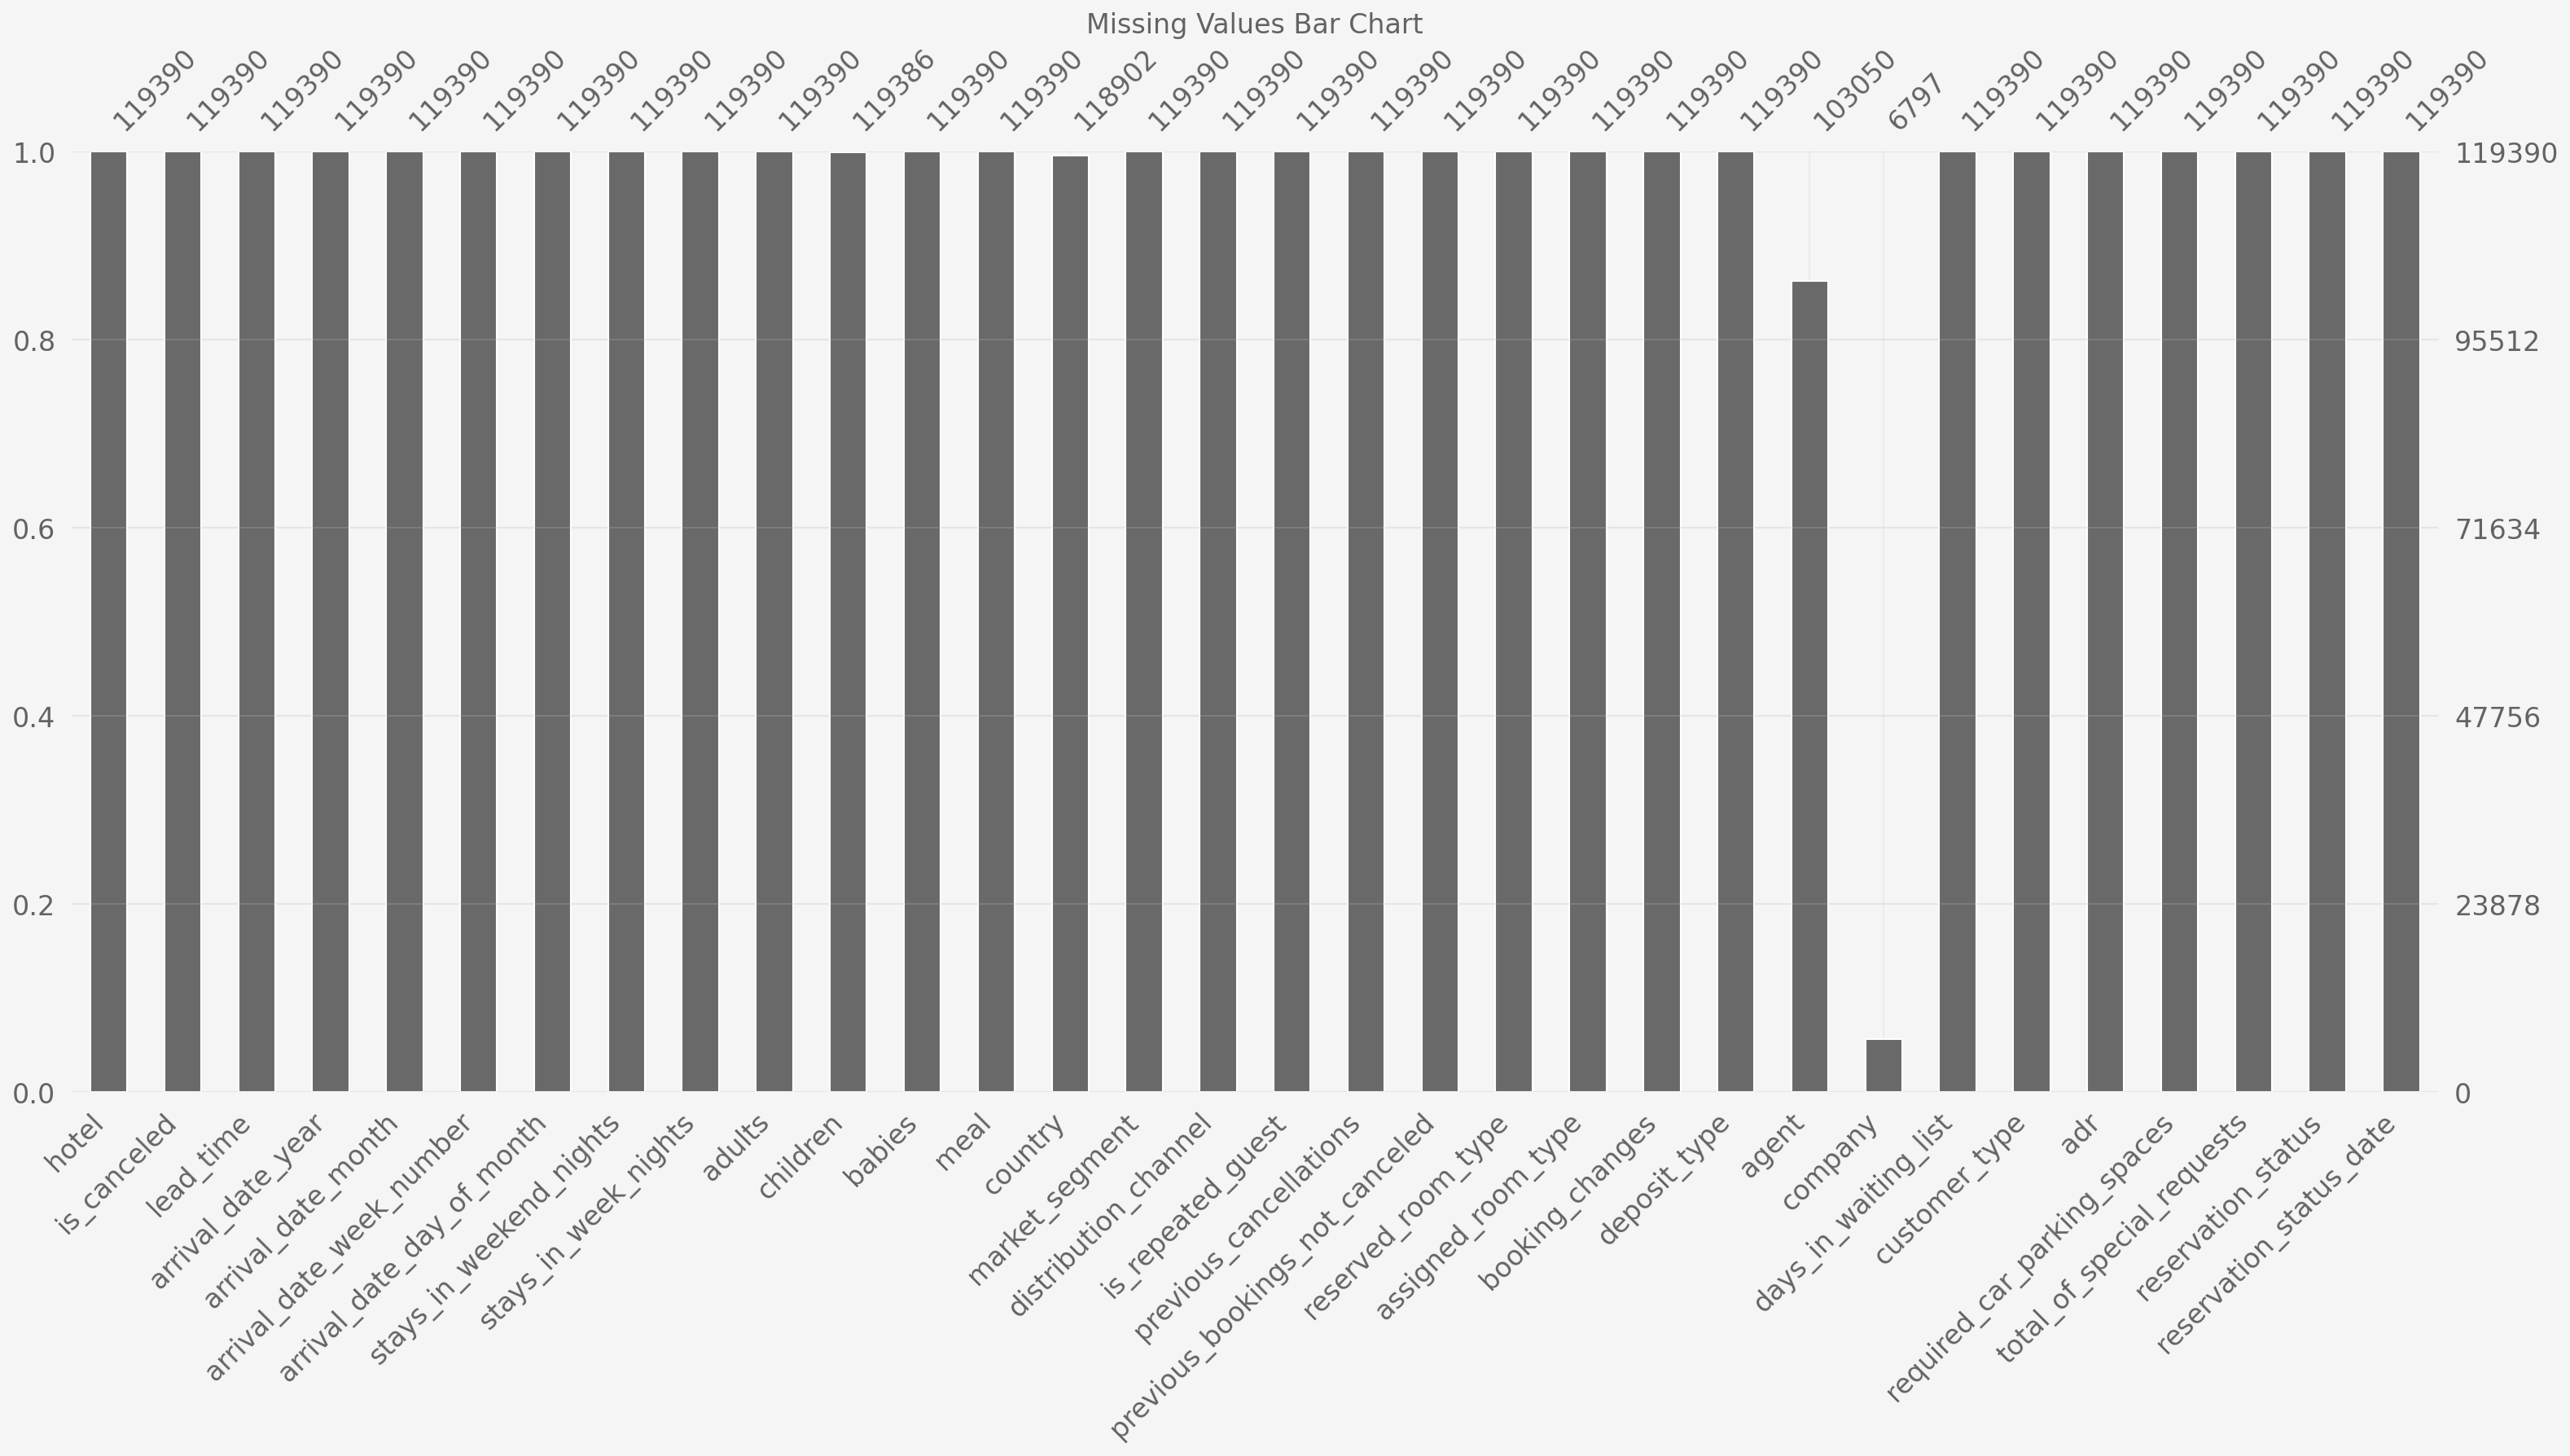

In [12]:
msno.bar(df)
plt.title('Missing Values Bar Chart', fontsize=16)
plt.show()


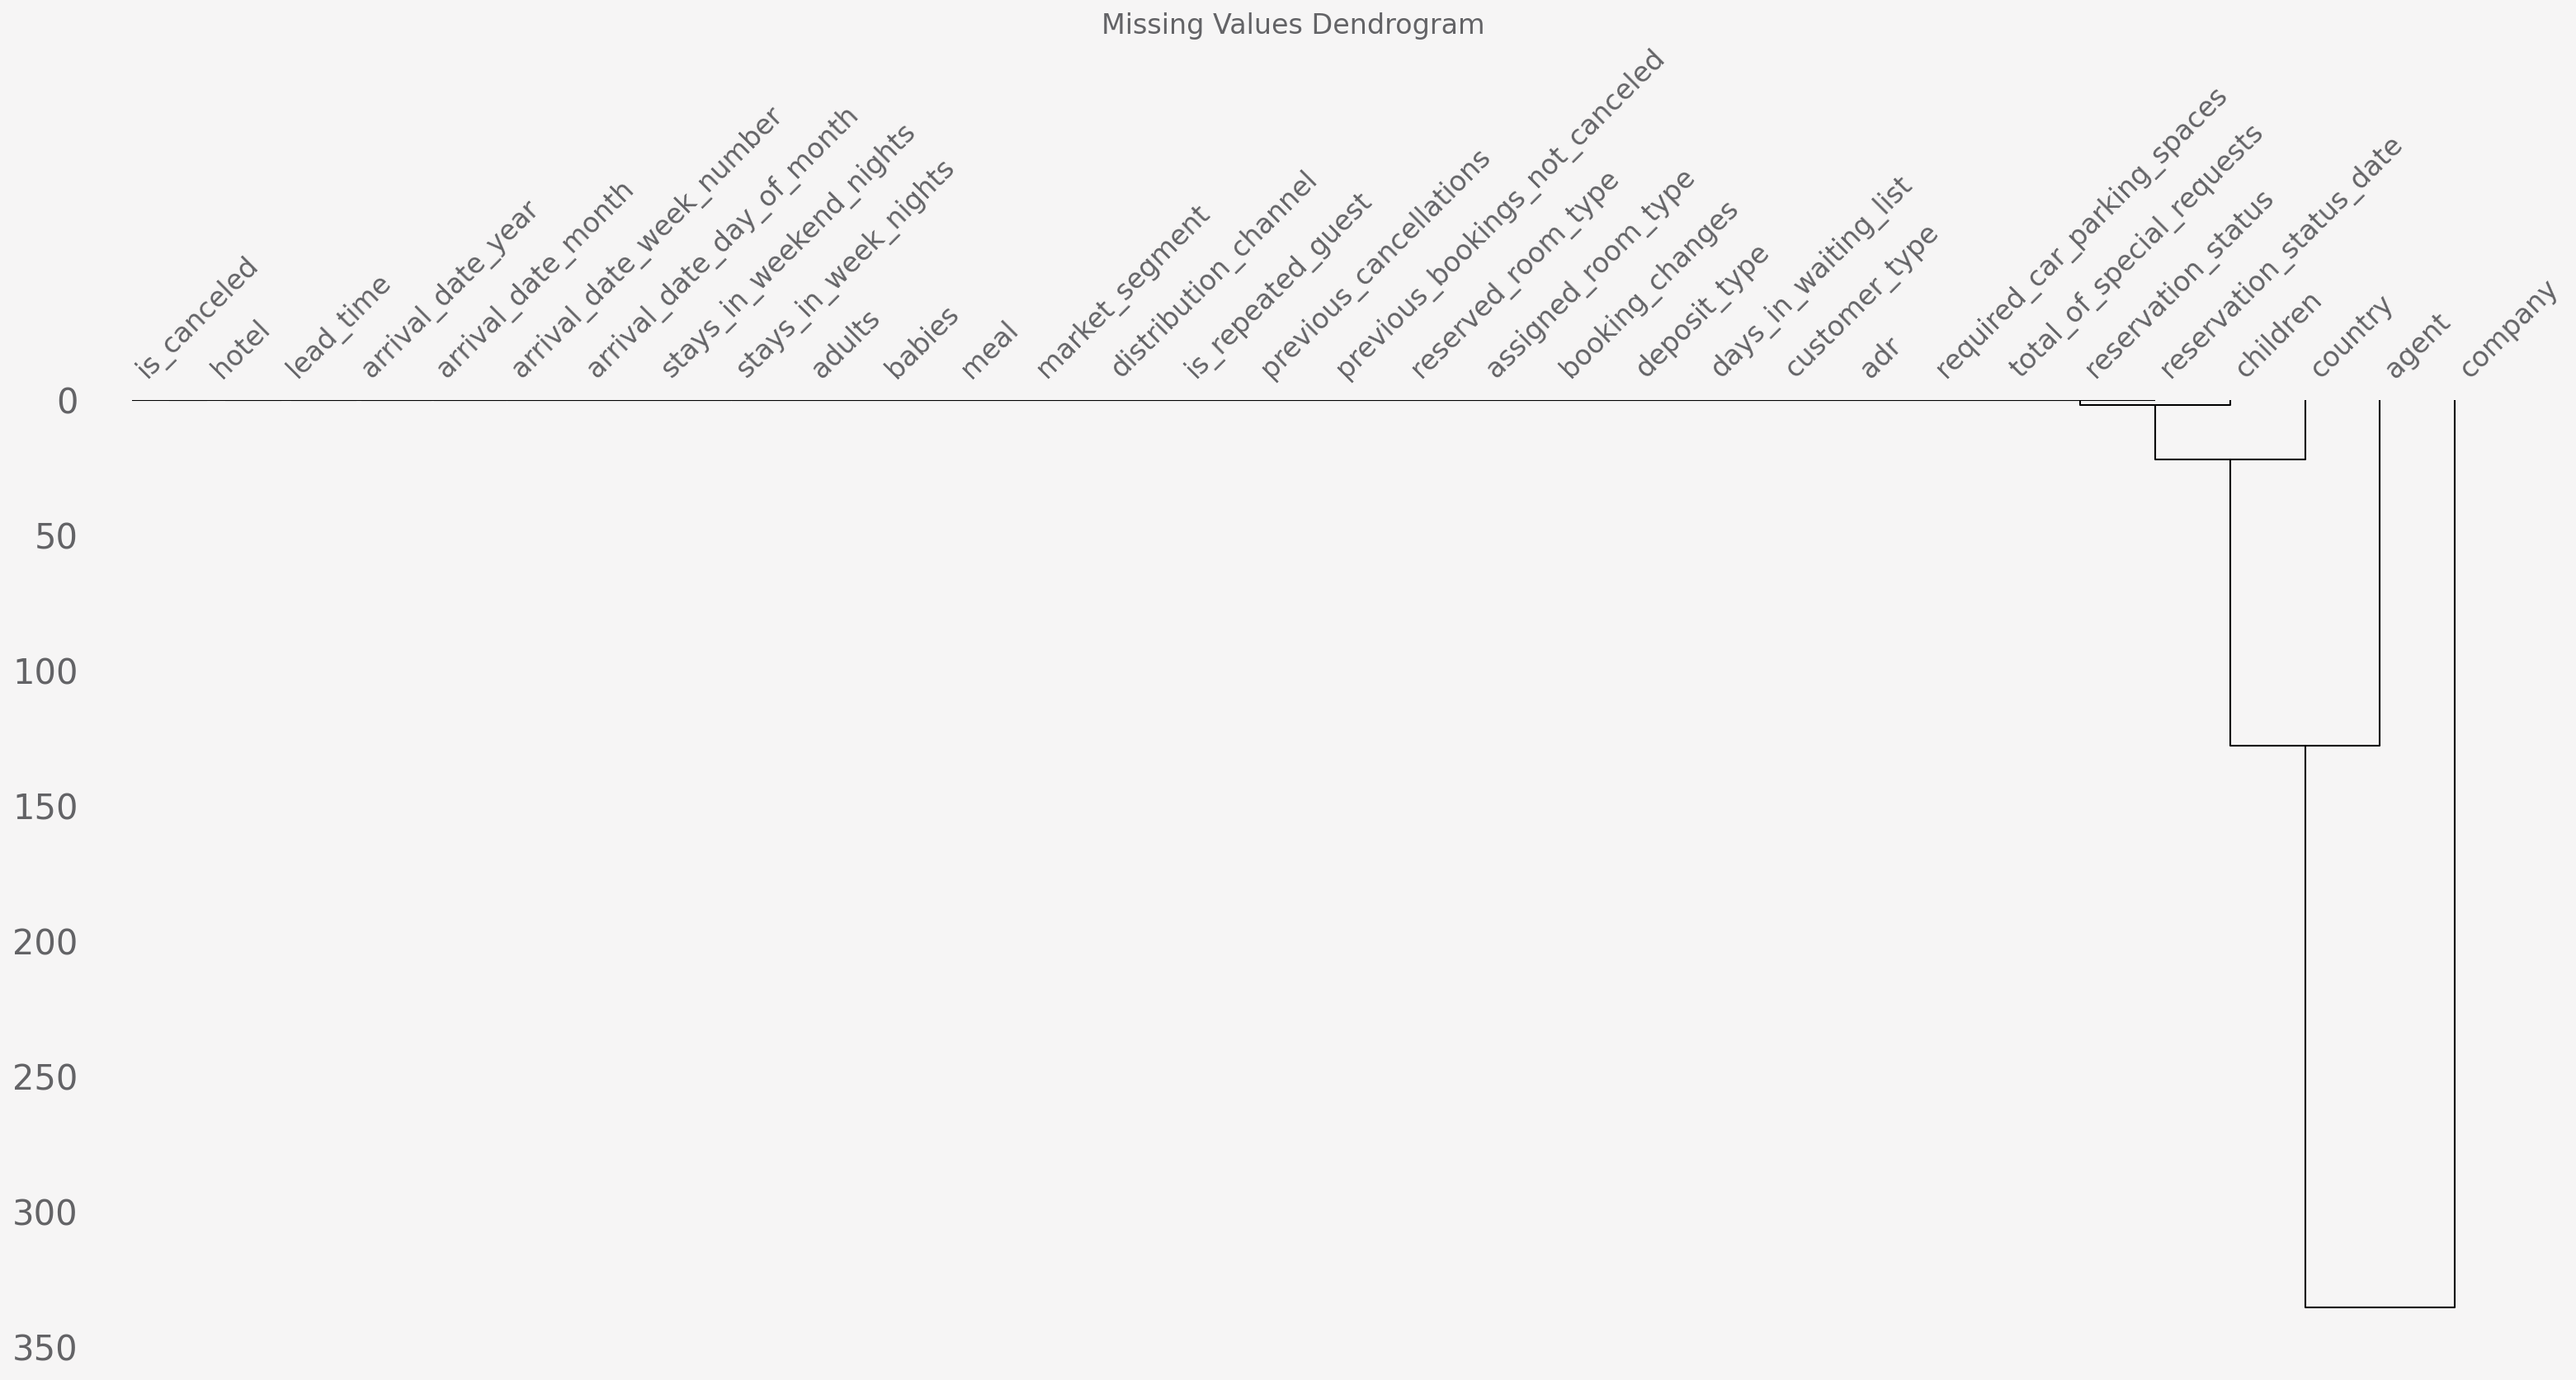

In [13]:
msno.dendrogram(df)
plt.title('Missing Values Dendrogram', fontsize=16)
plt.show()


# Data Wrangling

In [ ]:
df.replace('NULL', np.nan, inplace=True)

# 1. Check for missing values in each column
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values
print("\n" + "="*50 + "\n")

Missing values per column:
children         4
country        488
agent        16340
company     112593
dtype: int64




### Missing Value Imputation: Strategy and Rationale

Missing data was addressed using targeted strategies for each affected column, aiming to preserve data integrity and enable further analysis:

*   **`country`**: Missing values imputed with the mode (most frequent country), as this is a common and reasonable assumption for categorical location data when no other information is available.
*   **`agent`**: Missing `agent` IDs (originally 'NULL') filled with `0`, chosen as a placeholder to numerically signify that no travel agent was involved in the booking, maintaining the column's numeric potential for ID-based analysis.
*   **`company`**: Similar to `agent`, missing `company` IDs filled with `0`, serving as a numerical indicator that no specific company was associated with or paid for the booking.
*   **`children`**: Missing values for the number of children filled with `0`, based on the common-sense assumption that an unspecified count typically means zero children for a booking.

In [ ]:
if 'country' in df.columns and df['country'].isnull().any():
    country_mode = df['country'].mode()[0]
    df['country'].fillna(country_mode, inplace=True)
    print(f"Filled missing 'country' values with mode: {country_mode}")


if 'agent' in df.columns and df['agent'].isnull().any():
    df['agent'].fillna(0, inplace=True)
    print("Filled missing 'agent' values with 0.")


if 'company' in df.columns and df['company'].isnull().any():
    df['company'].fillna(0, inplace=True)
    print("Filled missing 'company' values with 0.")


if 'children' in df.columns and df['children'].isnull().any():
    df['children'].fillna(0, inplace=True)
    print("Filled missing 'children' values with 0.")

Filled missing 'country' values with mode: PRT
Filled missing 'agent' values with 0.
Filled missing 'company' values with 0.
Filled missing 'children' values with 0.


<ipython-input-18-53feba78526b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(country_mode, inplace=True)
<ipython-input-18-53feba78526b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# Verify missing values are handled

print("\nMissing values after handling:")
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])
if remaining_missing.sum() == 0:
    print("All missing values handled.")
else:
    print("Some missing values still remain.")


Missing values after handling:
Series([], dtype: int64)
All missing values handled.


## Correcting Data Types: Strategy and Rationale

Data types were adjusted for several columns to ensure they accurately represent the nature of the data and are suitable for numerical or date-based operations:

*   **`children` Column**: Converted from float to integer type, as the number of children should be a whole number; this was done after handling any missing values (e.g., by filling with 0).
*   **`agent` Column**: Converted from float to integer type, as this column represents an ID and integer is a more appropriate and memory-efficient type for identifiers (assuming missing values were filled with a numerical placeholder like 0).
*   **`company` Column**: Similar to `agent`, converted from float to integer type to correctly represent it as an ID, after ensuring missing values were handled numerically.
*   **`reservation_status_date` Column**: Converted from object (string) to datetime objects to enable time-based analysis, calculations, and feature engineering related to booking status changes.

In [ ]:
# Before Correction

print("Data types before correction:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

Data types before correction:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agen

In [ ]:

if 'children' in df.columns:
    df['children'] = df['children'].astype(int)
    print("'children' column converted to int.")

if 'agent' in df.columns:
    df['agent'] = df['agent'].astype(int)
    print("'agent' column converted to int.")
if 'company' in df.columns:
    df['company'] = df['company'].astype(int)
    print("'company' column converted to int.")

date_columns_to_convert = ['reservation_status_date']
for col in date_columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"'{col}' column converted to datetime.")



'children' column converted to int.
'agent' column converted to int.
'company' column converted to int.
'reservation_status_date' column converted to datetime.


In [ ]:
# Verify data types
print("\nData types after correction:")
df.info()


Data types after correction:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                  

## Handling Inconsistent Values and Categorical Data: Strategy and Rationale

Data inconsistencies and categorical anomalies were addressed to ensure uniformity and logical validity:

*   **`meal` Column**: 'Undefined' values were replaced with 'SC' (Self-Catering/No Meal) to standardize meal categories, as 'Undefined' likely indicates the absence of a specific meal package.
*   **Whitespace in Room Types**: Leading/trailing whitespace was stripped from `reserved_room_type` and `assigned_room_type` to prevent a single room type from being treated as multiple distinct categories due to formatting issues.
*   **Zero Total Guests**: Rows where the sum of `adults`, `children`, and `babies` equals zero were identified, as such bookings are logically improbable for standard guest stays and may indicate data errors or special non-guest entries requiring further investigation or potential removal.

In [ ]:

if 'meal' in df.columns:
    print("\nUnique values in 'meal' column and their counts:")
    print(df['meal'].value_counts())
    df['meal'] = df['meal'].replace('Undefined', 'SC')
    print("\n'meal' column after replacing 'Undefined':")
    print(df['meal'].value_counts())

if 'market_segment' in df.columns:
    print("\nUnique values in 'market_segment':")
    print(df['market_segment'].value_counts())

if 'distribution_channel' in df.columns:
    print("\nUnique values in 'distribution_channel':")
    print(df['distribution_channel'].value_counts())

if 'reserved_room_type' in df.columns:
    df['reserved_room_type'] = df['reserved_room_type'].str.strip()
    print("\n'reserved_room_type' value counts after stripping whitespace:")
    print(df['reserved_room_type'].value_counts())

if 'assigned_room_type' in df.columns:
    df['assigned_room_type'] = df['assigned_room_type'].str.strip()
    print("\n'assigned_room_type' value counts after stripping whitespace:")
    print(df['assigned_room_type'].value_counts())

if all(col in df.columns for col in ['adults', 'children', 'babies']):
    total_guests = df['adults'] + df['children'] + df['babies']
    invalid_guest_count_rows = df[total_guests == 0]
    if not invalid_guest_count_rows.empty:
        print(f"\nFound {len(invalid_guest_count_rows)} rows where total guests (adults+children+babies) is 0.")

    else:
        print("\nNo rows found with zero total guests.")


Unique values in 'meal' column and their counts:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

'meal' column after replacing 'Undefined':
meal
BB    92310
HB    14463
SC    11819
FB      798
Name: count, dtype: int64

Unique values in 'market_segment':
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Unique values in 'distribution_channel':
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

'reserved_room_type' value counts after stripping whitespace:
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

'assigned_room_type' value counts aft

## Checking For Duplicates
Identifying and remove any completely duplicate rows.

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Dropped {duplicate_rows} duplicate rows.")
    print(f"New DataFrame shape: {df.shape}")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 32013
Dropped 32013 duplicate rows.
New DataFrame shape: (87377, 32)


## Handling Date Column: Strategy and Rationale

Properly formatted date columns are essential for time-series analysis and feature engineering. The following steps were taken:

*   **Arrival Date Creation (`arrival_date`)**:
    *   **Strategy**: The `arrival_date_year`, `arrival_date_month`, and `arrival_date_day_of_month` columns were combined to create a single `arrival_date` datetime column. Month names (e.g., 'July') were mapped to their numerical equivalents (e.g., 7) to facilitate parsing.
    *   **Rationale**: A unified datetime object for arrival is more convenient for date-based calculations and comparisons than separate components. `errors='coerce'` was used during conversion to `pd.to_datetime` to turn any unparseable date combinations (e.g., day 32 of a month) into `NaT` (Not a Time).
    *   **Invalid Date Handling**: Rows where the combined `arrival_date` resulted in `NaT` (indicating an invalid original date combination) were subsequently removed from the dataset, as a valid arrival date is critical for most booking analyses.

*   **Reservation Status Date (`reservation_status_date`)**:
    *   **Strategy**: This column was converted from its original object (string) type to datetime objects using `pd.to_datetime` with `errors='coerce'`. This ensures that any dates not conforming to a recognizable format become `NaT`.
    *   **Rationale**: Converting to datetime allows for accurate time-based analysis related to when a reservation's status was last updated (e.g., cancellation date, check-out date).
    *   **Missing/NaT Value Handling**: After conversion, the number of remaining missing (`NaT`) values in `reservation_status_date` was assessed.
        *   **Current Action**: For this exercise, we've primarily focused on identifying and reporting these missing/`NaT` values.
        *   **Considerations for Imputation**: In a more in-depth analysis, these missing dates could potentially be imputed based on other information. For instance:
            *   If `reservation_status` is 'Check-Out' and `reservation_status_date` is missing, it could be approximated by `arrival_date` plus the total length of stay.
            *   If `reservation_status` is 'No-Show', `reservation_status_date` often aligns with the `arrival_date`.
            *   Missing cancellation dates are harder to impute accurately without further business logic or data.
        *   Due to the potential for introducing bias with simple imputations for this critical date, and the varying logic based on `reservation_status`, a more advanced strategy or row removal (if the count is small and justifiable) would be considered in a full project. For now, the focus is on correct type conversion and identification of these `NaT` values.

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Fix and Combine Arrival Date Columns ---
# Define a mapping for month names to numbers if 'arrival_date_month' is string
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Create a robust string representation for parsing, handling potential numeric months
if 'arrival_date_month' in df.columns:
    if isinstance(df['arrival_date_month'].iloc[0], str): # Check if month is string
        # Attempt to map month names, leave as is if not in map (will become NaT later)
        month_numeric = df['arrival_date_month'].map(month_map)
    else: # Assume month is already numeric
        month_numeric = df['arrival_date_month']

    # Construct the date string
    df['arrival_date_str'] = df['arrival_date_year'].astype(str) + '-' + \
                             month_numeric.astype(str) + '-' + \
                             df['arrival_date_day_of_month'].astype(str)

    # Convert to datetime, coercing errors to NaT
    df['arrival_date'] = pd.to_datetime(df['arrival_date_str'], errors='coerce')

    # Identify and count rows with invalid combined arrival dates
    invalid_arrival_dates_count = df['arrival_date'].isnull().sum()
    if invalid_arrival_dates_count > 0:
        print(f"Found {invalid_arrival_dates_count} rows with invalid combined 'arrival_date'. These will be removed.")
        # Remove rows where 'arrival_date' became NaT
        df.dropna(subset=['arrival_date'], inplace=True)
        print(f"Shape of DataFrame after removing invalid arrival dates: {df.shape}")
    else:
        print("No invalid combined 'arrival_date' values found to remove.")

    # Drop the temporary string column
    if 'arrival_date_str' in df.columns:
        df.drop(columns=['arrival_date_str'], inplace=True)
    print("'arrival_date' column created and invalid rows removed.")
else:
    print("Arrival date component columns not found. Skipping arrival_date creation.")

# --- 2. Fix 'reservation_status_date' ---
if 'reservation_status_date' in df.columns:
    print(f"\nInitial missing values in 'reservation_status_date': {df['reservation_status_date'].isnull().sum()}")

    # Convert to datetime, coercing errors
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
    print("'reservation_status_date' converted to datetime. NaT for unparseable dates.")

    # Check for new NaT values created by coercion (if any)
    new_nats_reservation = df['reservation_status_date'].isnull().sum()
    print(f"Total missing/NaT values in 'reservation_status_date' after conversion: {new_nats_reservation}")


    print(f"Final missing/NaT values in 'reservation_status_date': {df['reservation_status_date'].isnull().sum()}")

else:
    print("'reservation_status_date' column not found.")

print("\n" + "="*50 + "\nData types after date processing:")
df.info()

No invalid combined 'arrival_date' values found to remove.
'arrival_date' column created and invalid rows removed.

Initial missing values in 'reservation_status_date': 0
'reservation_status_date' converted to datetime. NaT for unparseable dates.
Total missing/NaT values in 'reservation_status_date' after conversion: 0
Final missing/NaT values in 'reservation_status_date': 0

Data types after date processing:
<class 'pandas.core.frame.DataFrame'>
Index: 87377 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87377 non-null  object        
 1   is_canceled                     87377 non-null  int64         
 2   lead_time                       87377 non-null  int64         
 3   arrival_date_year               87377 non-null  int64         
 4   arrival_date_month              87377 non-null  object        
 5   a

In [ ]:
columns_to_drop = [
    'arrival_date_year',
    'arrival_date_month',
    'arrival_date_day_of_month',
    'arrival_date_week_number'
]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

## Output Cleaned Dataset

In [ ]:

output_filename = "cleaned_hotel_bookings.csv"
df.to_csv(output_filename, index=False)
print(f"Cleaned dataset saved as '{output_filename}'")

Cleaned dataset saved as 'cleaned_hotel_bookings.csv'


In [ ]:
from google.colab import files
files.download(output_filename)
print(f"'{output_filename}' prepared for download (if in Google Colab).")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'cleaned_hotel_bookings.csv' prepared for download (if in Google Colab).


# Univariate Analysis

In [14]:
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette), # palette defined in your initial code
    rc=custom_params # custom_params defined in your initial code
)

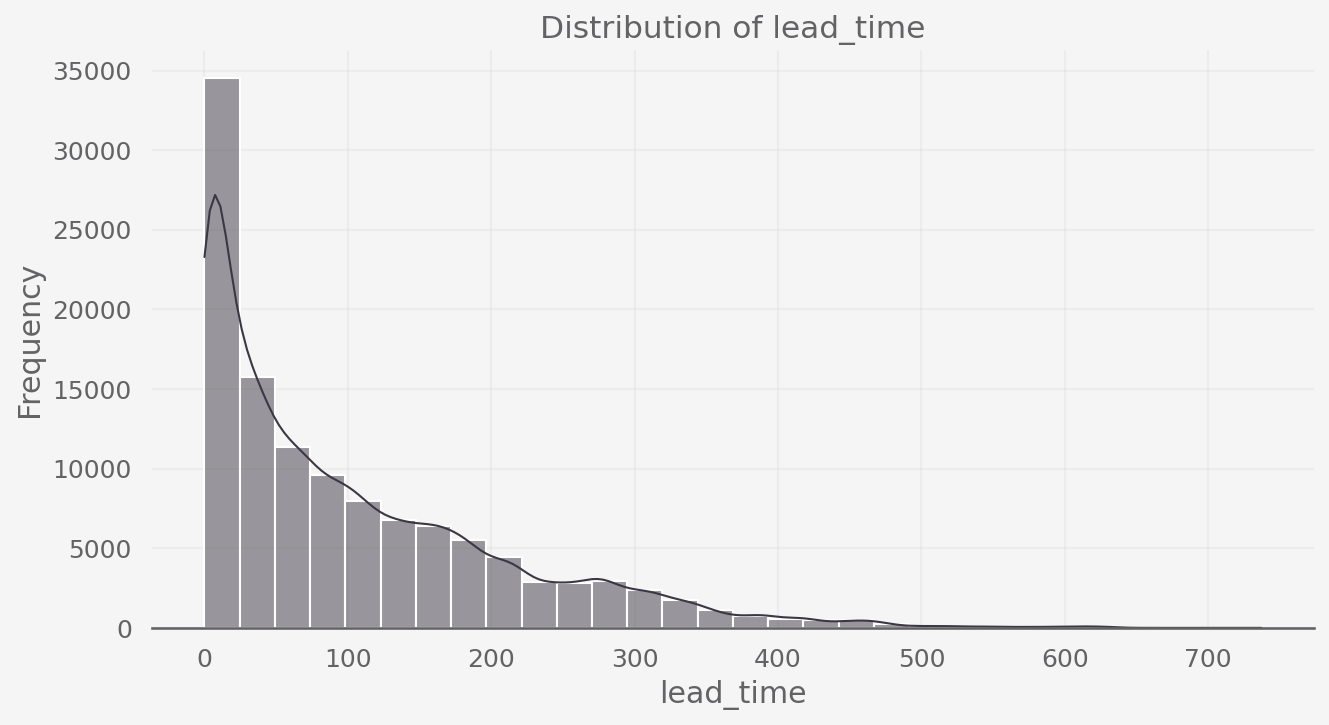

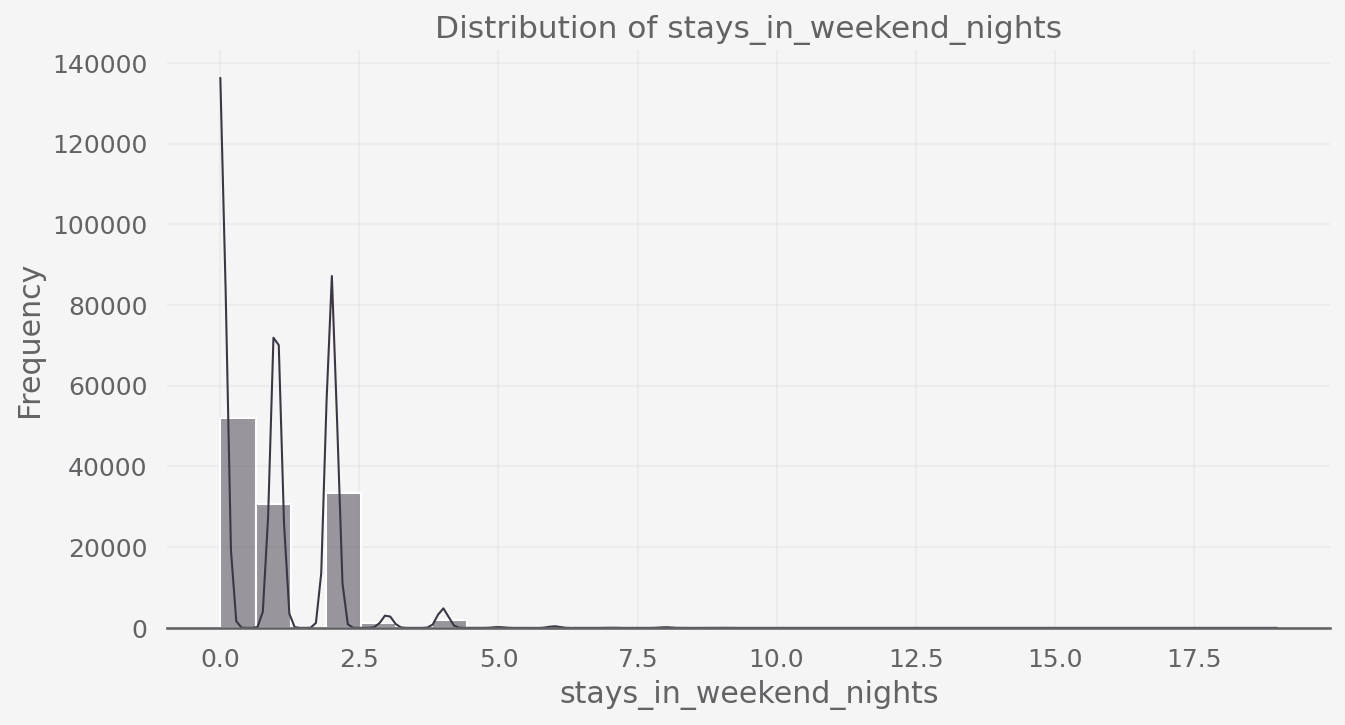

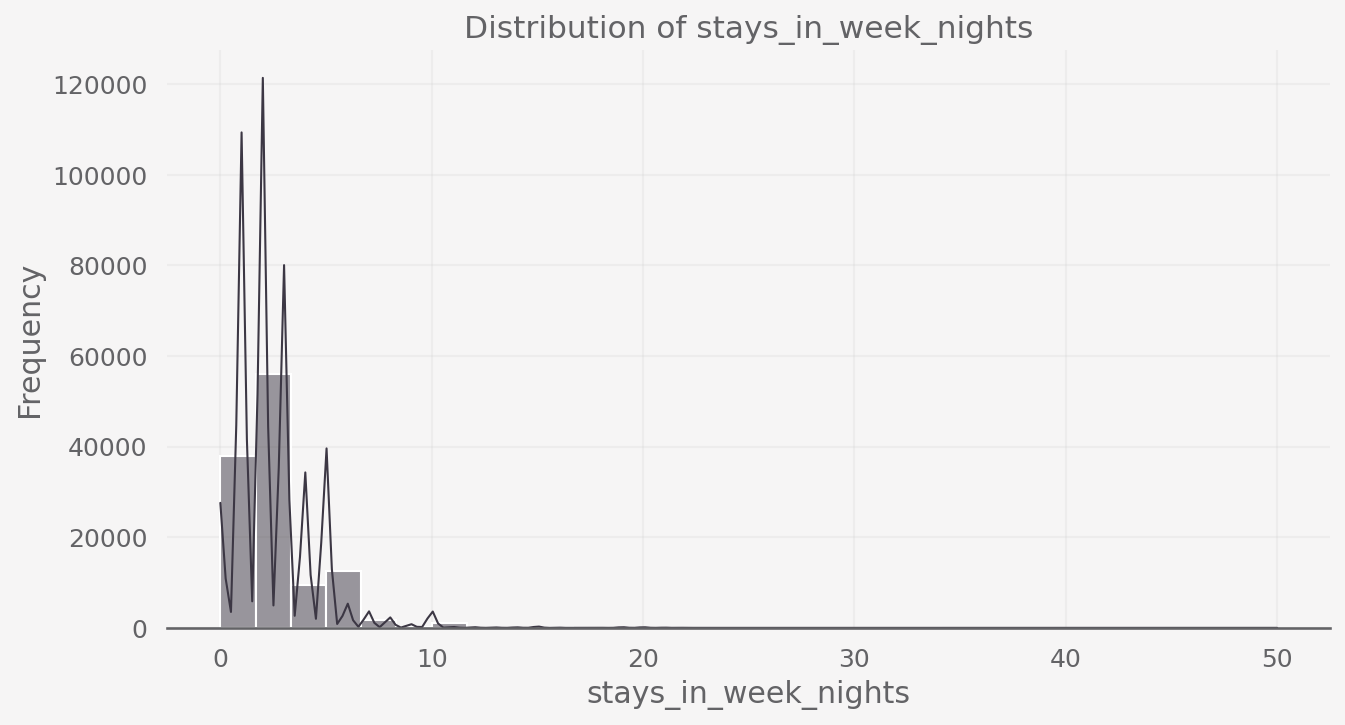

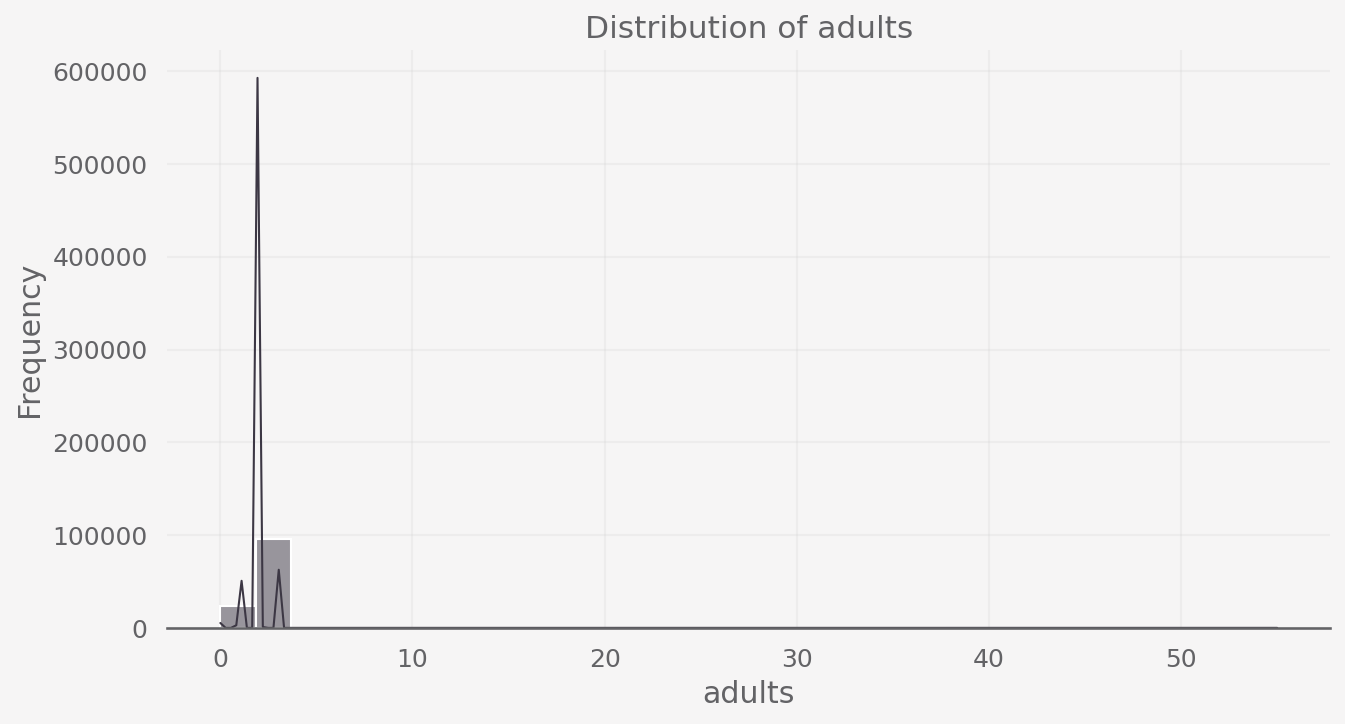

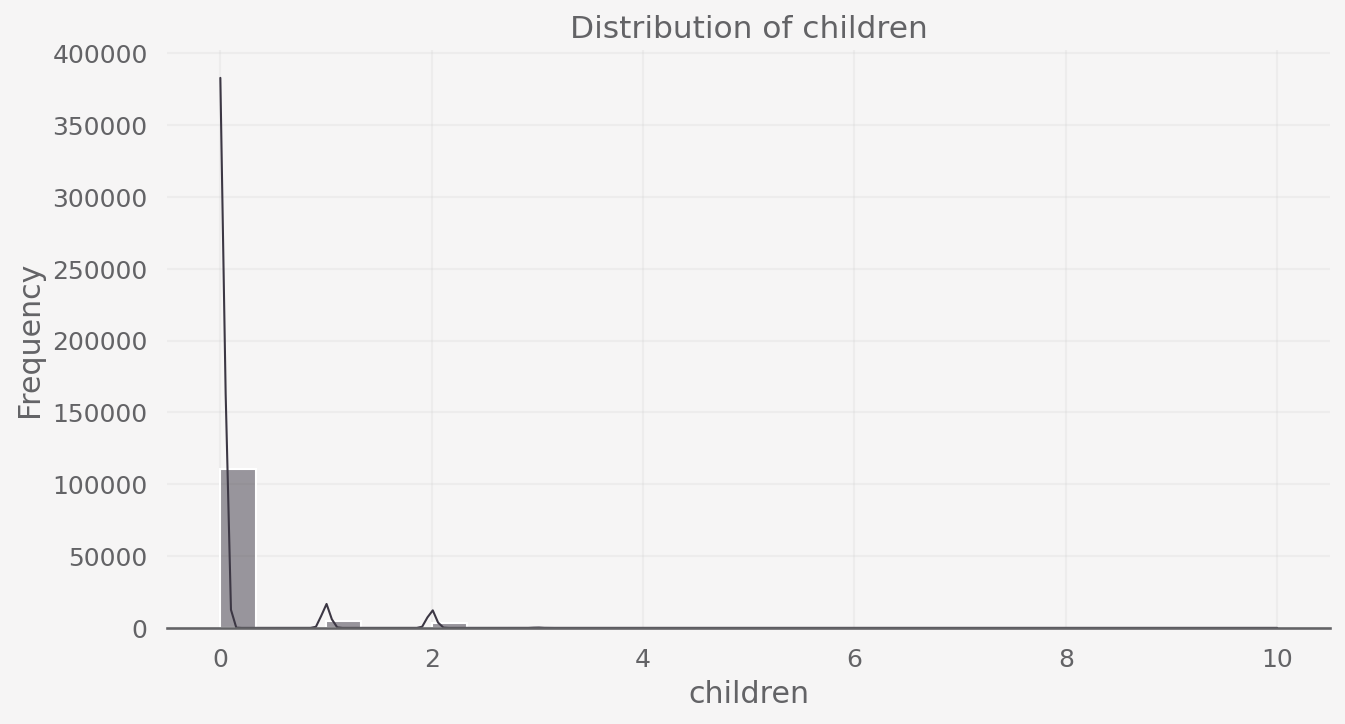

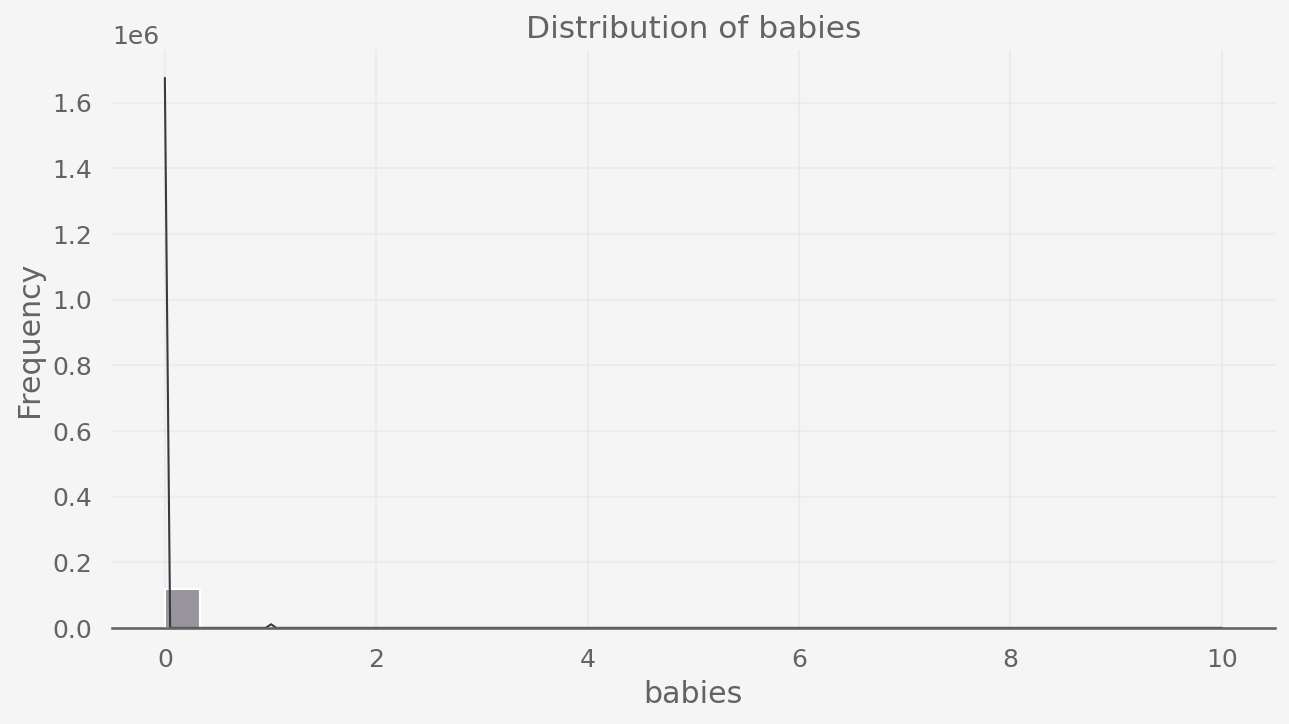

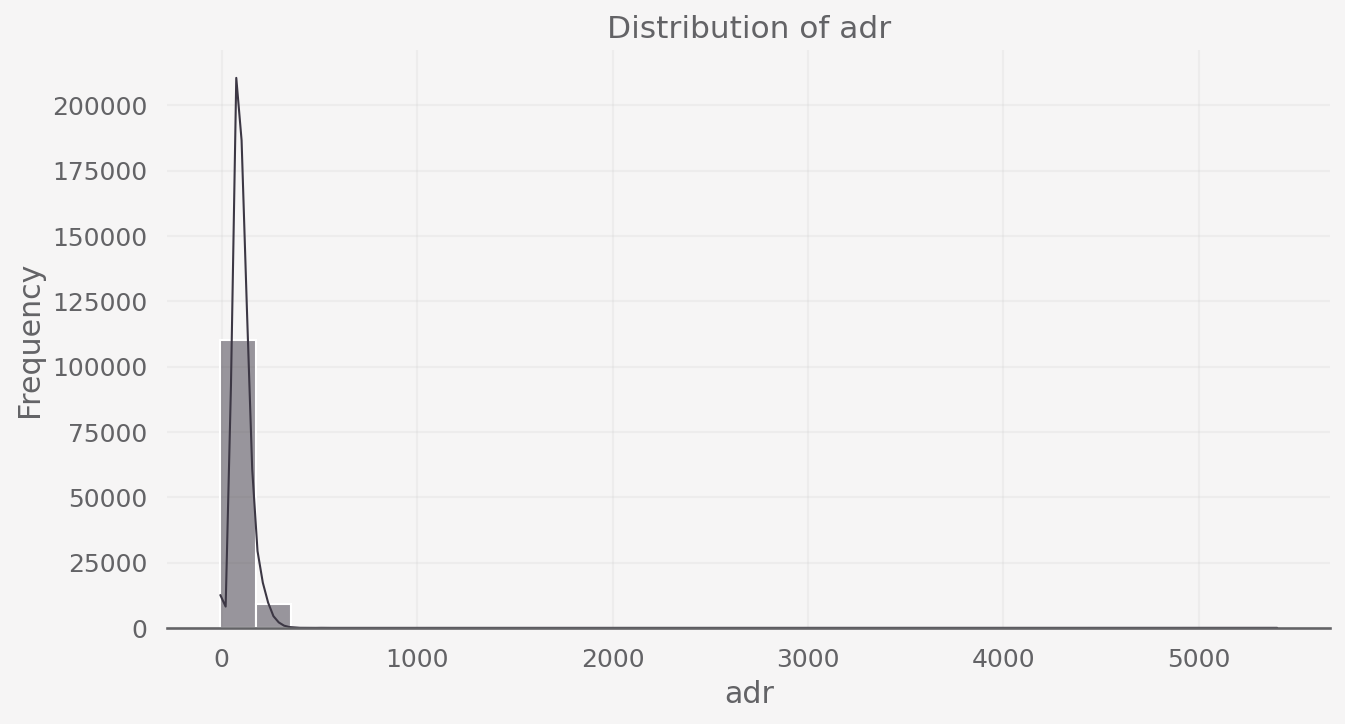

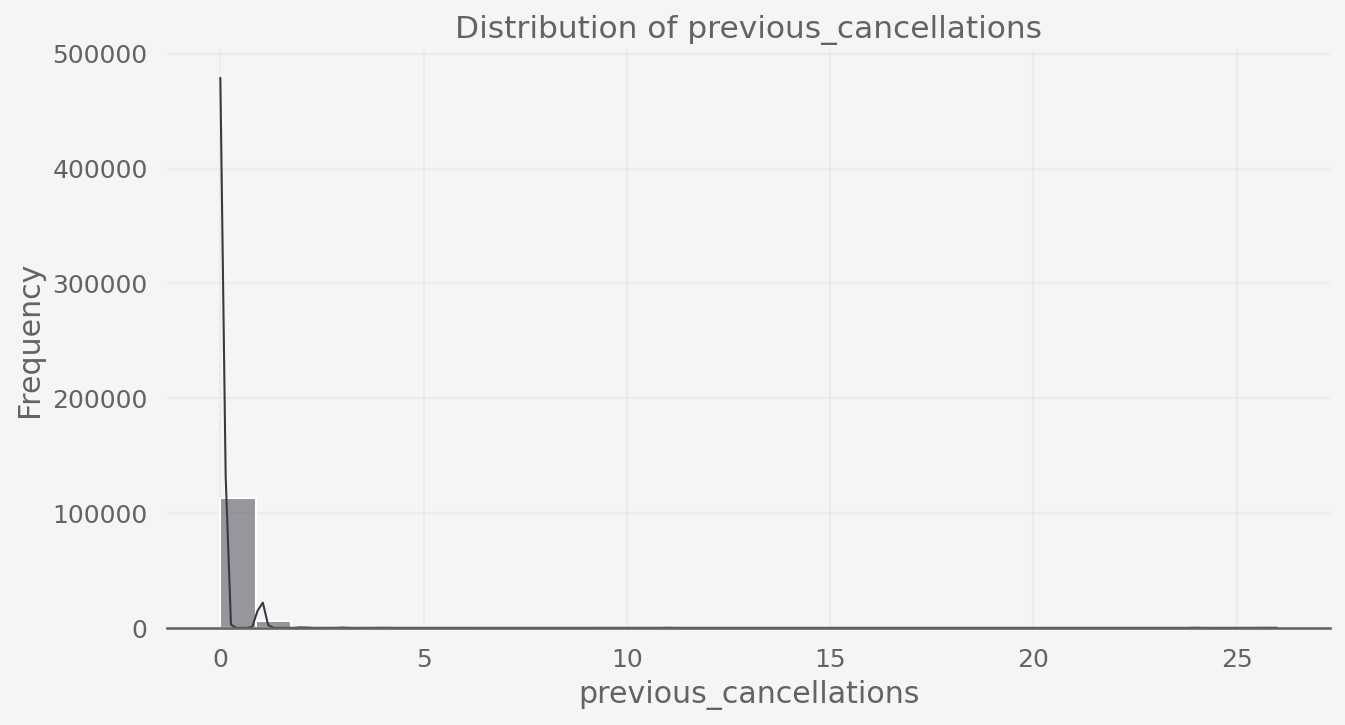

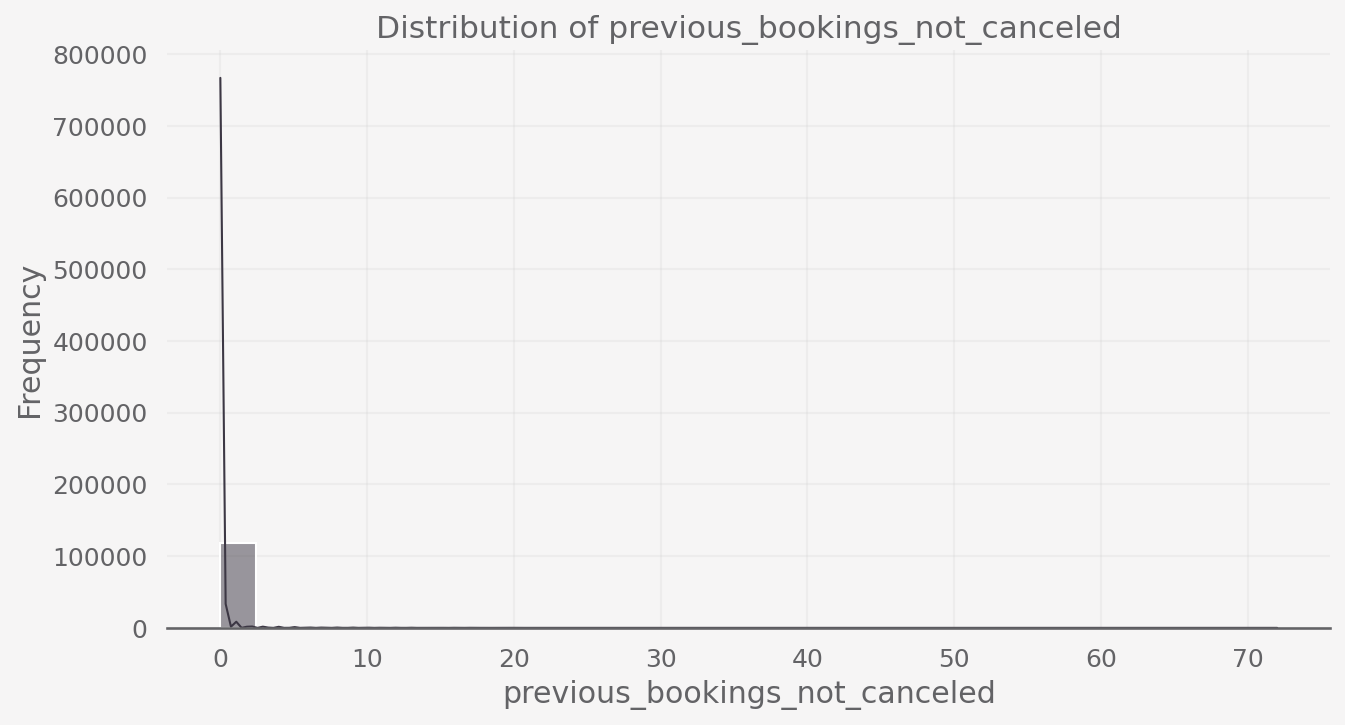

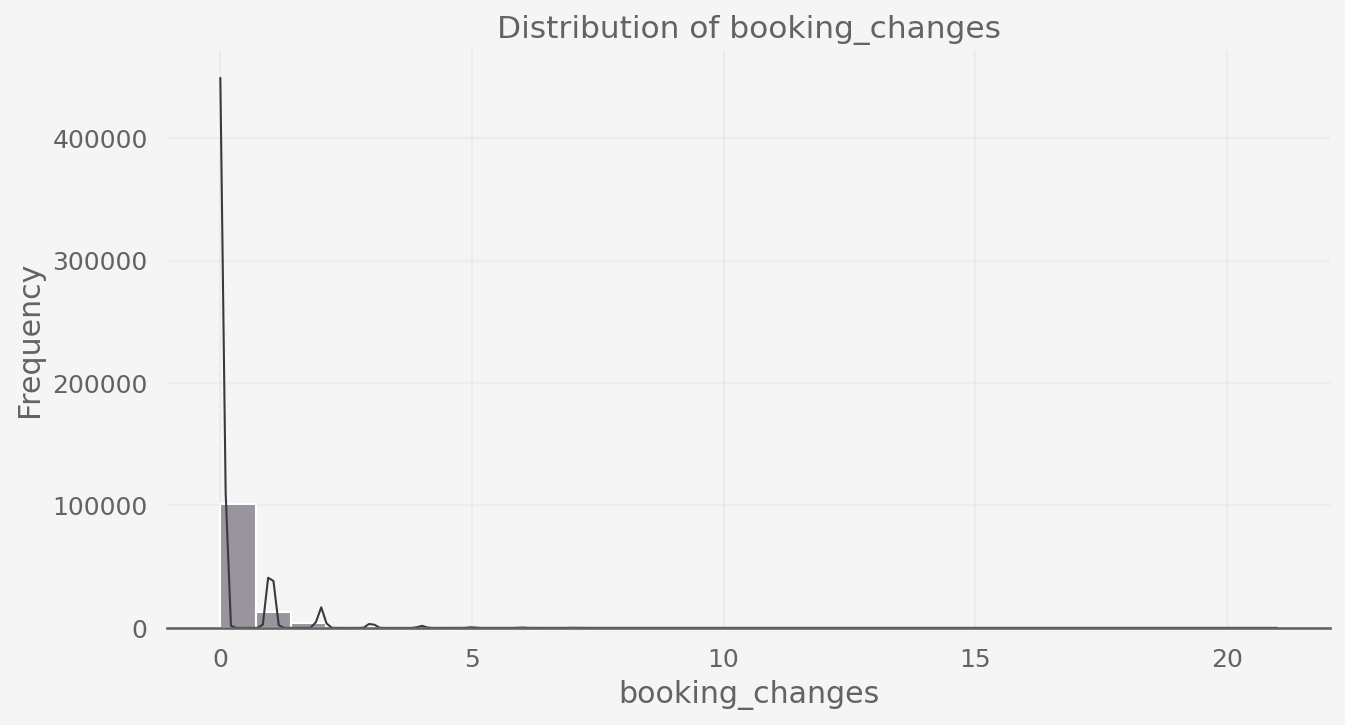

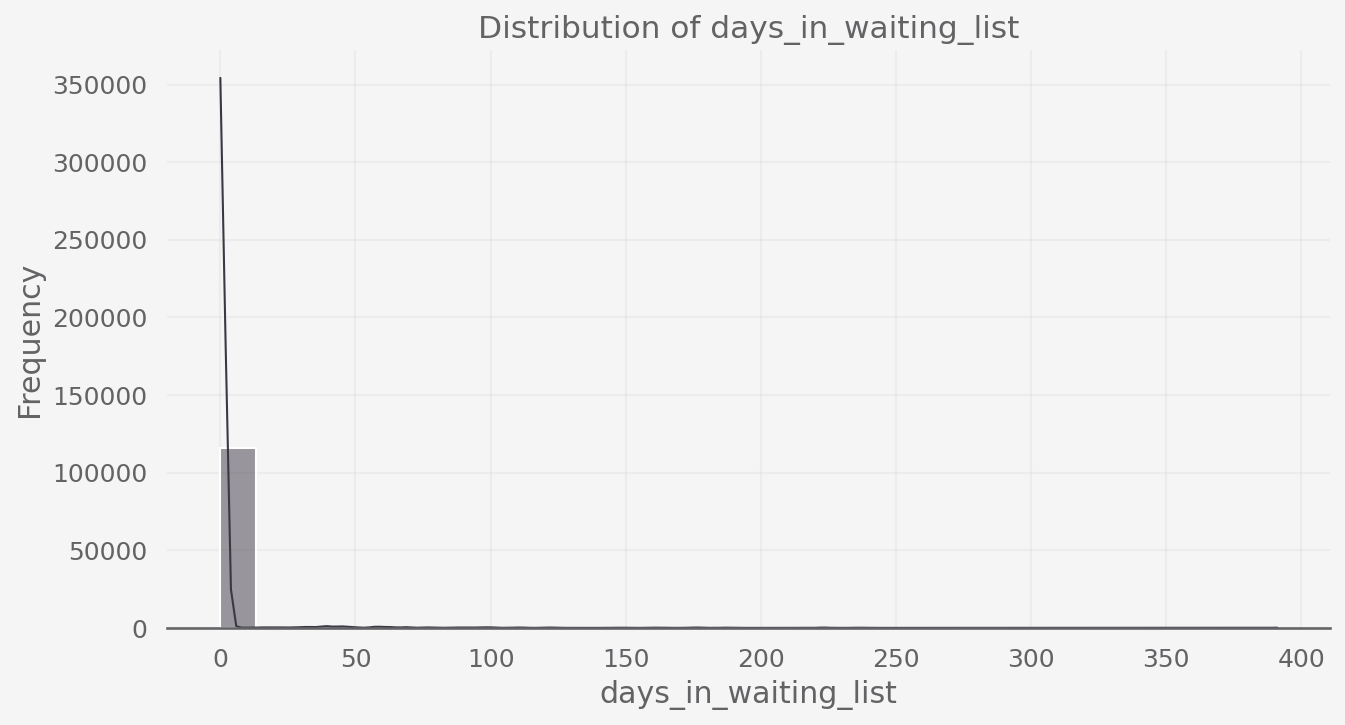

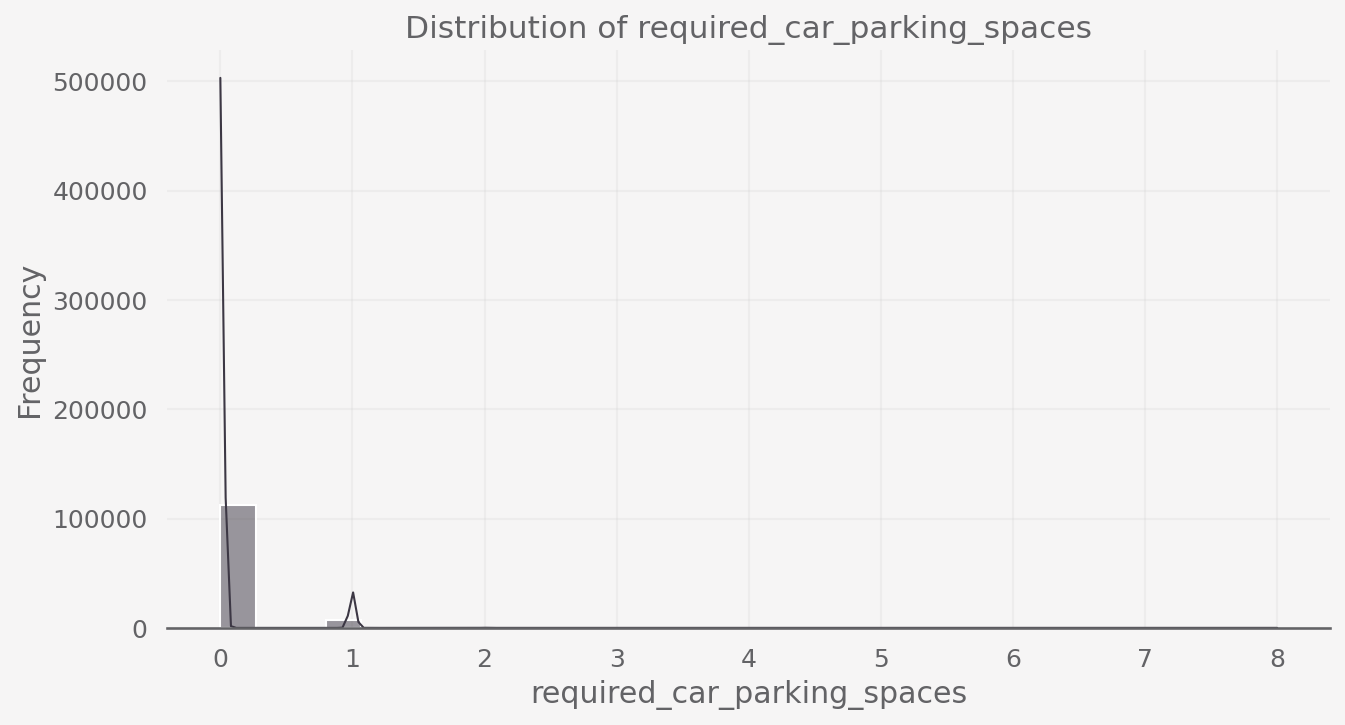

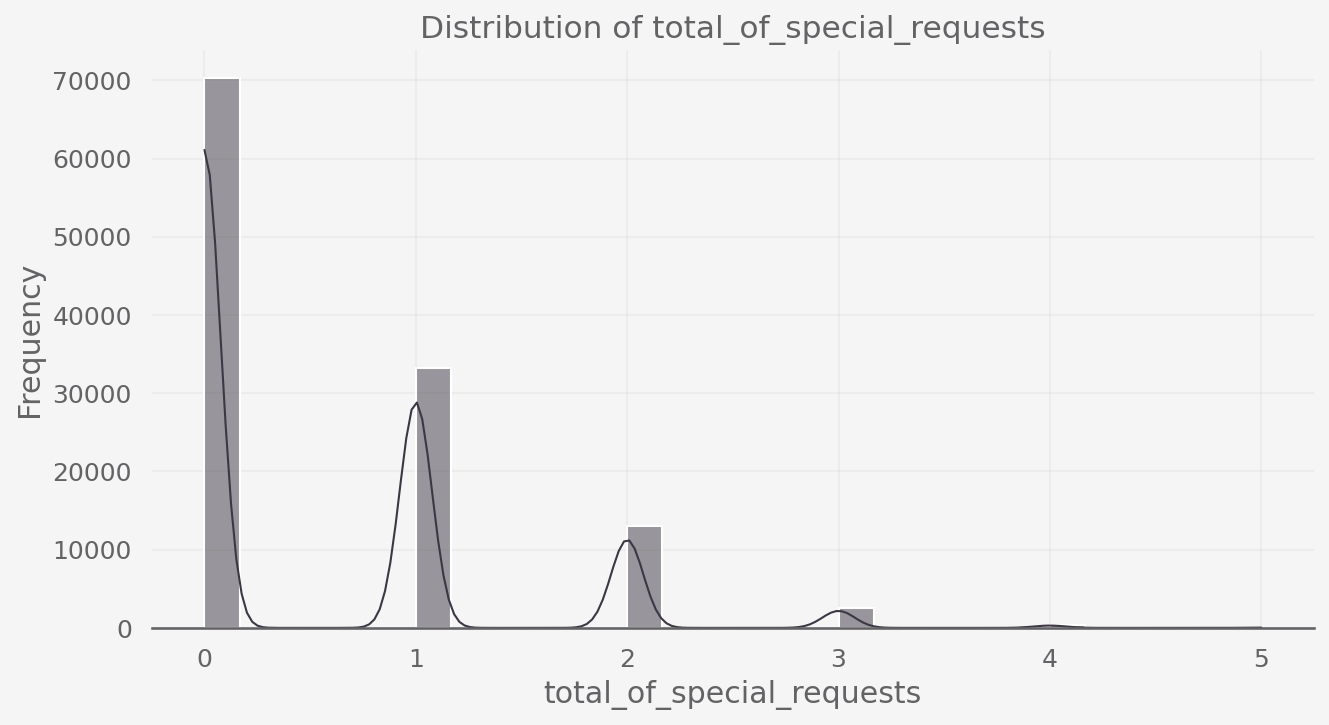

In [15]:
# Select numerical columns for univariate analysis
# We'll pick a few key ones to start, you can expand this list
numerical_cols_for_eda = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                          'adults', 'children', 'babies', 'adr',
                          'previous_cancellations', 'previous_bookings_not_canceled',
                          'booking_changes', 'days_in_waiting_list',
                          'required_car_parking_spaces', 'total_of_special_requests']

# Plot histograms for these numerical columns
for col in numerical_cols_for_eda:
    if col in df.columns:
        plt.figure(figsize=(10, 5)) # Adjust figure size if needed
        sns.histplot(df[col], kde=True, bins=30) # kde adds a density curve, bins can be adjusted
        plt.title(f'Distribution of {col}', fontsize=15)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column {col} not found in DataFrame.")

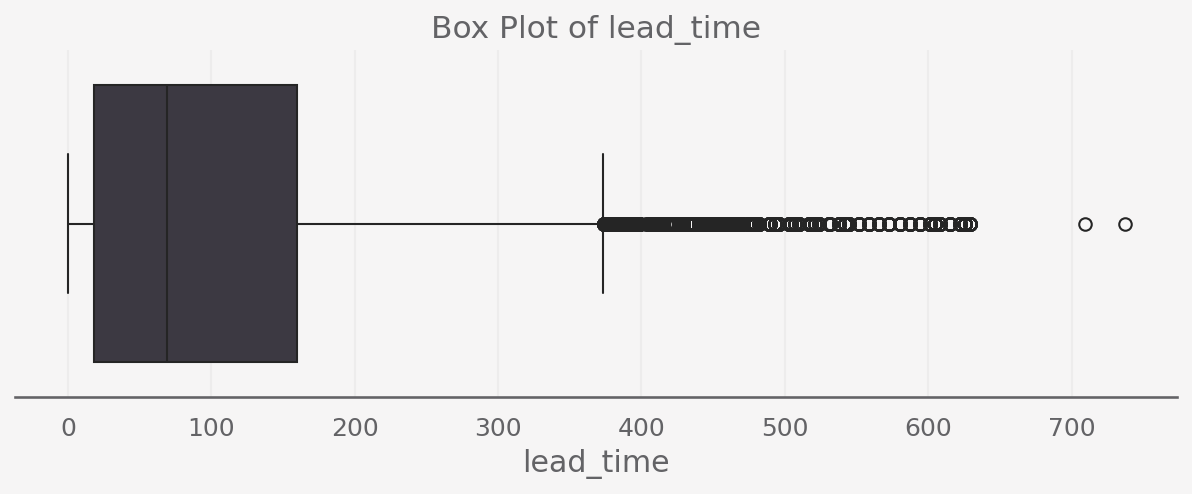

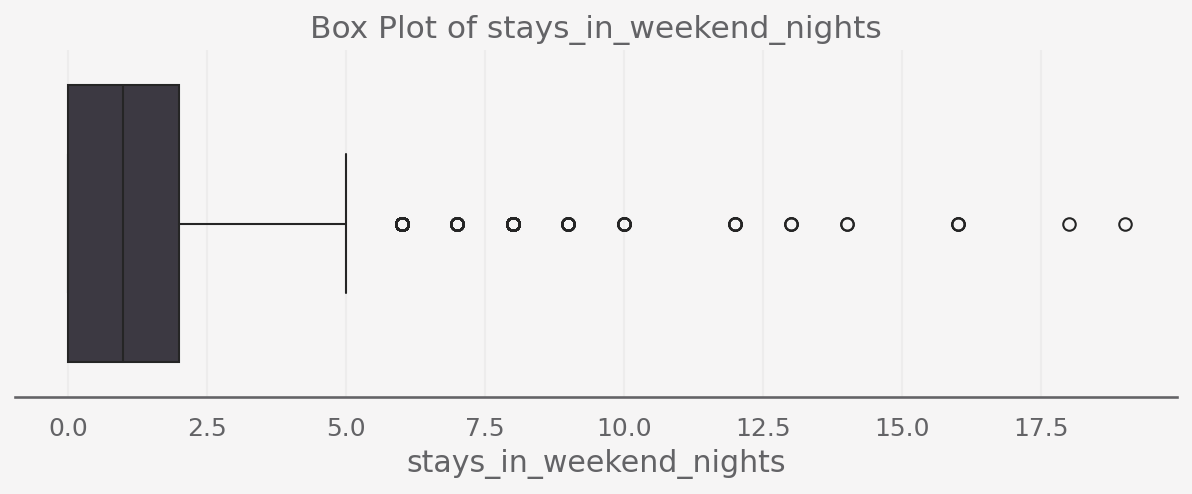

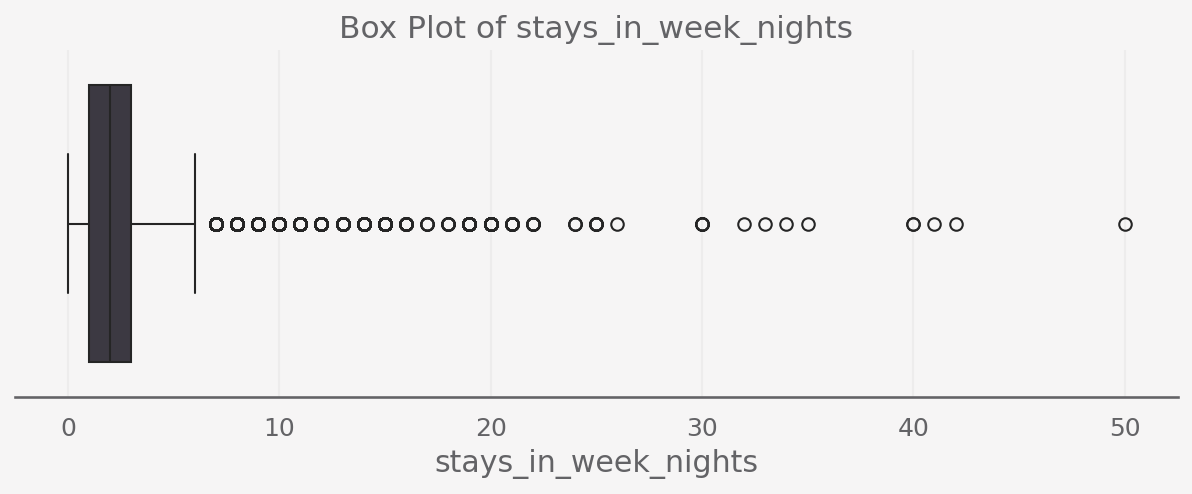

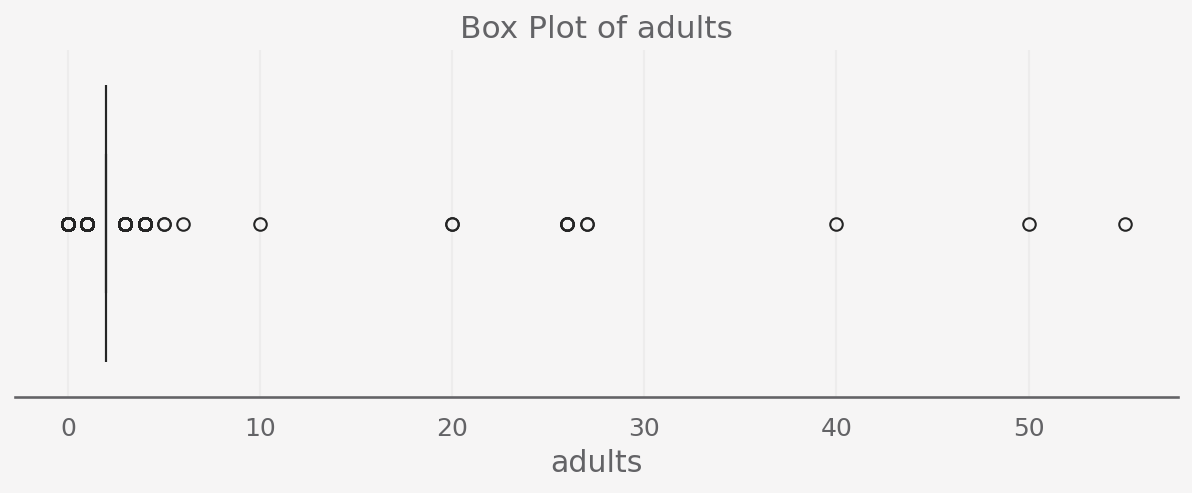

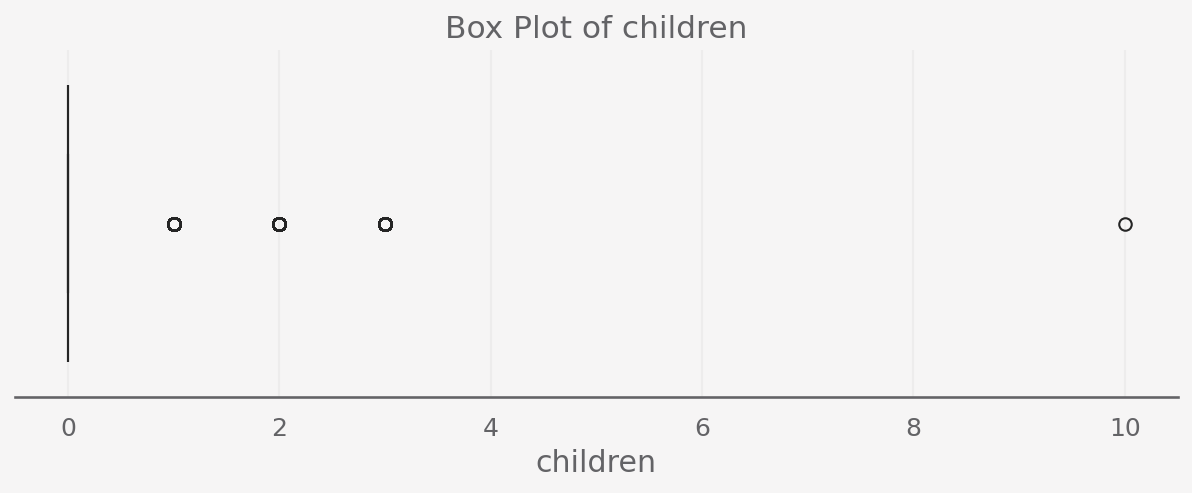

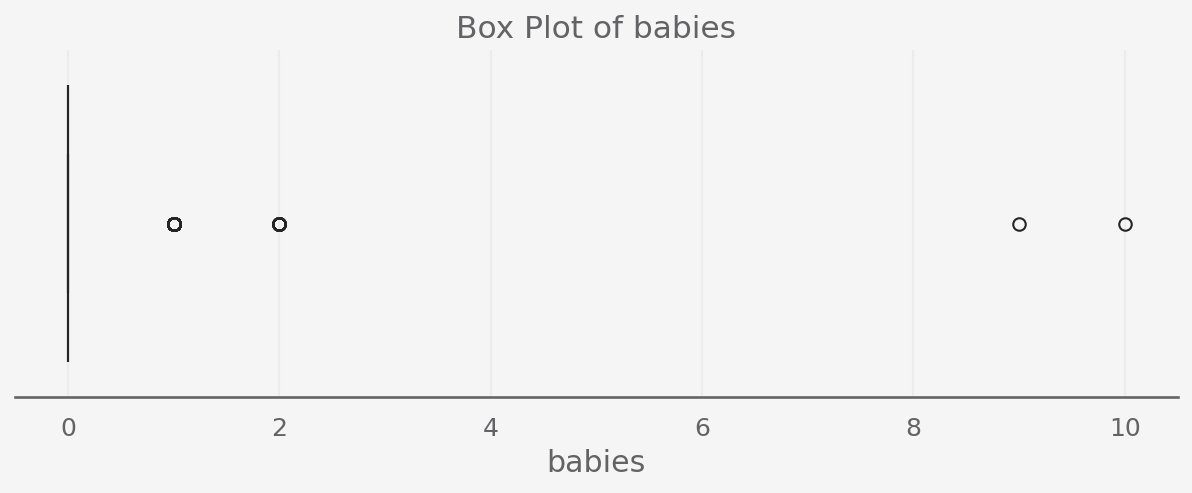

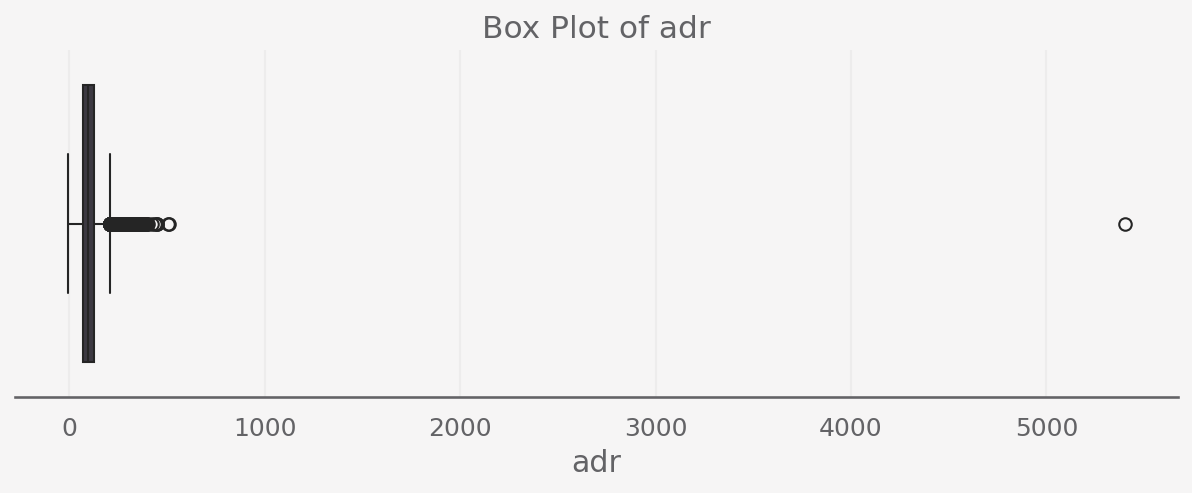

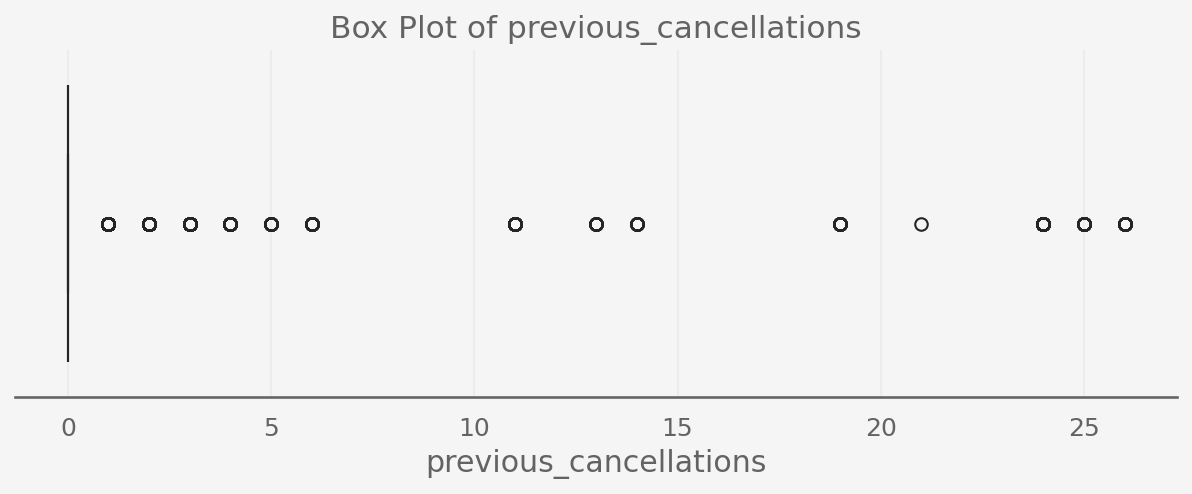

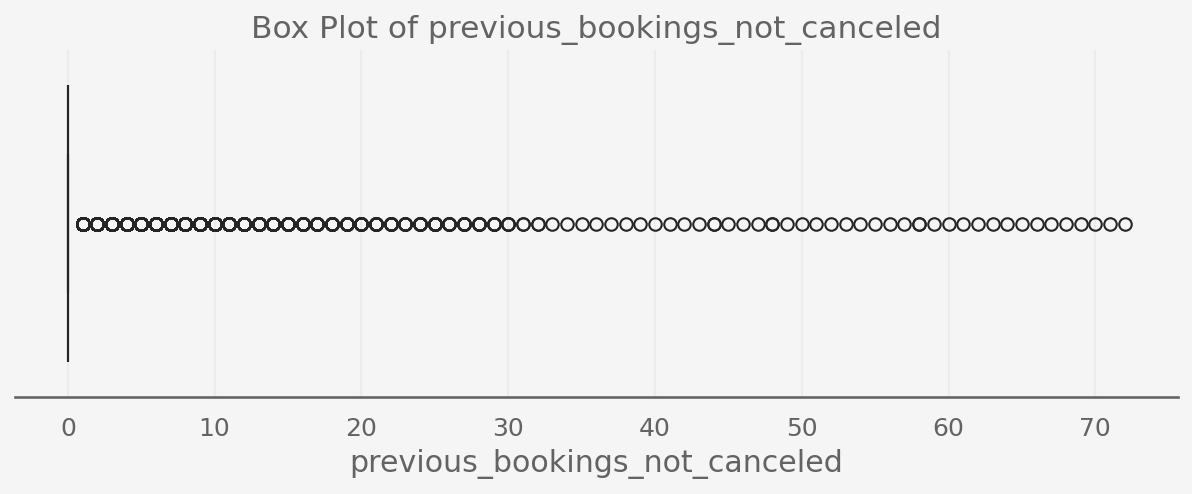

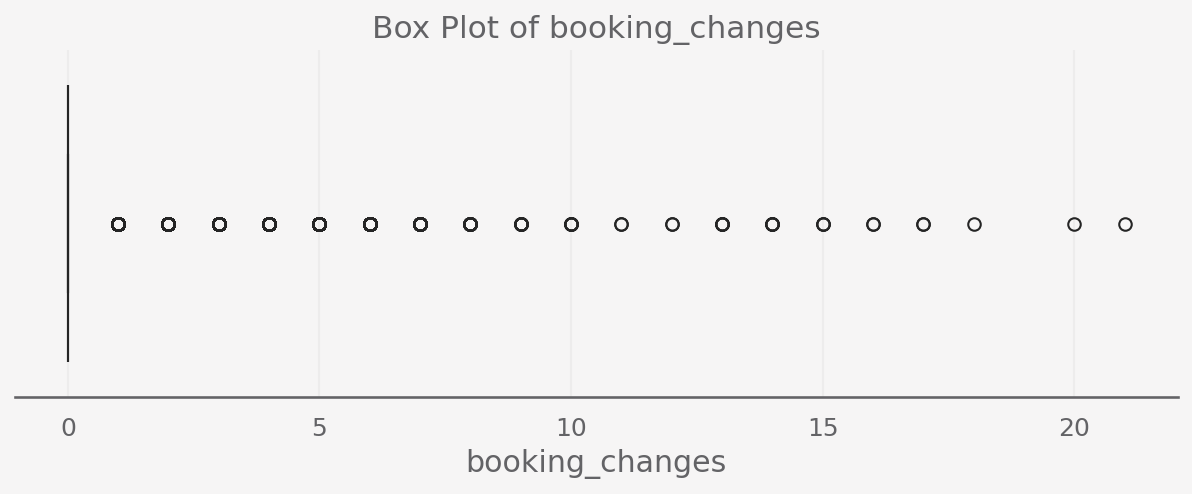

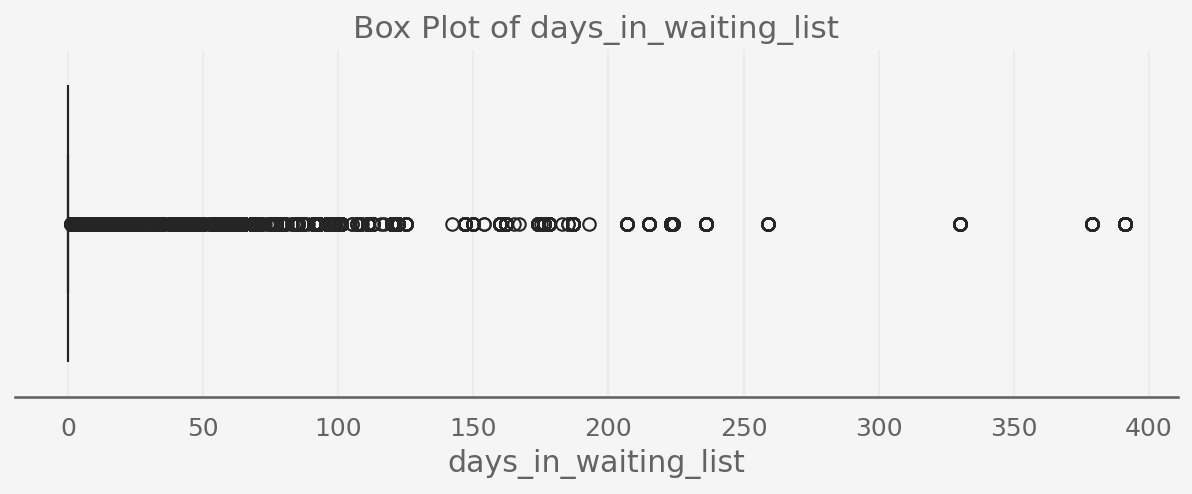

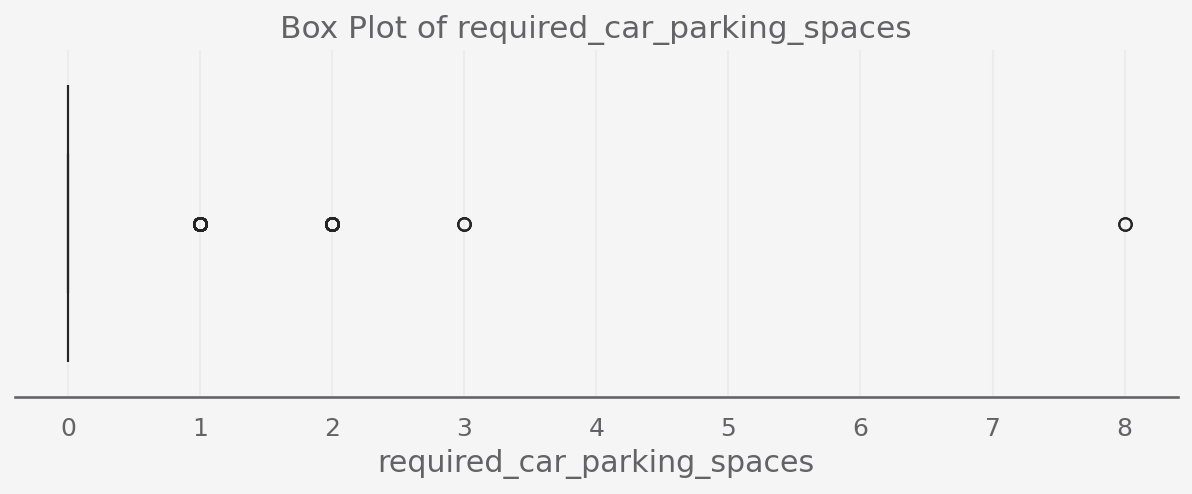

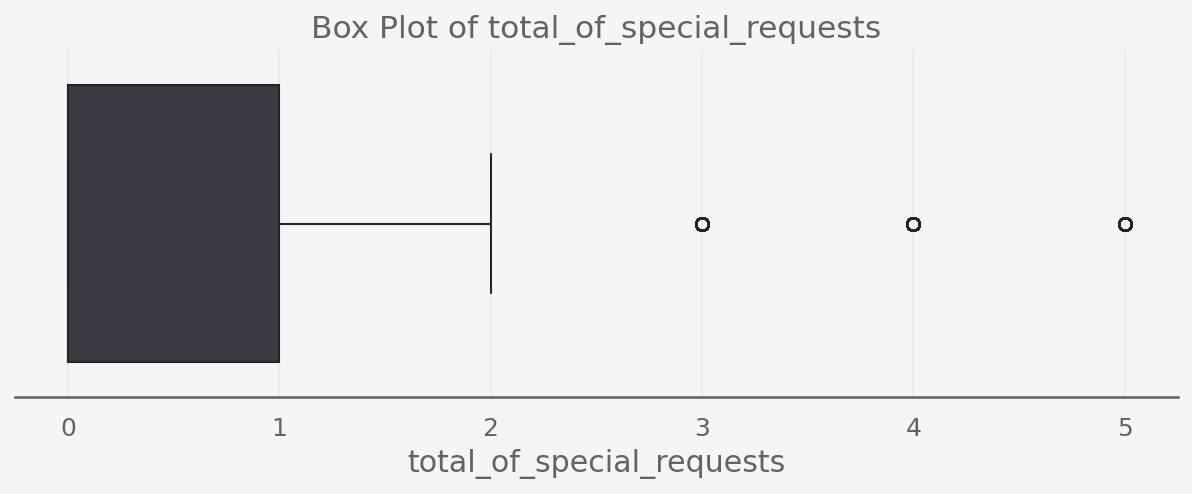

In [16]:
# Plot box plots for these numerical columns to see spread and potential outliers
for col in numerical_cols_for_eda:
    if col in df.columns:
        plt.figure(figsize=(10, 3)) # Adjust figure size
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}', fontsize=15)
        plt.xlabel(col)
        plt.show()
    else:
        print(f"Column {col} not found in DataFrame.")

<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


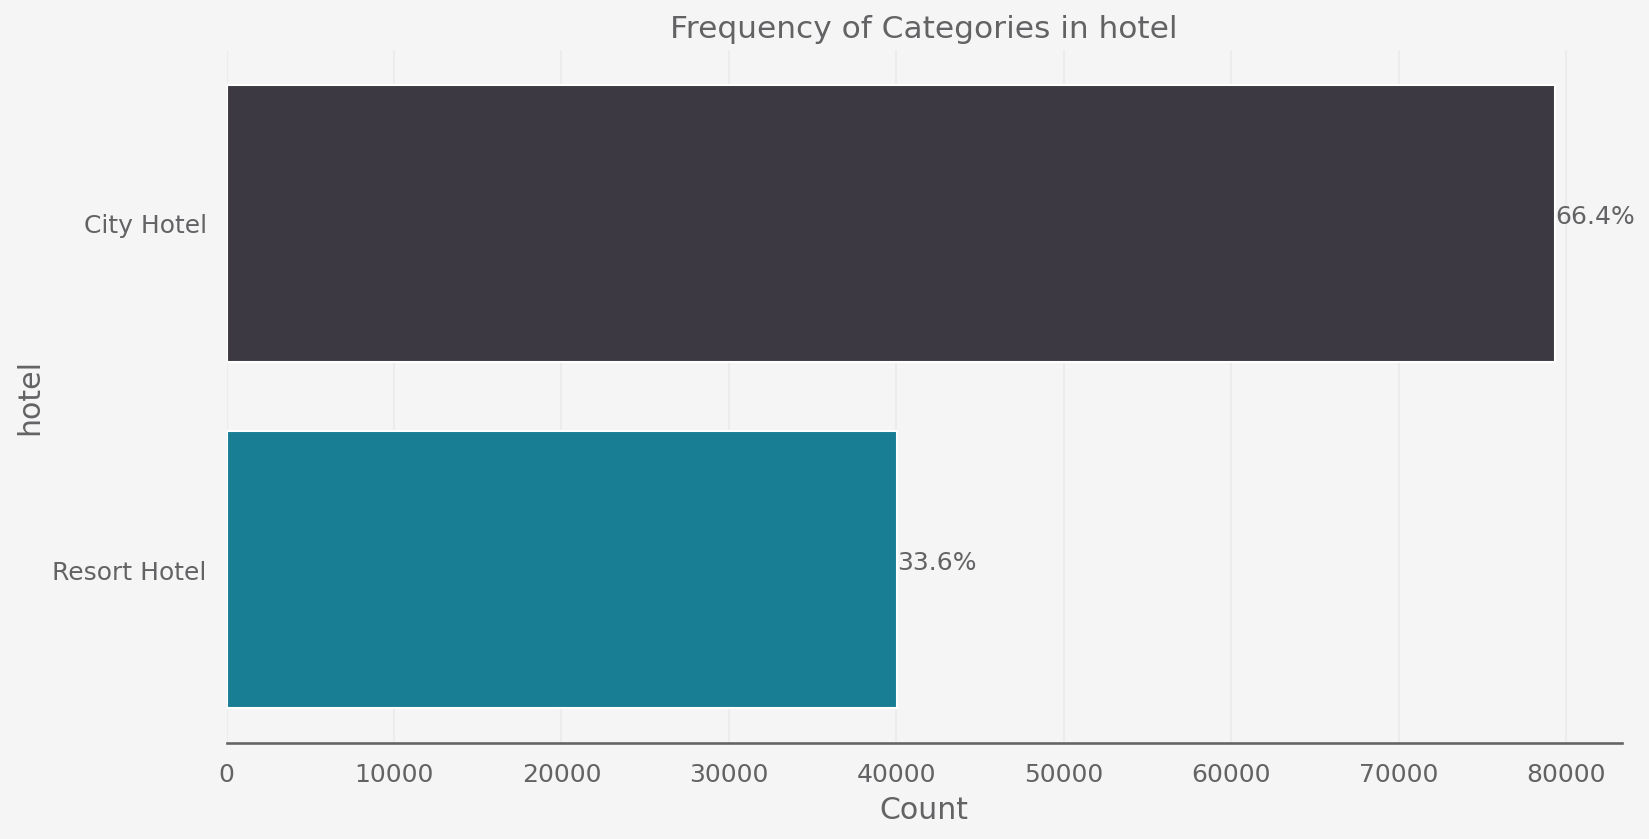


Value counts for hotel:
hotel
City Hotel      66.446101
Resort Hotel    33.553899
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


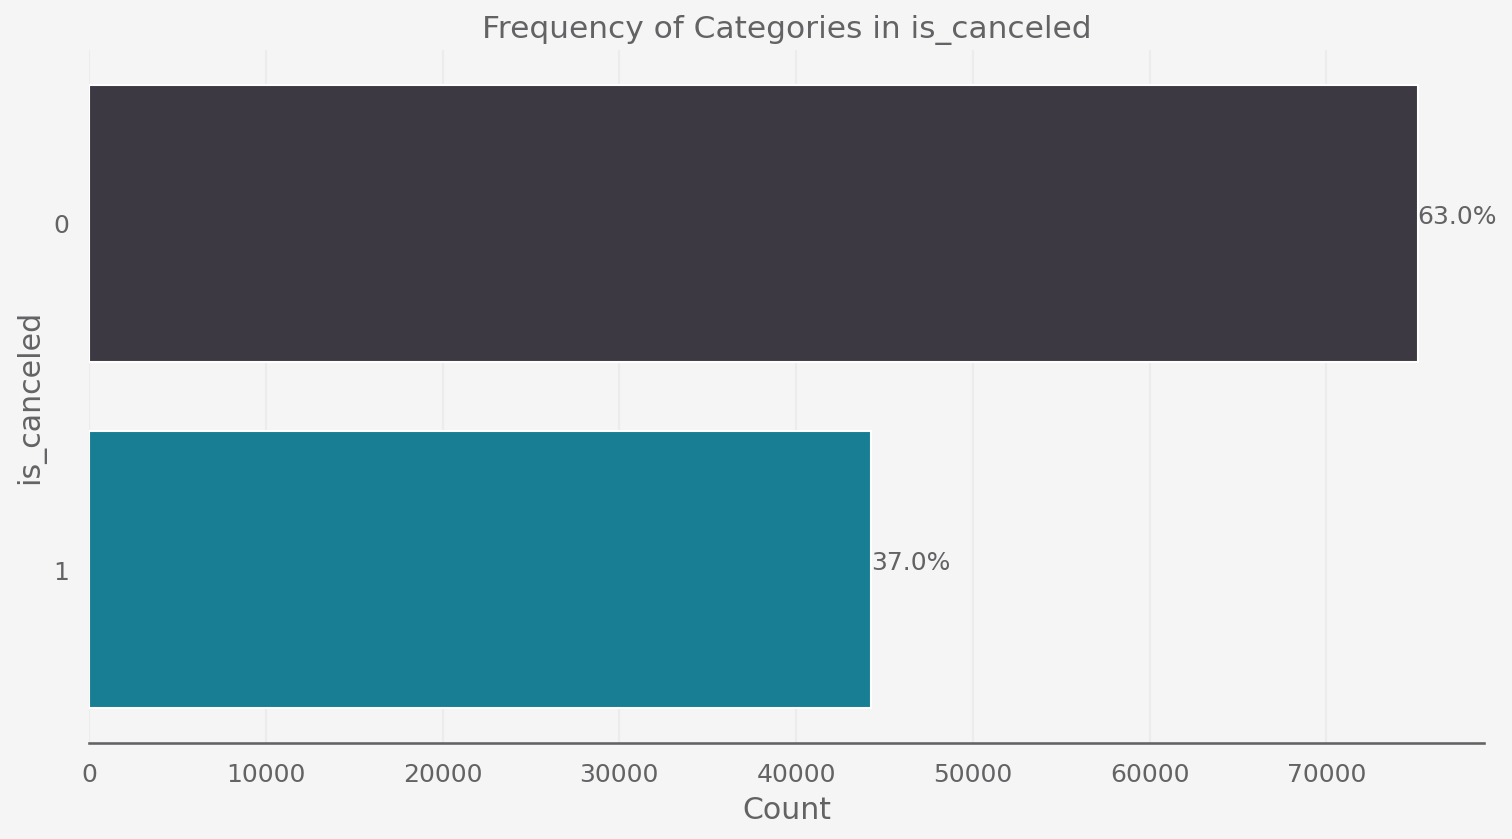


Value counts for is_canceled:
is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


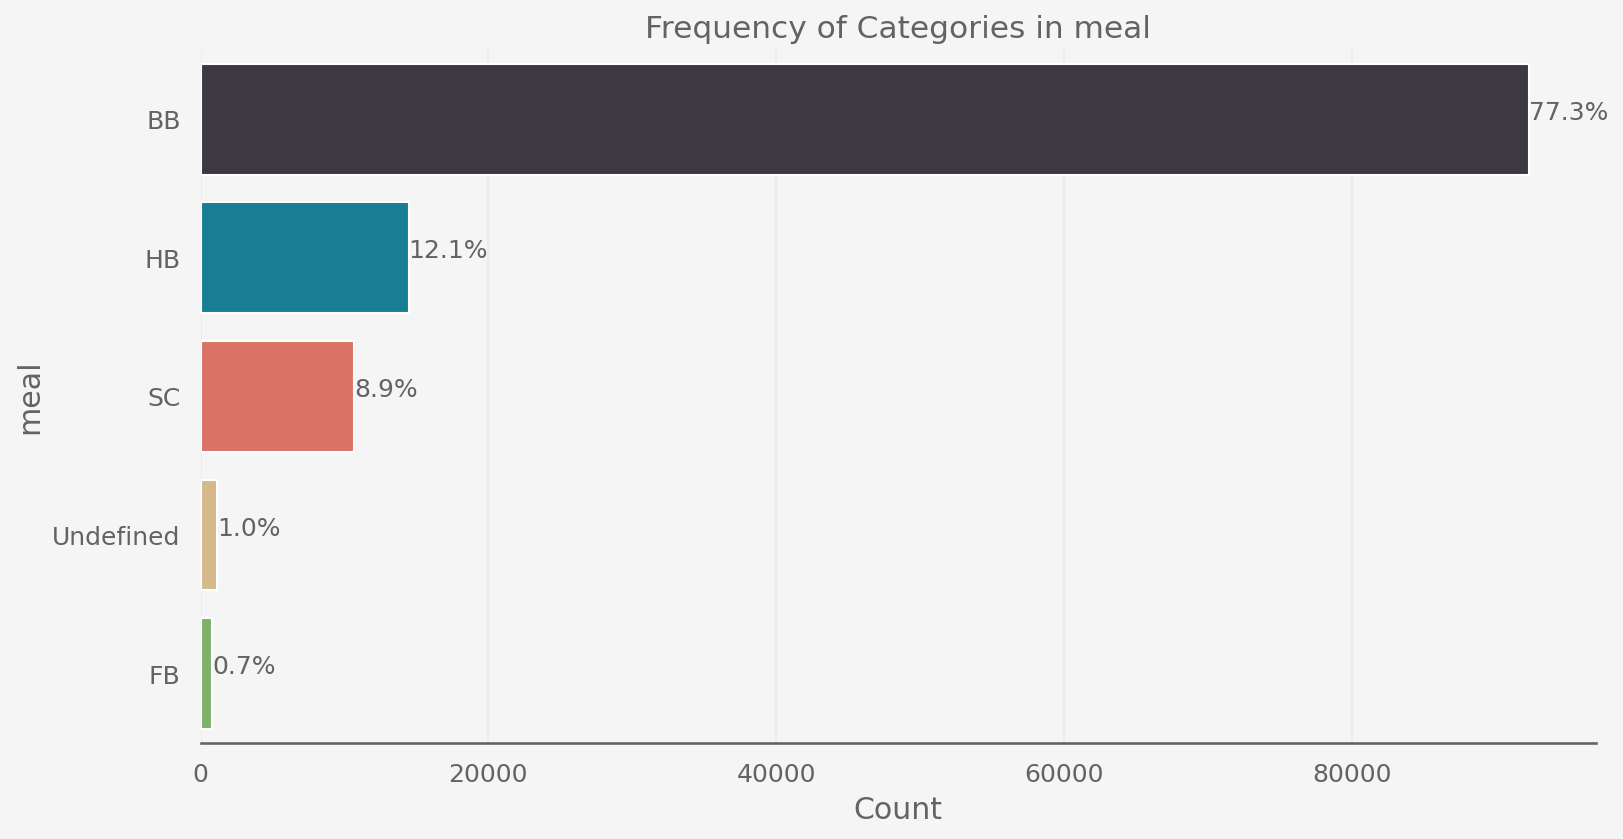


Value counts for meal:
meal
BB           77.318033
HB           12.114080
SC            8.920345
Undefined     0.979144
FB            0.668398
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


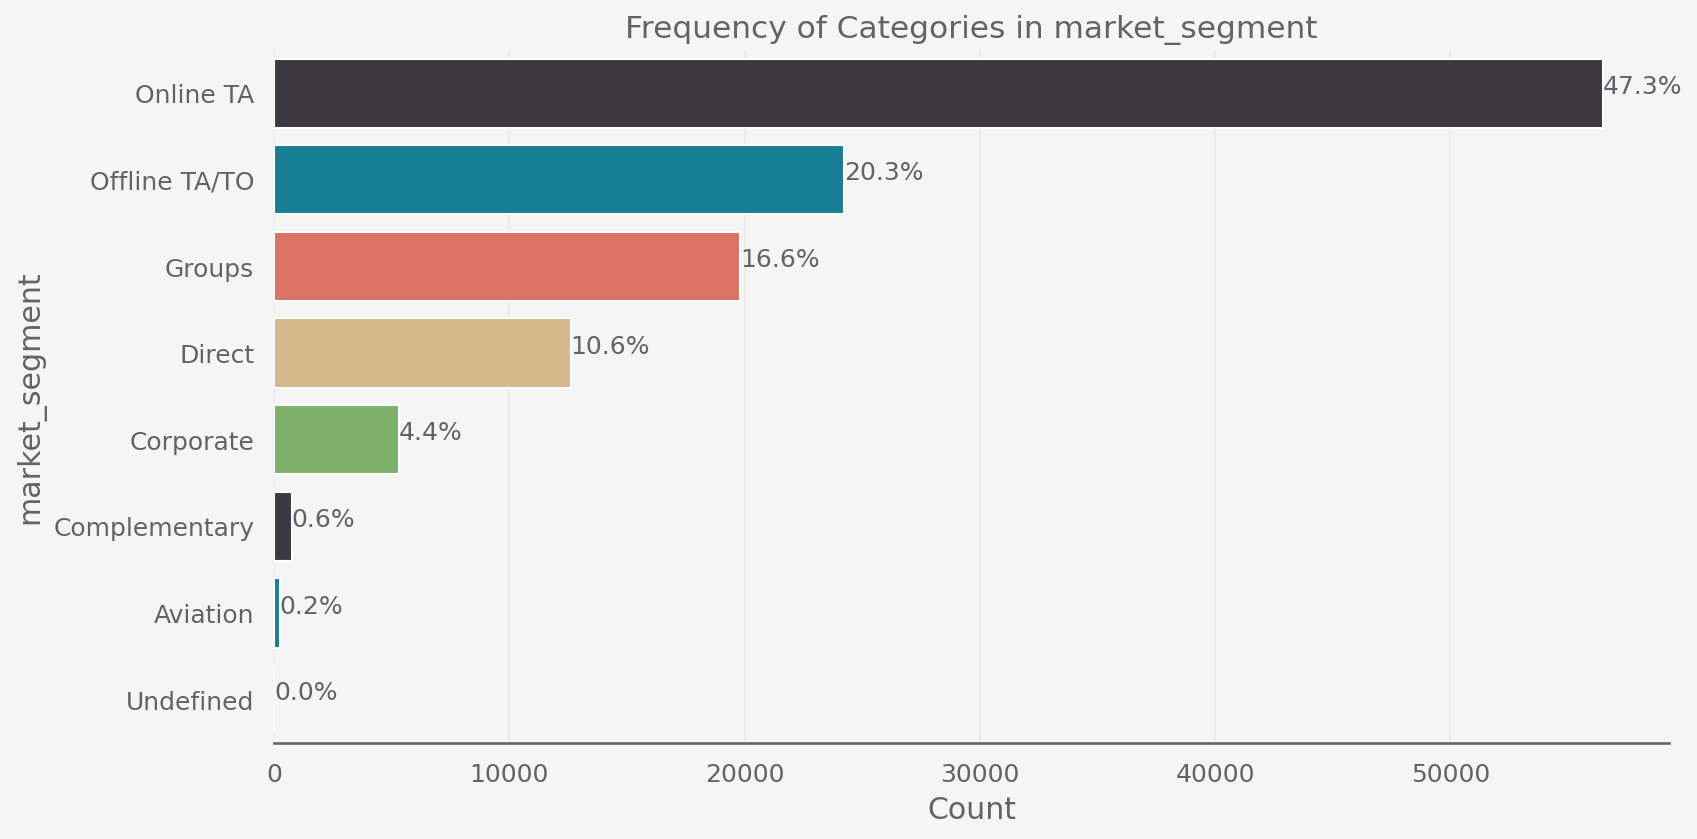


Value counts for market_segment:
market_segment
Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


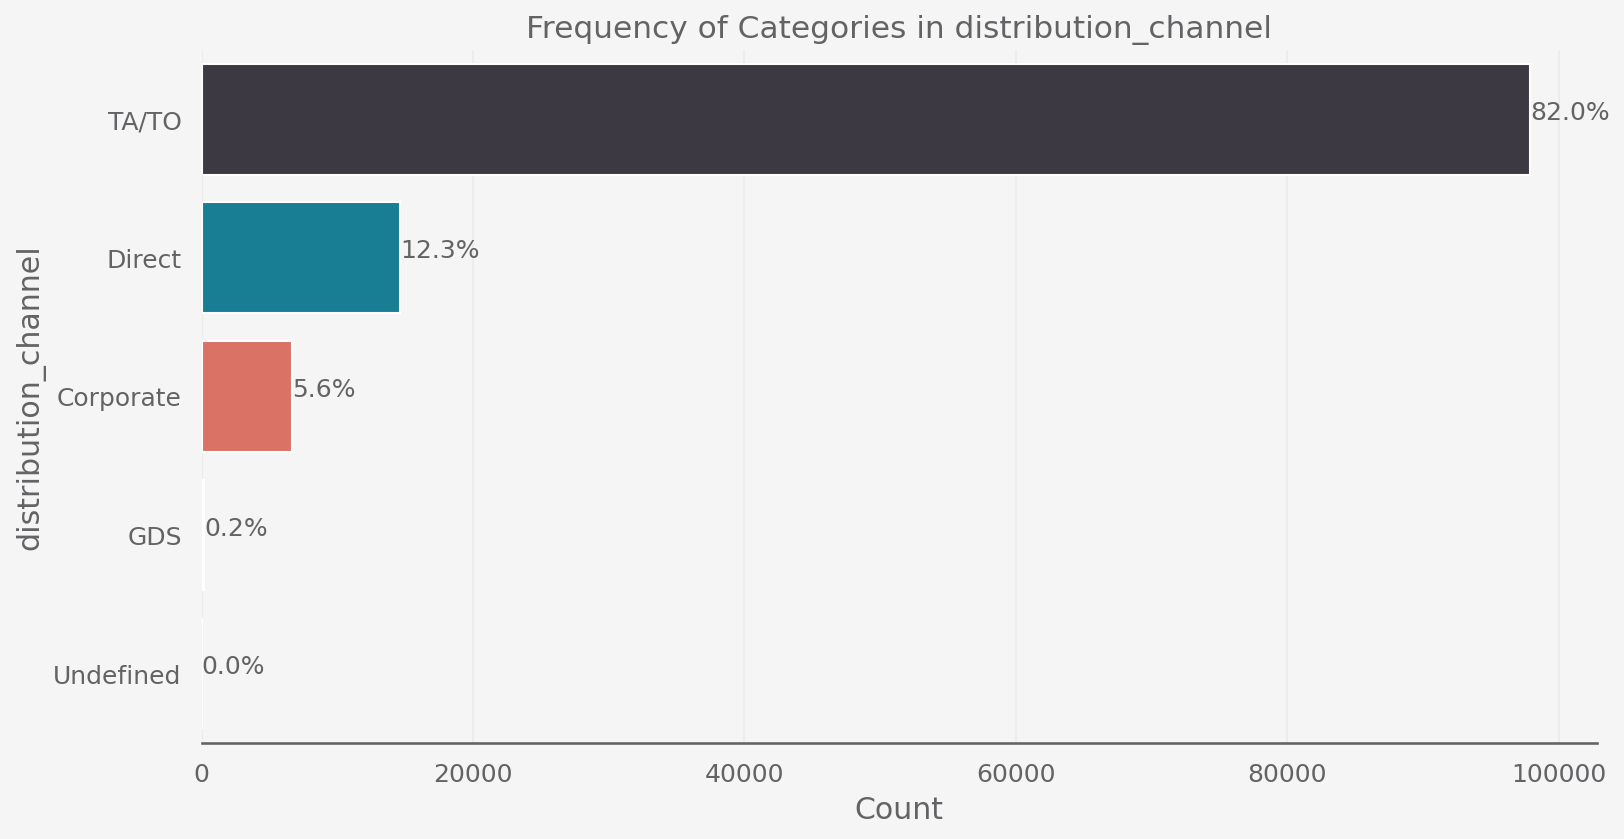


Value counts for distribution_channel:
distribution_channel
TA/TO        81.975040
Direct       12.266521
Corporate     5.592596
GDS           0.161655
Undefined     0.004188
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


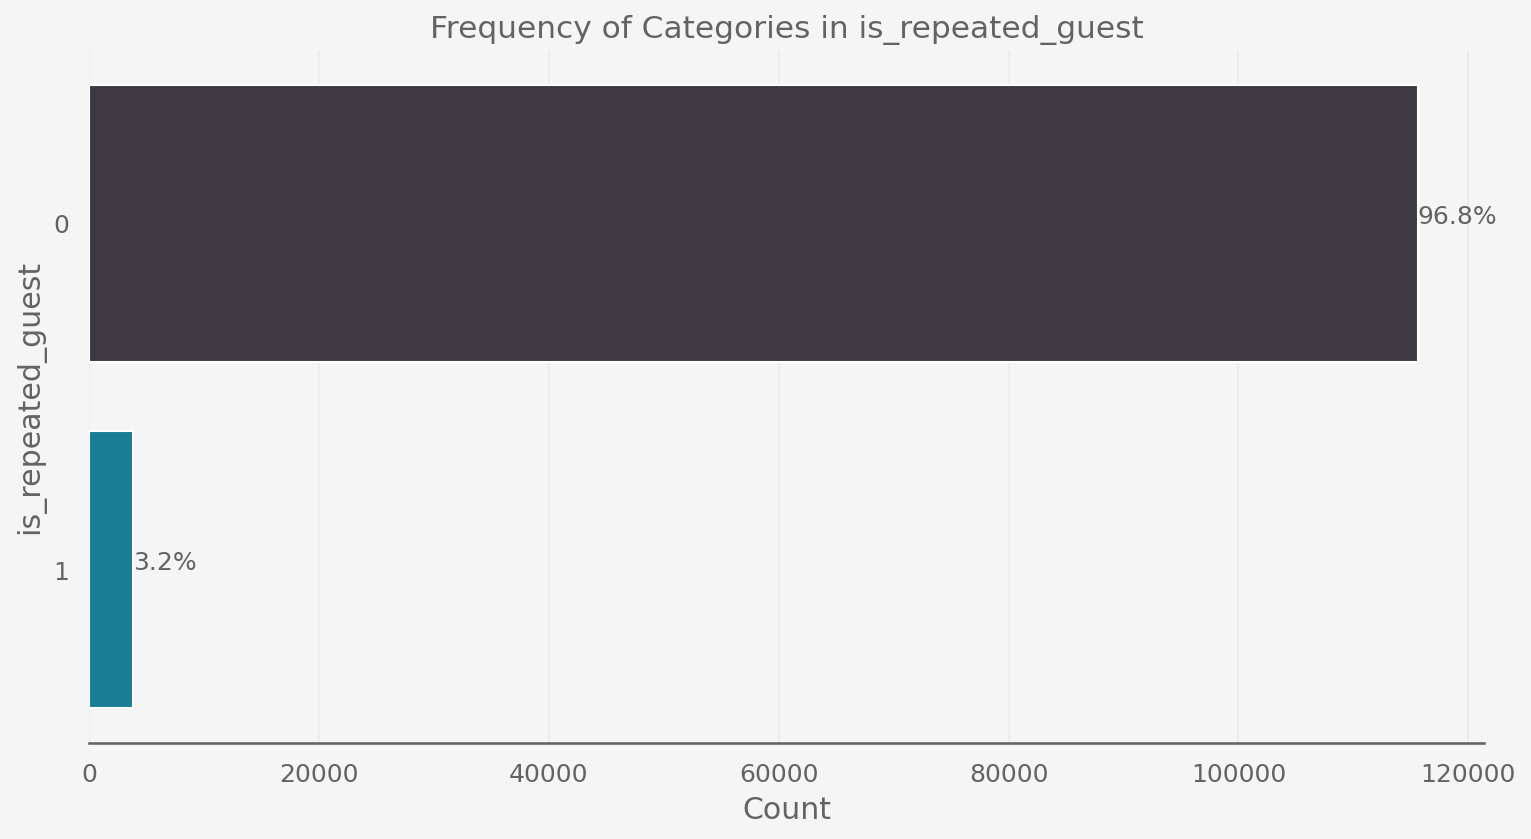


Value counts for is_repeated_guest:
is_repeated_guest
0    96.808778
1     3.191222
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


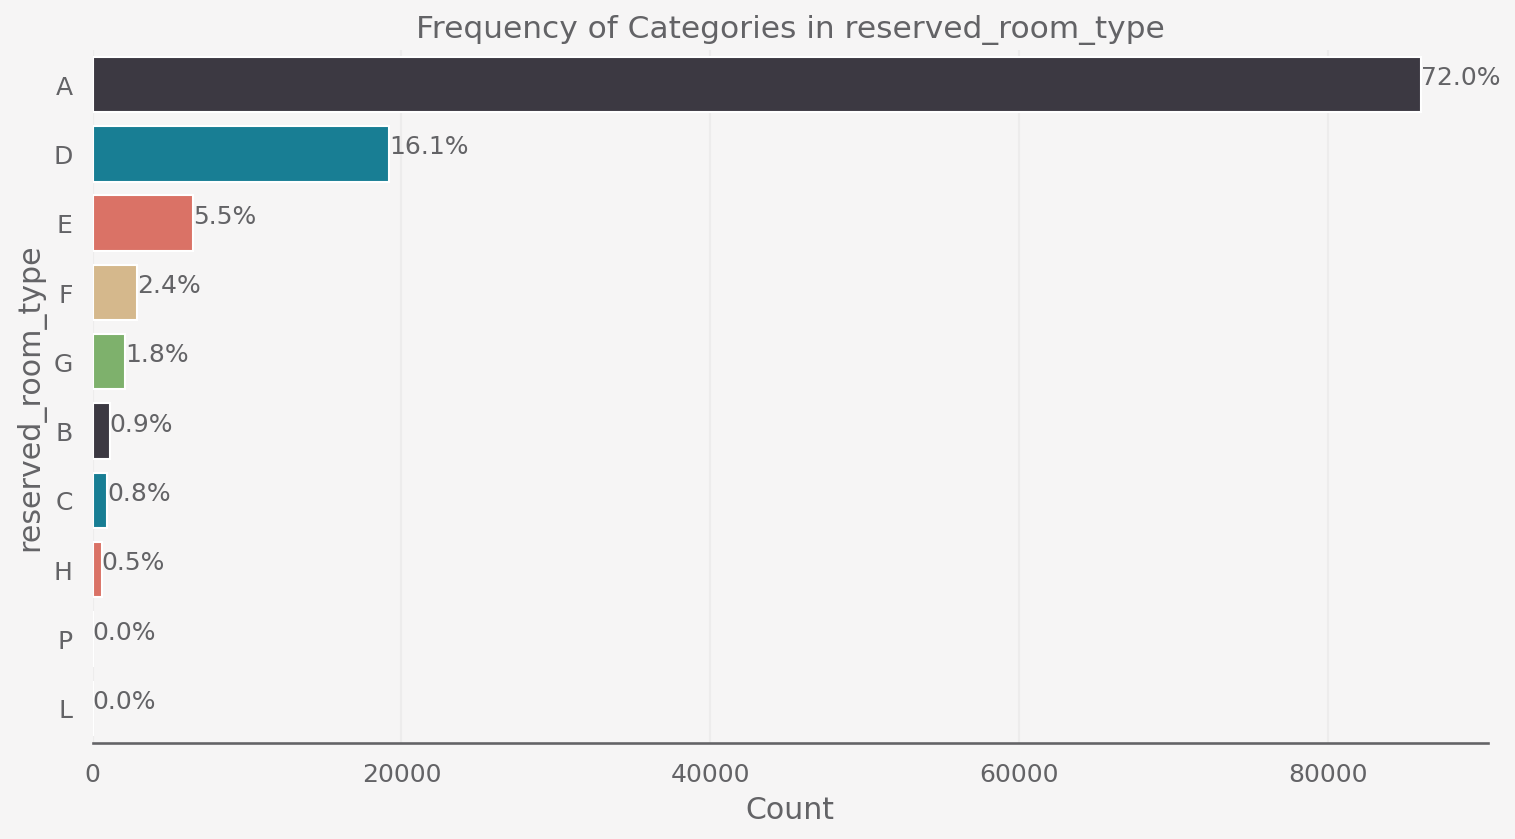


Value counts for reserved_room_type:
reserved_room_type
A    72.027808
D    16.082586
E     5.473658
F     2.426501
G     1.753916
B     0.936427
C     0.780635
H     0.503392
P     0.010051
L     0.005026
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


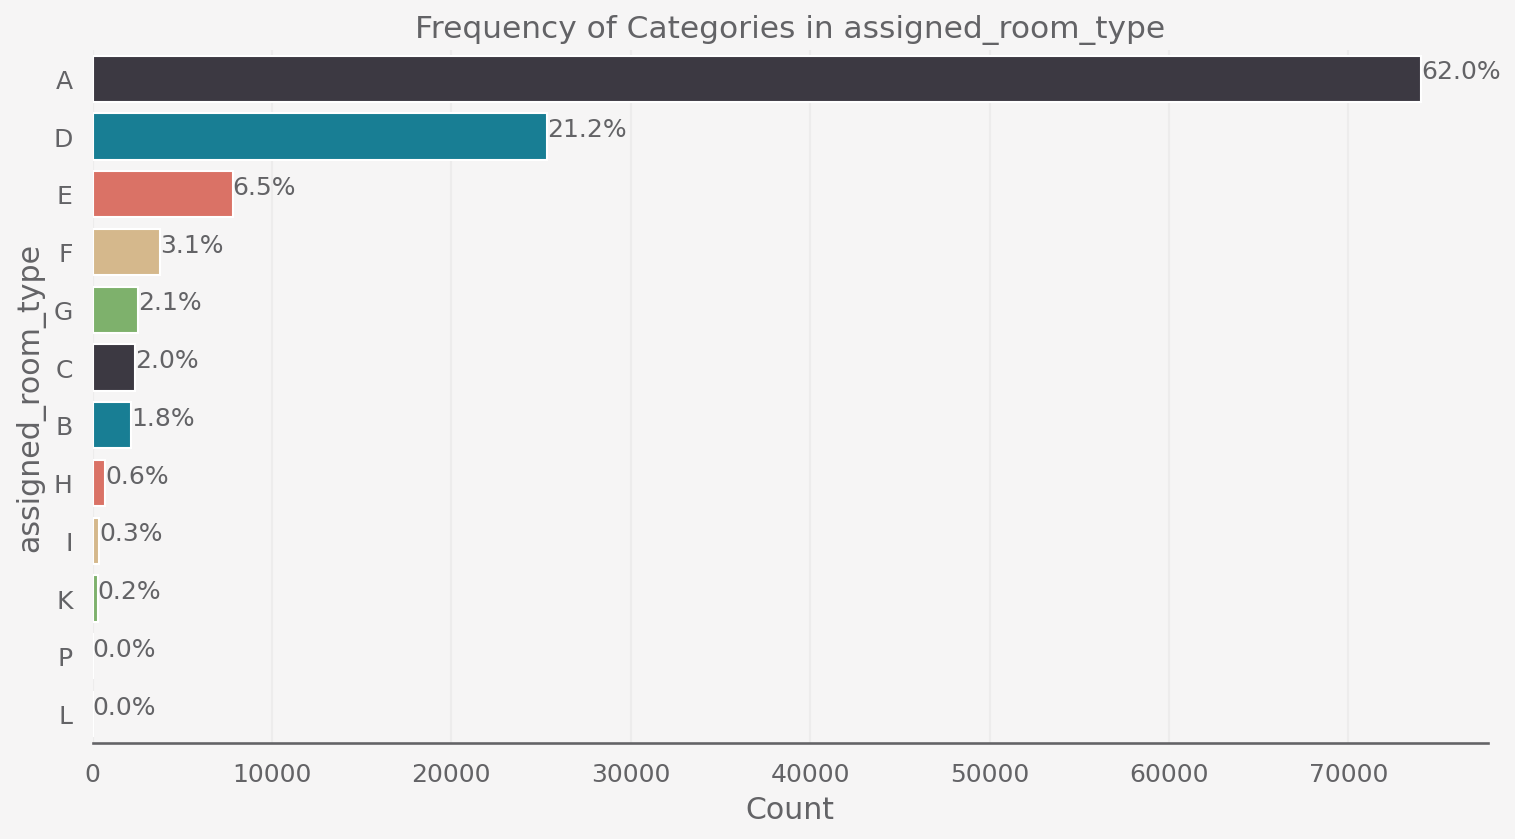


Value counts for assigned_room_type:
assigned_room_type
A    62.026133
D    21.209482
E     6.538236
F     3.141804
G     2.138370
C     1.989279
B     1.811710
H     0.596365
I     0.304046
K     0.233688
P     0.010051
L     0.000838
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


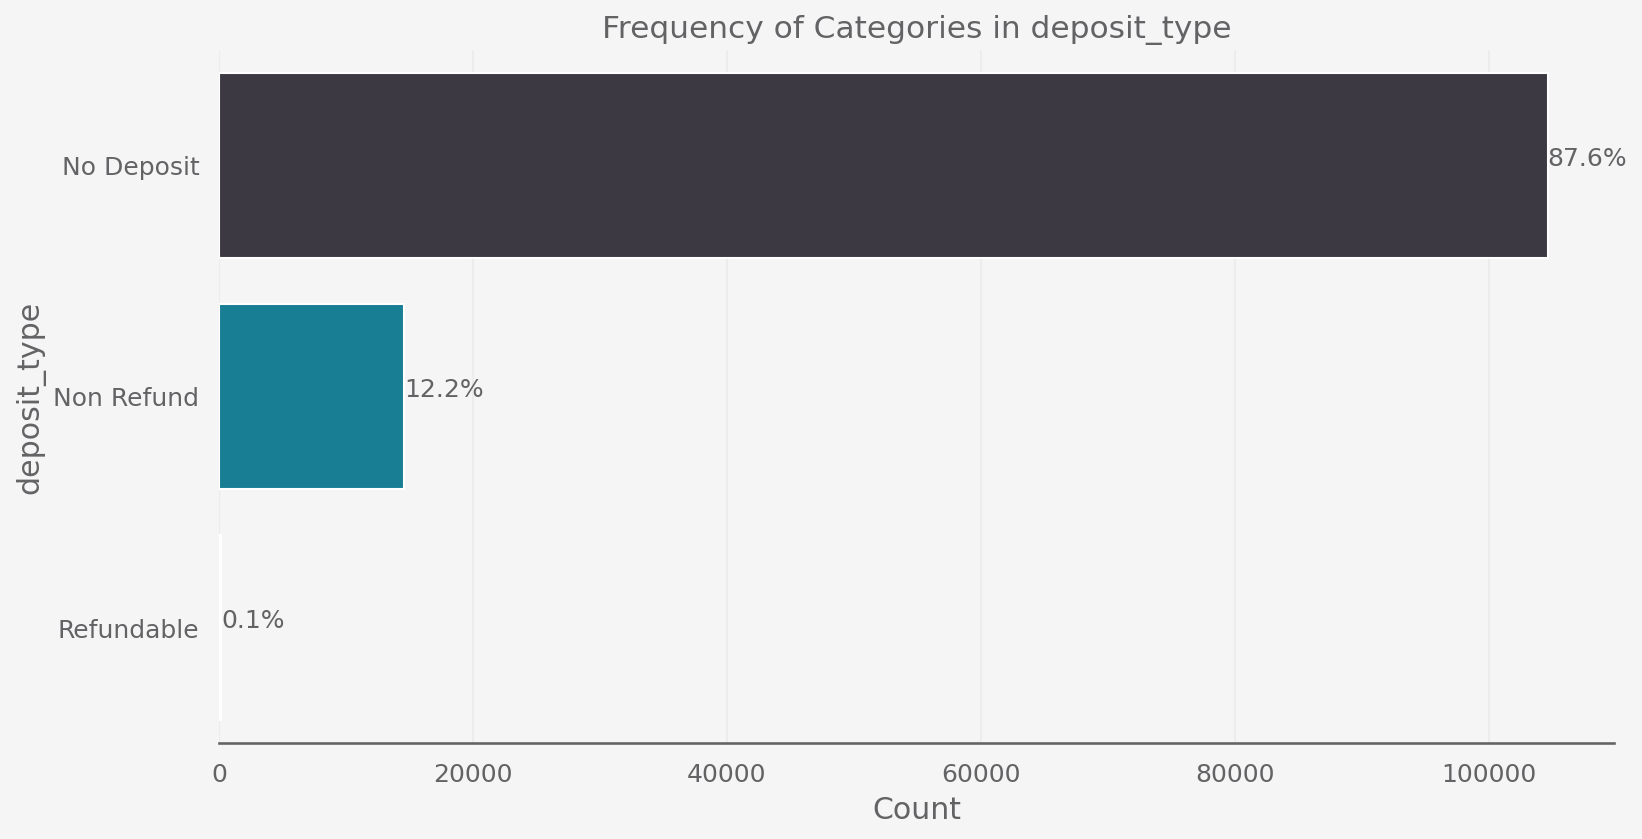


Value counts for deposit_type:
deposit_type
No Deposit    87.646369
Non Refund    12.217941
Refundable     0.135690
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


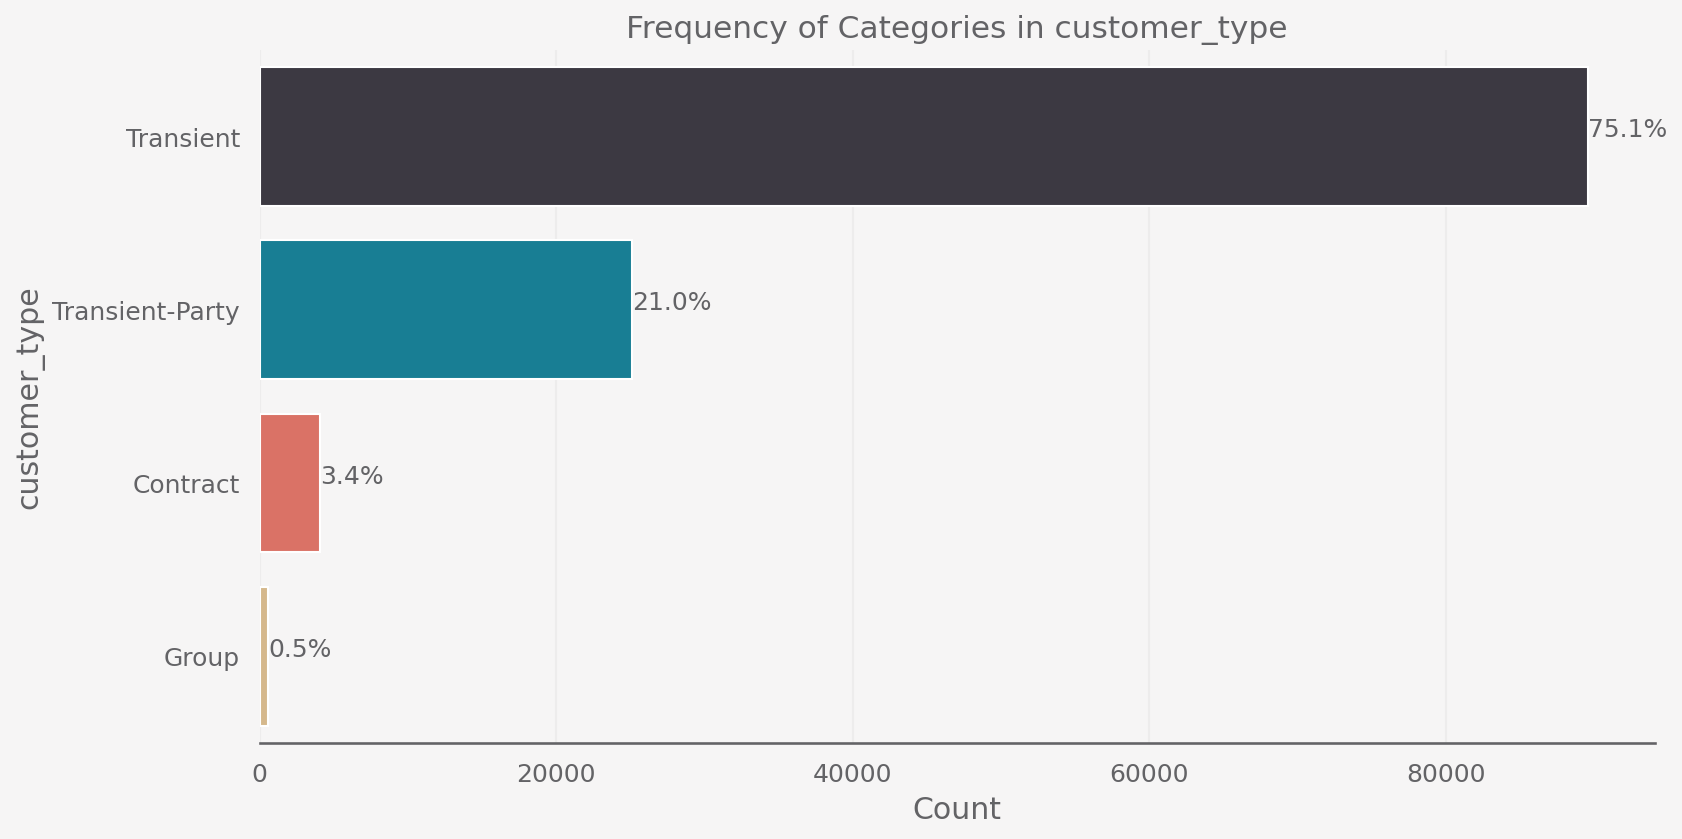


Value counts for customer_type:
customer_type
Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: proportion, dtype: float64
--------------------------------------------------


<ipython-input-17-4dba3329be3c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
<ipython-input-17-4dba3329be3c>:11: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories


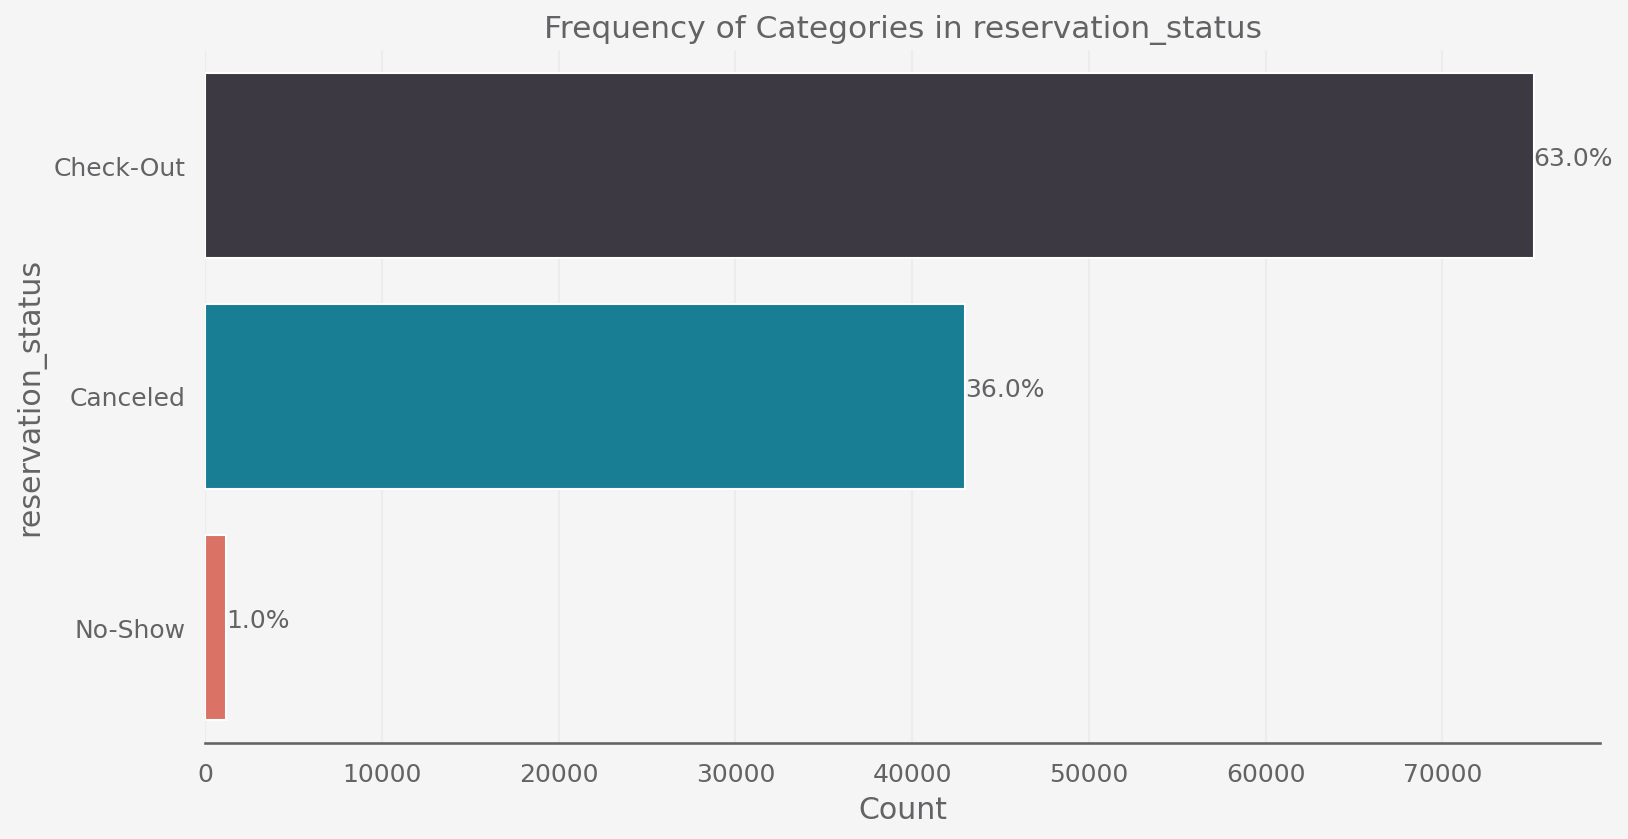


Value counts for reservation_status:
reservation_status
Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: proportion, dtype: float64
--------------------------------------------------


In [17]:
# Select categorical columns for univariate analysis
categorical_cols_for_eda = ['hotel', 'is_canceled', 'meal', 'market_segment',
                            'distribution_channel', 'is_repeated_guest',
                            'reserved_room_type', 'assigned_room_type',
                            'deposit_type', 'customer_type', 'reservation_status']
                            # Add 'country' if you want, but it might have too many unique values for a simple count plot

for col in categorical_cols_for_eda:
    if col in df.columns:
        plt.figure(figsize=(12, 6)) # Adjust figure size
        sns.countplot(y=df[col], order = df[col].value_counts().index, palette=palette) # Use y for horizontal bars if many categories
        plt.title(f'Frequency of Categories in {col}', fontsize=15)
        plt.xlabel('Count')
        plt.ylabel(col)
        # Add percentages on bars
        total = len(df[col])
        for p in plt.gca().patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/total)
                x = p.get_x() + p.get_width() + 0.02
                y = p.get_y() + p.get_height()/2
                plt.gca().annotate(percentage, (x, y))
        plt.show()

        # Print value counts for more detail
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts(normalize=True) * 100) # normalize=True gives percentages
        print("-" * 50)

    else:
        print(f"Column {col} not found in DataFrame.")

# Bi-Variate Analysis


In [18]:
# Ensure the custom plotting parameters are still active
sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette), # palette defined in your initial code
    rc=custom_params # custom_params defined in your initial code
)

## Correlation Test

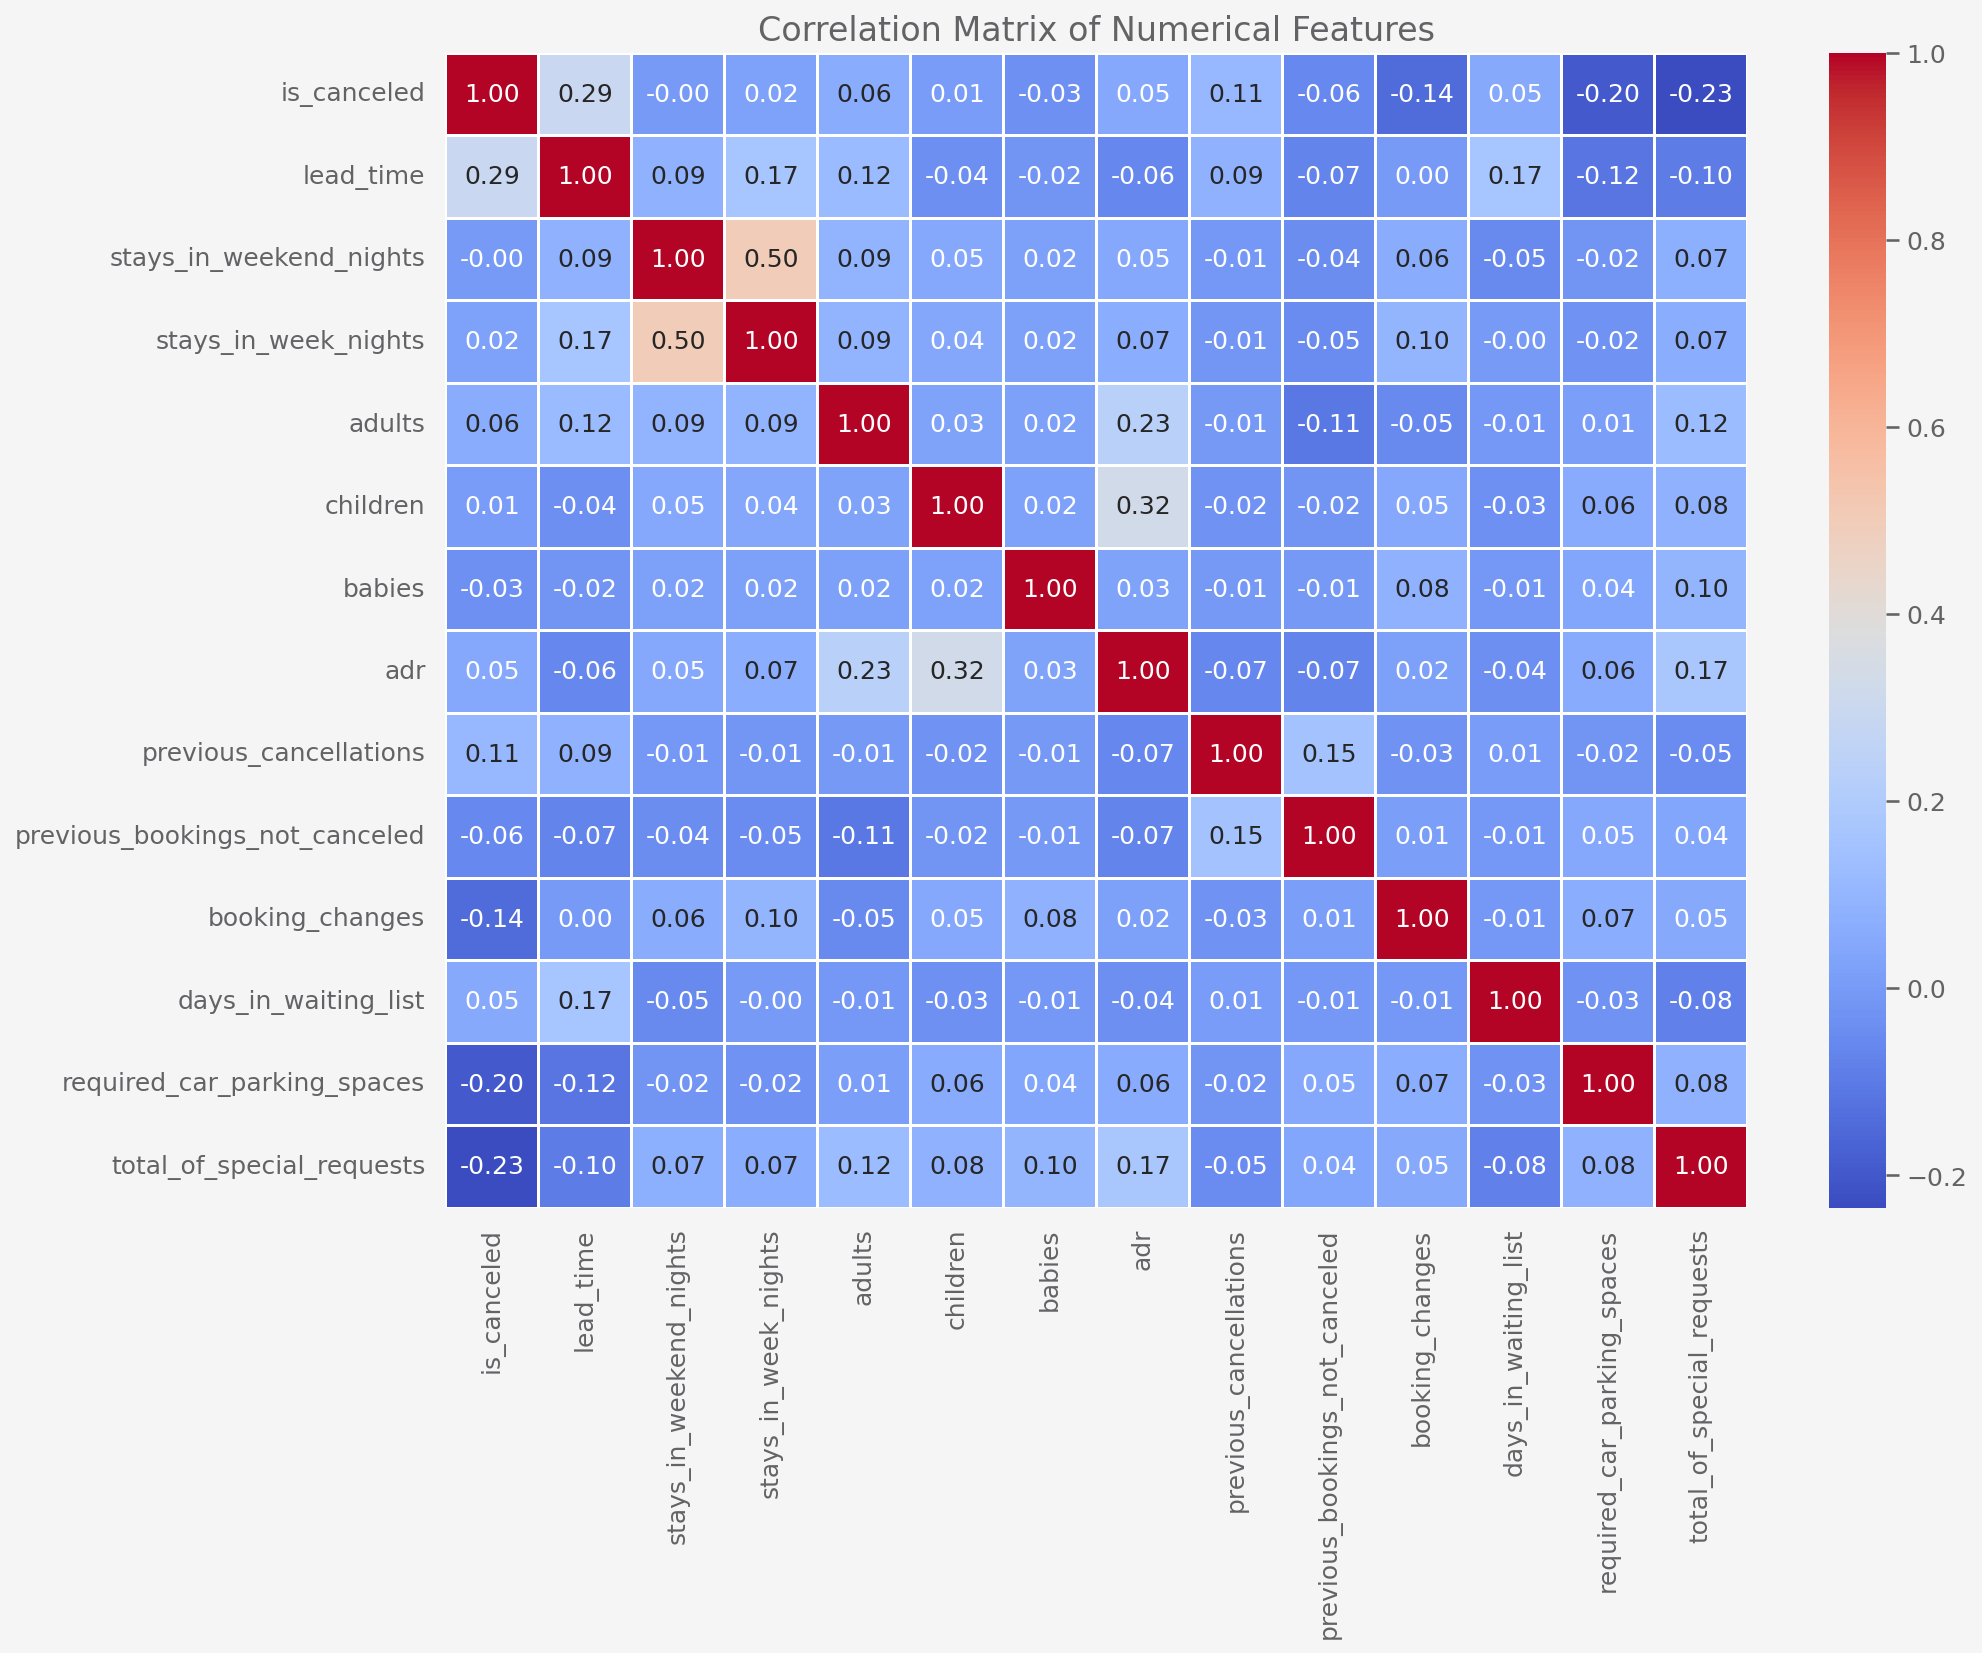


Correlation with 'is_canceled':
is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
children                          0.005048
stays_in_weekend_nights          -0.001791
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for the correlation matrix
# Include 'is_canceled' to see its linear correlation with other numerical variables
numerical_cols_for_corr = ['is_canceled', 'lead_time', 'stays_in_weekend_nights',
                           'stays_in_week_nights', 'adults', 'children', 'babies', 'adr',
                           'previous_cancellations', 'previous_bookings_not_canceled',
                           'booking_changes', 'days_in_waiting_list',
                           'required_car_parking_spaces', 'total_of_special_requests']

# Ensure all selected columns exist in the DataFrame
existing_numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col in df.columns]

if not existing_numerical_cols_for_corr:
    print("None of the specified numerical columns for correlation exist in the DataFrame.")
else:
    correlation_matrix = df[existing_numerical_cols_for_corr].corr()

    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

    print("\nCorrelation with 'is_canceled':")
    print(correlation_matrix['is_canceled'].sort_values(ascending=False))


## AVOVA TEST


--- ANOVA & Tukey HSD Tests (Numerical vs. is_canceled) ---

Testing 'lead_time' vs 'is_canceled':
ANOVA: F-statistic = 11222.1982, P-value = 0.0000
  -> Significant difference found for lead_time based on 'is_canceled'.


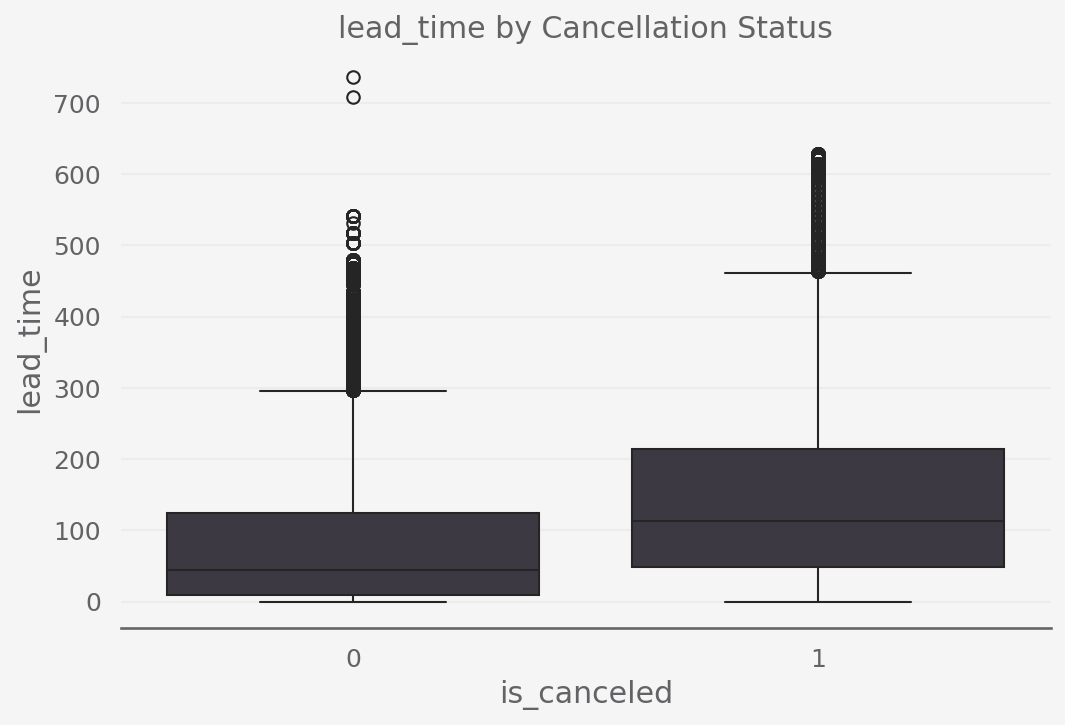


Testing 'adr' vs 'is_canceled':
ANOVA: F-statistic = 270.6235, P-value = 0.0000
  -> Significant difference found for adr based on 'is_canceled'.


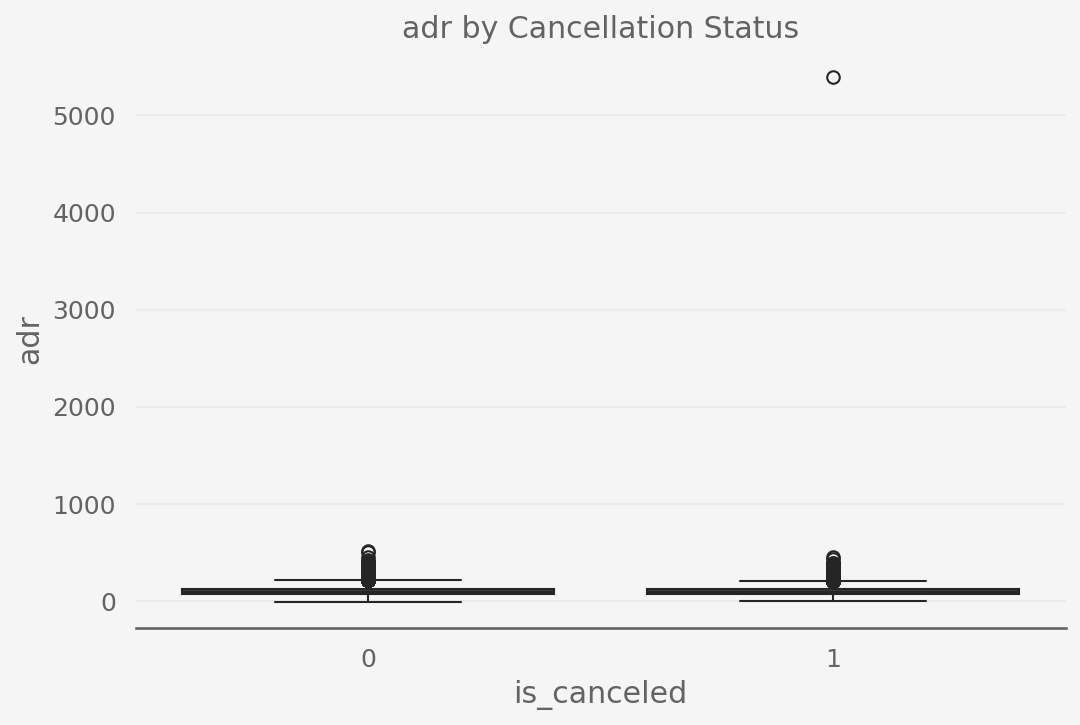


Testing 'previous_cancellations' vs 'is_canceled':
ANOVA: F-statistic = 1465.8650, P-value = 0.0000
  -> Significant difference found for previous_cancellations based on 'is_canceled'.


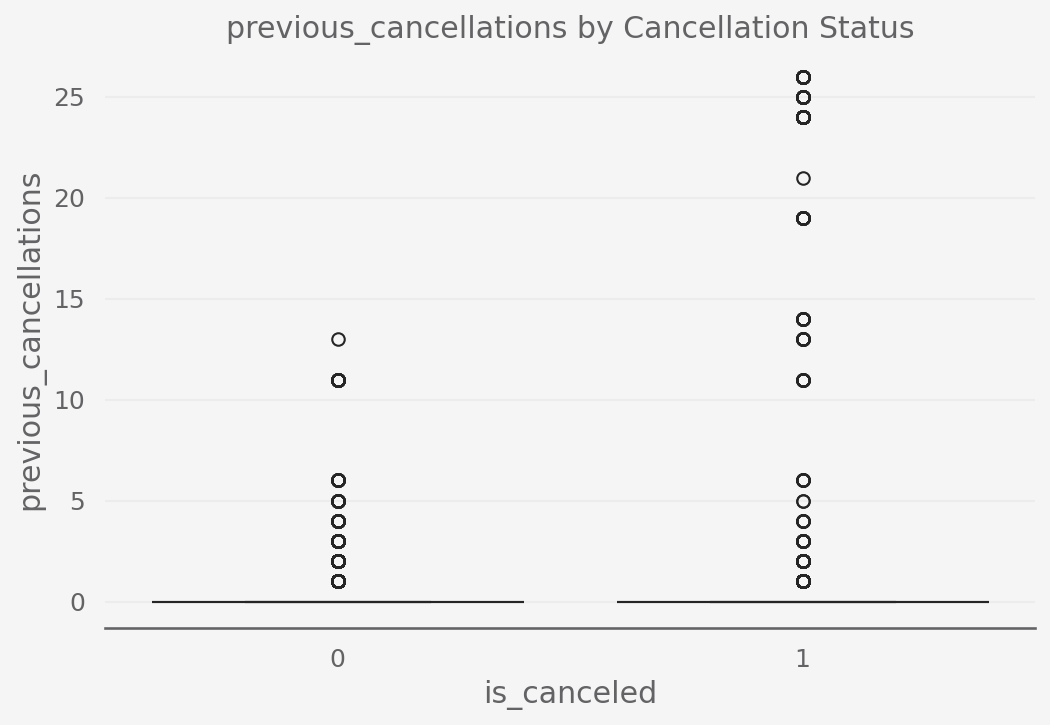


Testing 'booking_changes' vs 'is_canceled':
ANOVA: F-statistic = 2541.7314, P-value = 0.0000
  -> Significant difference found for booking_changes based on 'is_canceled'.


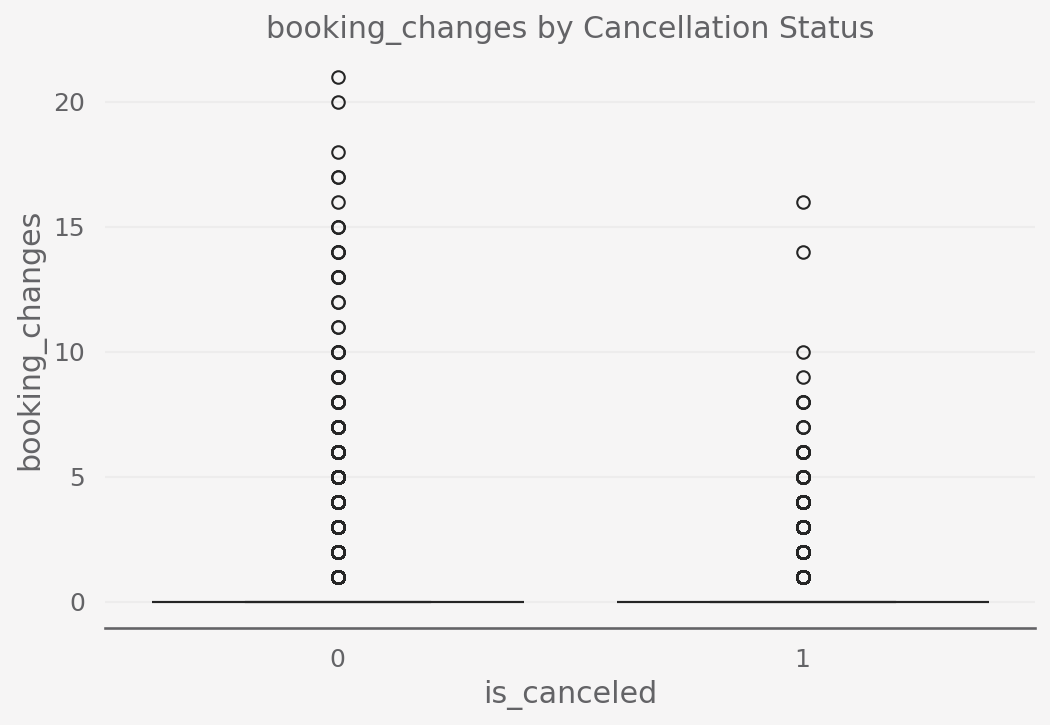


Testing 'days_in_waiting_list' vs 'is_canceled':
ANOVA: F-statistic = 351.5678, P-value = 0.0000
  -> Significant difference found for days_in_waiting_list based on 'is_canceled'.


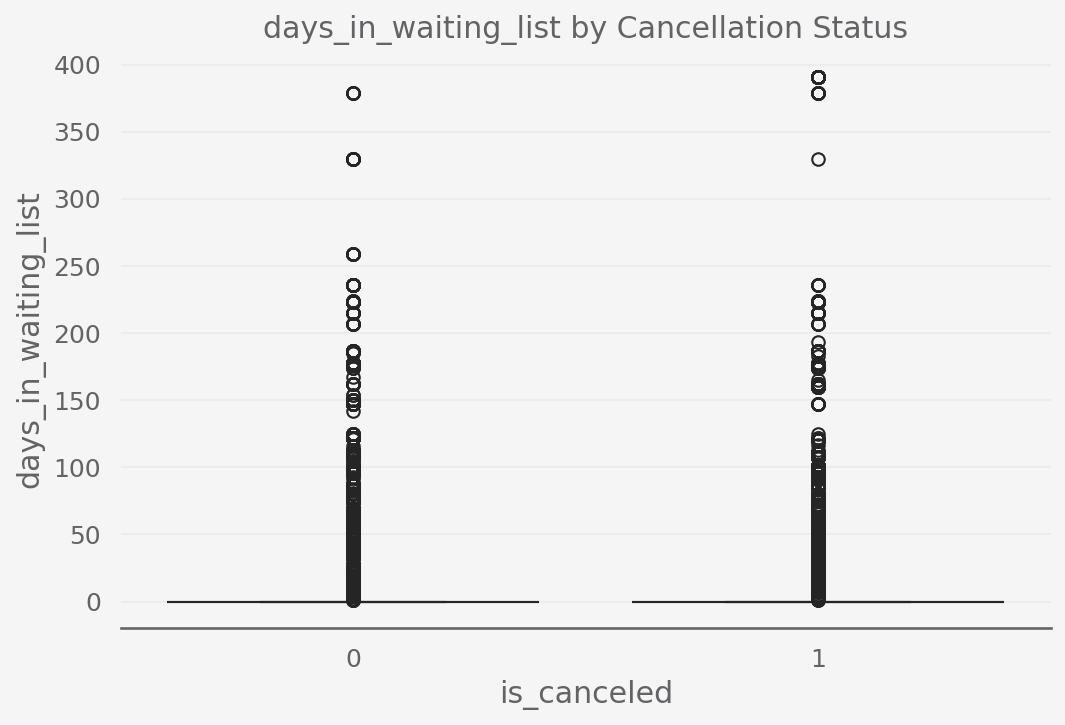


Testing 'total_of_special_requests' vs 'is_canceled':
ANOVA: F-statistic = 6957.1009, P-value = 0.0000
  -> Significant difference found for total_of_special_requests based on 'is_canceled'.


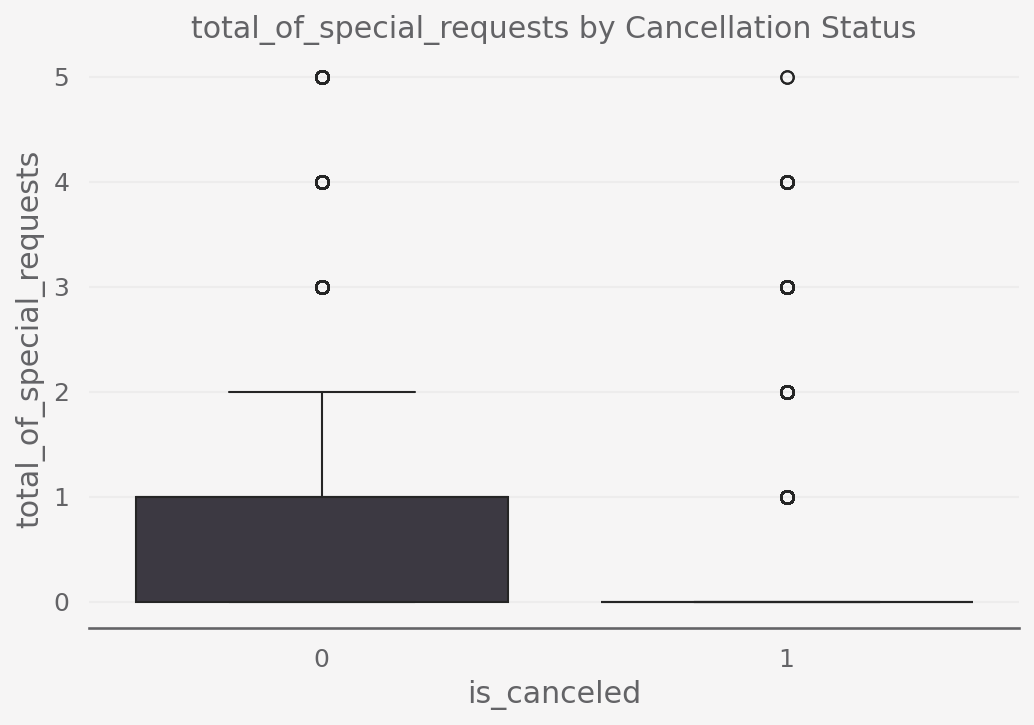

In [20]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Numerical features to test against 'is_canceled'
numerical_features_for_anova = ['lead_time', 'adr', 'previous_cancellations',
                                'booking_changes', 'days_in_waiting_list',
                                'total_of_special_requests']

# Ensure 'is_canceled' is suitable for grouping (e.g., 0 and 1)
if 'is_canceled' in df.columns and df['is_canceled'].nunique() == 2:
    print("\n--- ANOVA & Tukey HSD Tests (Numerical vs. is_canceled) ---")
    for num_col in numerical_features_for_anova:
        if num_col in df.columns:
            print(f"\nTesting '{num_col}' vs 'is_canceled':")
            group0 = df[df['is_canceled'] == 0][num_col].dropna() # Not Canceled
            group1 = df[df['is_canceled'] == 1][num_col].dropna() # Canceled

            if len(group0) > 1 and len(group1) > 1: # Need at least 2 samples in each group
                f_statistic, p_value = stats.f_oneway(group0, group1)
                print(f"ANOVA: F-statistic = {f_statistic:.4f}, P-value = {p_value:.4f}")

                if p_value < 0.05:
                    print(f"  -> Significant difference found for {num_col} based on 'is_canceled'.")
                    # Since 'is_canceled' only has two groups, Tukey isn't strictly necessary
                    # to tell *which* groups differ, but ANOVA confirms the difference.
                    # If 'is_canceled' had >2 levels, Tukey would be shown below.
                    # For visualization, you can compare means or distributions:
                    plt.figure(figsize=(8,5))
                    sns.boxplot(x='is_canceled', y=num_col, data=df)
                    plt.title(f'{num_col} by Cancellation Status')
                    plt.show()
                else:
                    print(f"  -> No significant difference found for {num_col} based on 'is_canceled'.")
            else:
                print(f"  -> Not enough data in one or both groups for {num_col} to perform ANOVA.")
        else:
            print(f"Column {num_col} not found in DataFrame.")
else:
    print("'is_canceled' column not found or does not have 2 unique values for ANOVA grouping.")

## Tukey Test


--- ANOVA & Tukey HSD: 'adr' vs 'customer_type' ---
ANOVA: F-statistic = 1302.3560, P-value = 0.0000
  -> Significant difference found for adr across customer_type categories.
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group  -4.0611 0.2564  -9.7436   1.6215  False
 Contract       Transient   19.464    0.0  17.4179  21.5101   True
 Contract Transient-Party  -1.4654 0.3003  -3.6227   0.6919  False
    Group       Transient   23.525    0.0  18.1894  28.8607   True
    Group Transient-Party   2.5957 0.6015  -2.7836    7.975  False
Transient Transient-Party -20.9294    0.0 -21.8414 -20.0173   True
------------------------------------------------------------------


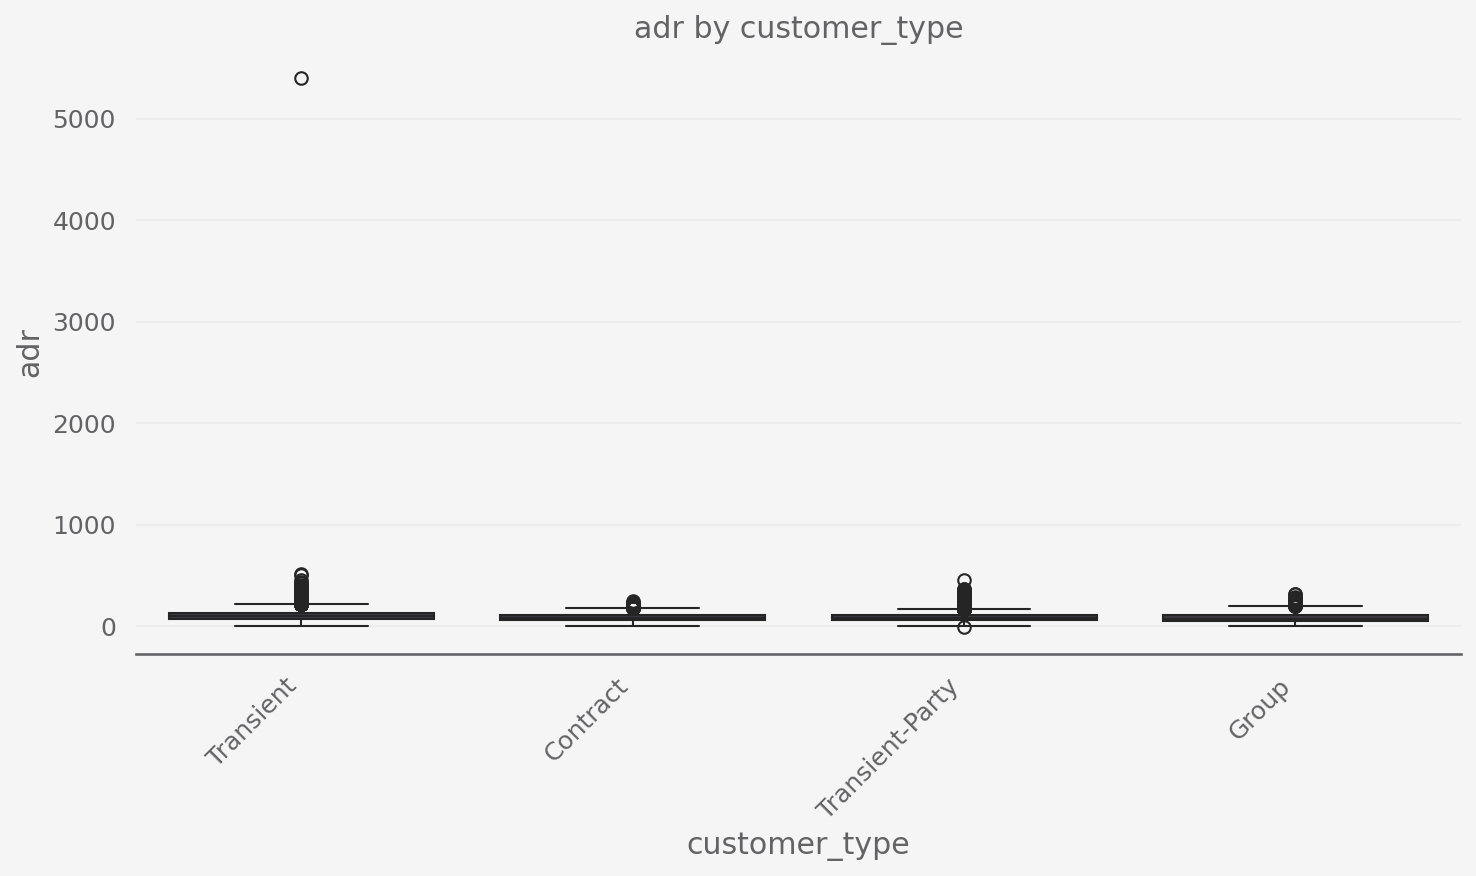

In [21]:
# Example: ANOVA & Tukey for 'adr' vs 'customer_type'
num_var_tukey = 'adr'
cat_var_tukey = 'customer_type'

if num_var_tukey in df.columns and cat_var_tukey in df.columns and df[cat_var_tukey].nunique() > 2:
    print(f"\n--- ANOVA & Tukey HSD: '{num_var_tukey}' vs '{cat_var_tukey}' ---")

    # Prepare data for ANOVA (list of arrays, one for each category)
    categories = df[cat_var_tukey].unique()
    grouped_data = [df[df[cat_var_tukey] == cat][num_var_tukey].dropna() for cat in categories]
    # Filter out groups with less than 2 samples
    grouped_data_filtered = [g for g in grouped_data if len(g) > 1]

    if len(grouped_data_filtered) > 1: # Need at least two groups with enough data
        f_statistic, p_value = stats.f_oneway(*grouped_data_filtered) # * unpacks the list
        print(f"ANOVA: F-statistic = {f_statistic:.4f}, P-value = {p_value:.4f}")

        if p_value < 0.05:
            print(f"  -> Significant difference found for {num_var_tukey} across {cat_var_tukey} categories.")
            # Perform Tukey's HSD test
            # Ensure no NaN values in the specific columns used by Tukey
            tukey_data = df[[num_var_tukey, cat_var_tukey]].dropna()
            if not tukey_data.empty:
                tukey_results = pairwise_tukeyhsd(tukey_data[num_var_tukey], tukey_data[cat_var_tukey], alpha=0.05)
                print(tukey_results)

                # Visualize with boxplot
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=cat_var_tukey, y=num_var_tukey, data=df)
                plt.title(f'{num_var_tukey} by {cat_var_tukey}')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                print("  -> Not enough non-missing data to perform Tukey's HSD.")

        else:
            print(f"  -> No significant difference found for {num_var_tukey} across {cat_var_tukey} categories.")
    else:
        print(f"  -> Not enough groups with sufficient data for '{num_var_tukey}' vs '{cat_var_tukey}' to perform ANOVA.")
else:
    print(f"'{num_var_tukey}' or '{cat_var_tukey}' not suitable for this Tukey example or not found.")

## Chi-Square Test


--- Chi-Squared Tests (Categorical vs. is_canceled) ---

Testing 'hotel' vs 'is_canceled':
Contingency Table:
is_canceled       0      1
hotel                     
City Hotel    46228  33102
Resort Hotel  28938  11122
Chi-squared: 2224.9249, P-value: 0.0000, Degrees of Freedom: 1
  -> Significant association found between 'hotel' and 'is_canceled'.


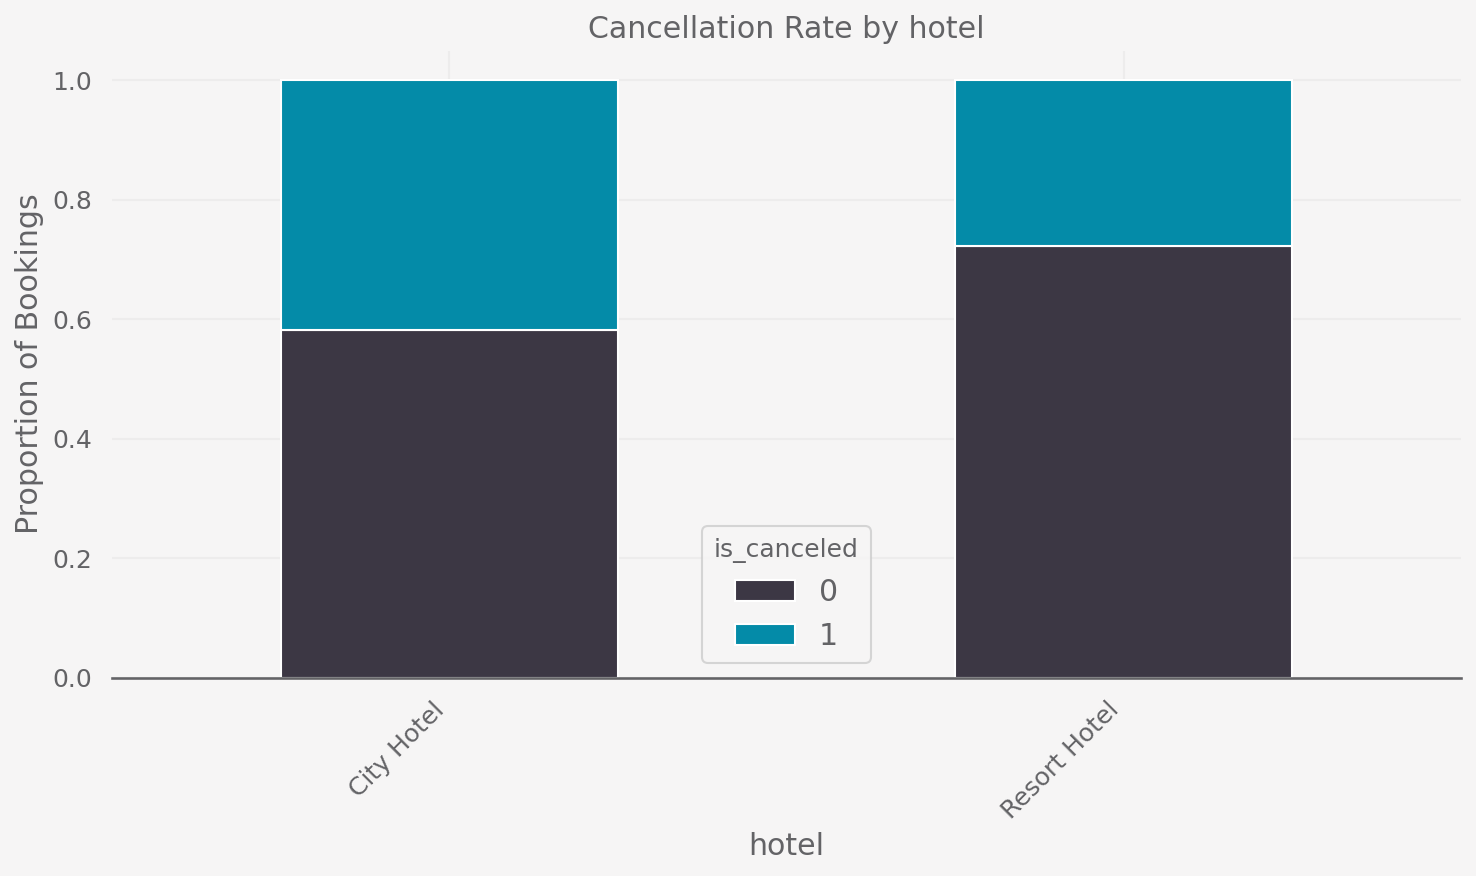


Testing 'meal' vs 'is_canceled':
Contingency Table:
is_canceled      0      1
meal                     
BB           57800  34510
FB             320    478
HB            9479   4984
SC            6684   3966
Undefined      883    286
Chi-squared: 304.2362, P-value: 0.0000, Degrees of Freedom: 4
  -> Significant association found between 'meal' and 'is_canceled'.


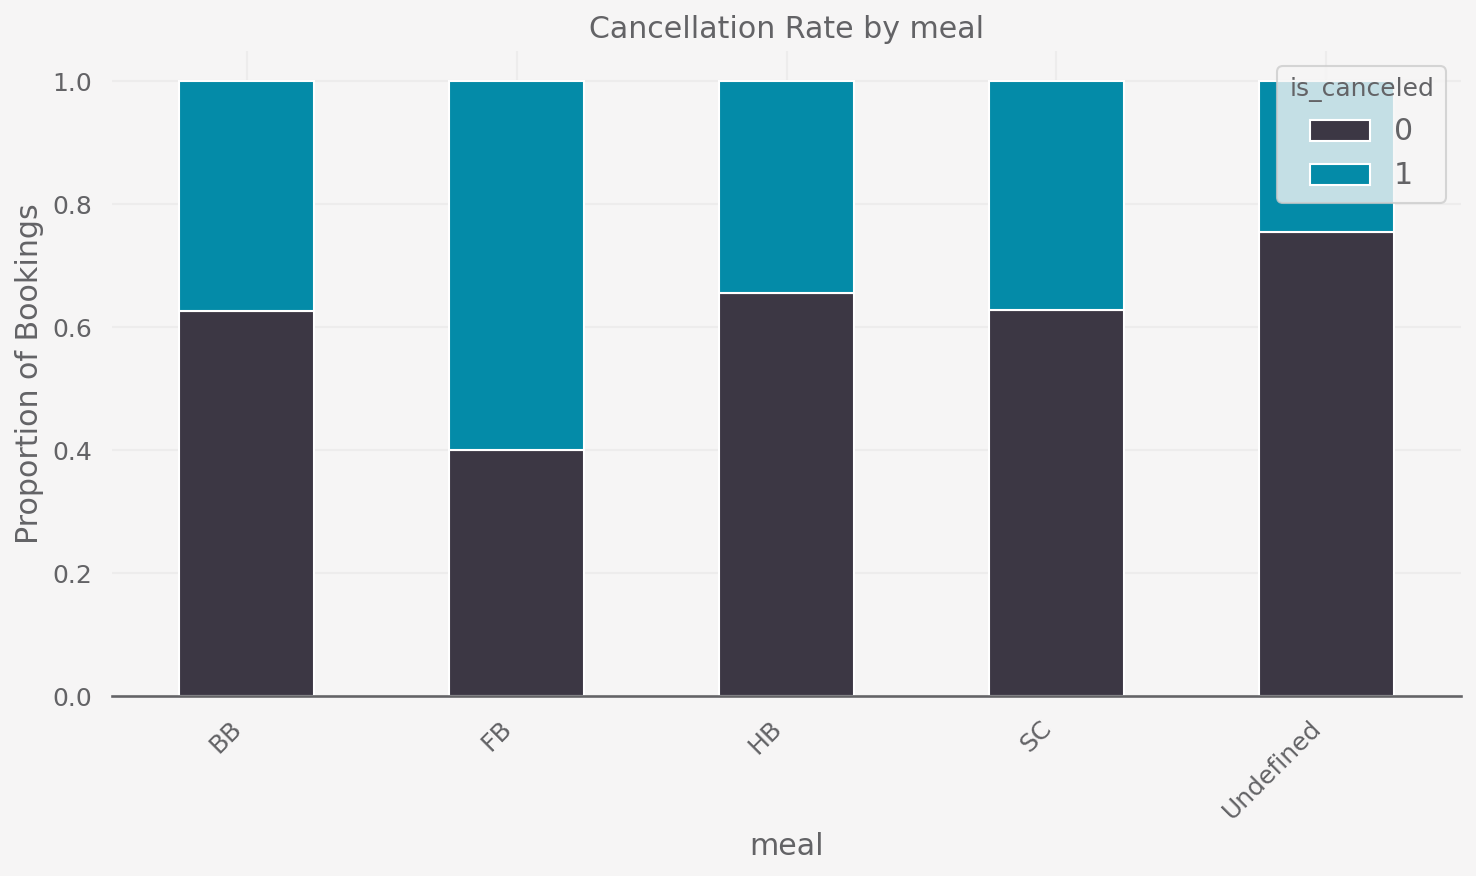


Testing 'market_segment' vs 'is_canceled':
Contingency Table:
is_canceled         0      1
market_segment              
Aviation          185     52
Complementary     646     97
Corporate        4303    992
Direct          10672   1934
Groups           7714  12097
Offline TA/TO   15908   8311
Online TA       35738  20739
Undefined           0      2
Chi-squared: 8497.2241, P-value: 0.0000, Degrees of Freedom: 7
  -> Significant association found between 'market_segment' and 'is_canceled'.


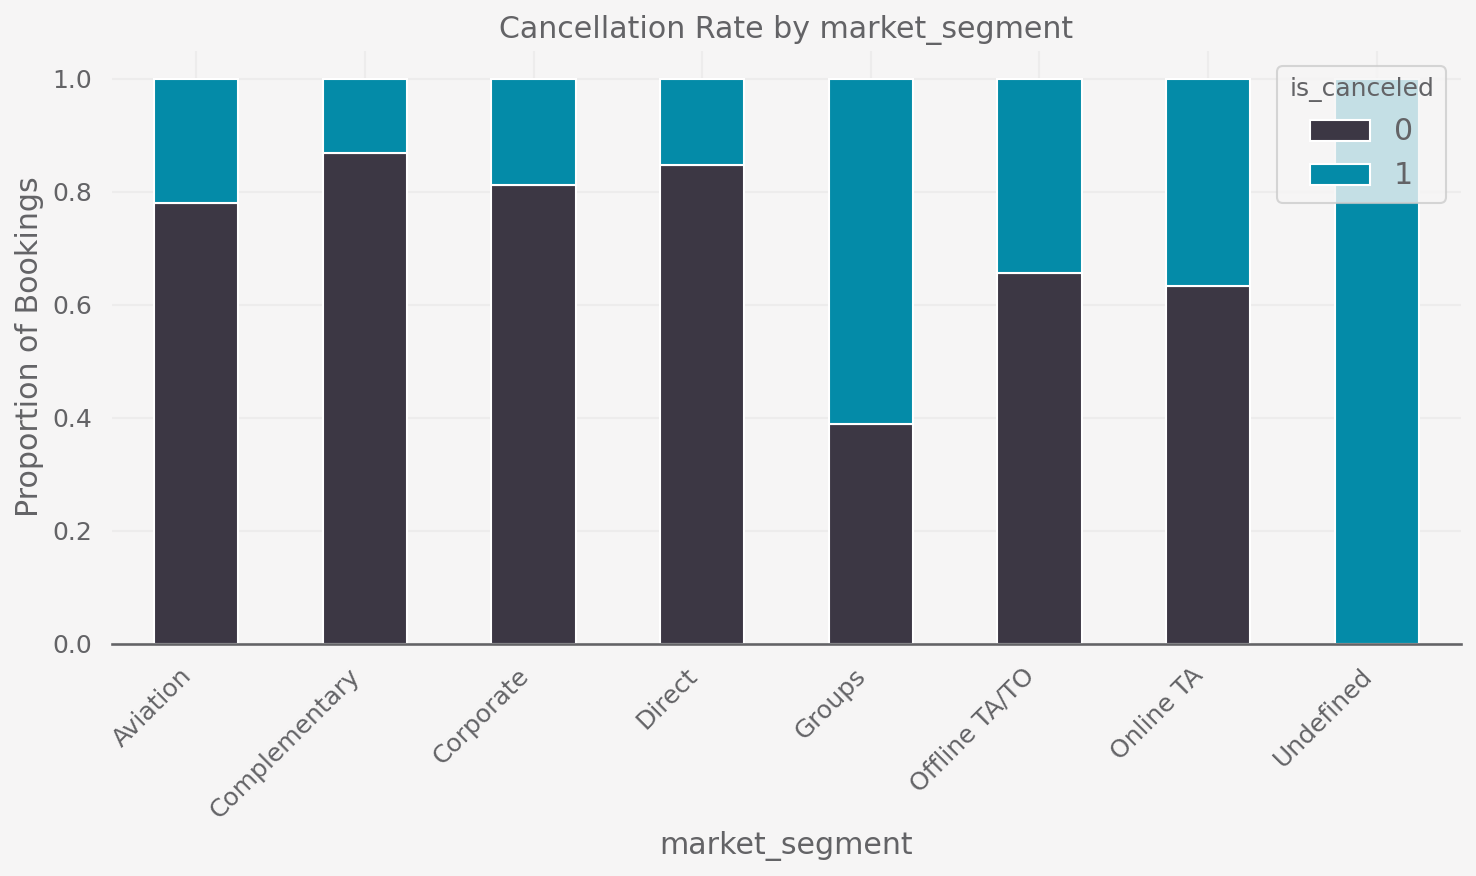


Testing 'distribution_channel' vs 'is_canceled':
Contingency Table:
is_canceled               0      1
distribution_channel              
Corporate              5203   1474
Direct                12088   2557
GDS                     156     37
TA/TO                 57718  40152
Undefined                 1      4
Chi-squared: 3745.7941, P-value: 0.0000, Degrees of Freedom: 4
  -> Significant association found between 'distribution_channel' and 'is_canceled'.


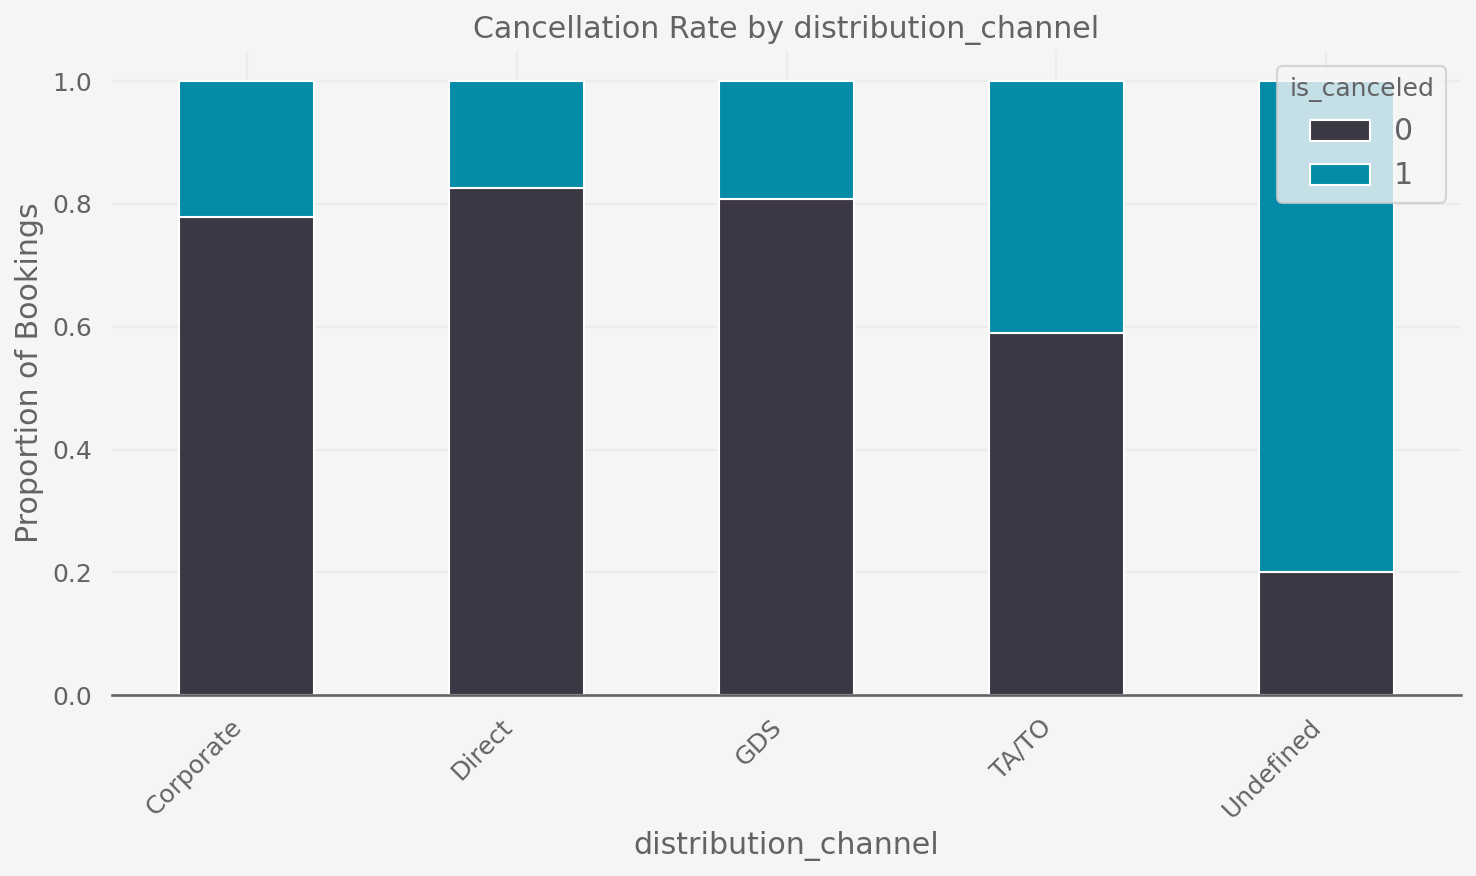


Testing 'is_repeated_guest' vs 'is_canceled':
Contingency Table:
is_canceled            0      1
is_repeated_guest              
0                  71908  43672
1                   3258    552
Chi-squared: 857.4063, P-value: 0.0000, Degrees of Freedom: 1
  -> Significant association found between 'is_repeated_guest' and 'is_canceled'.


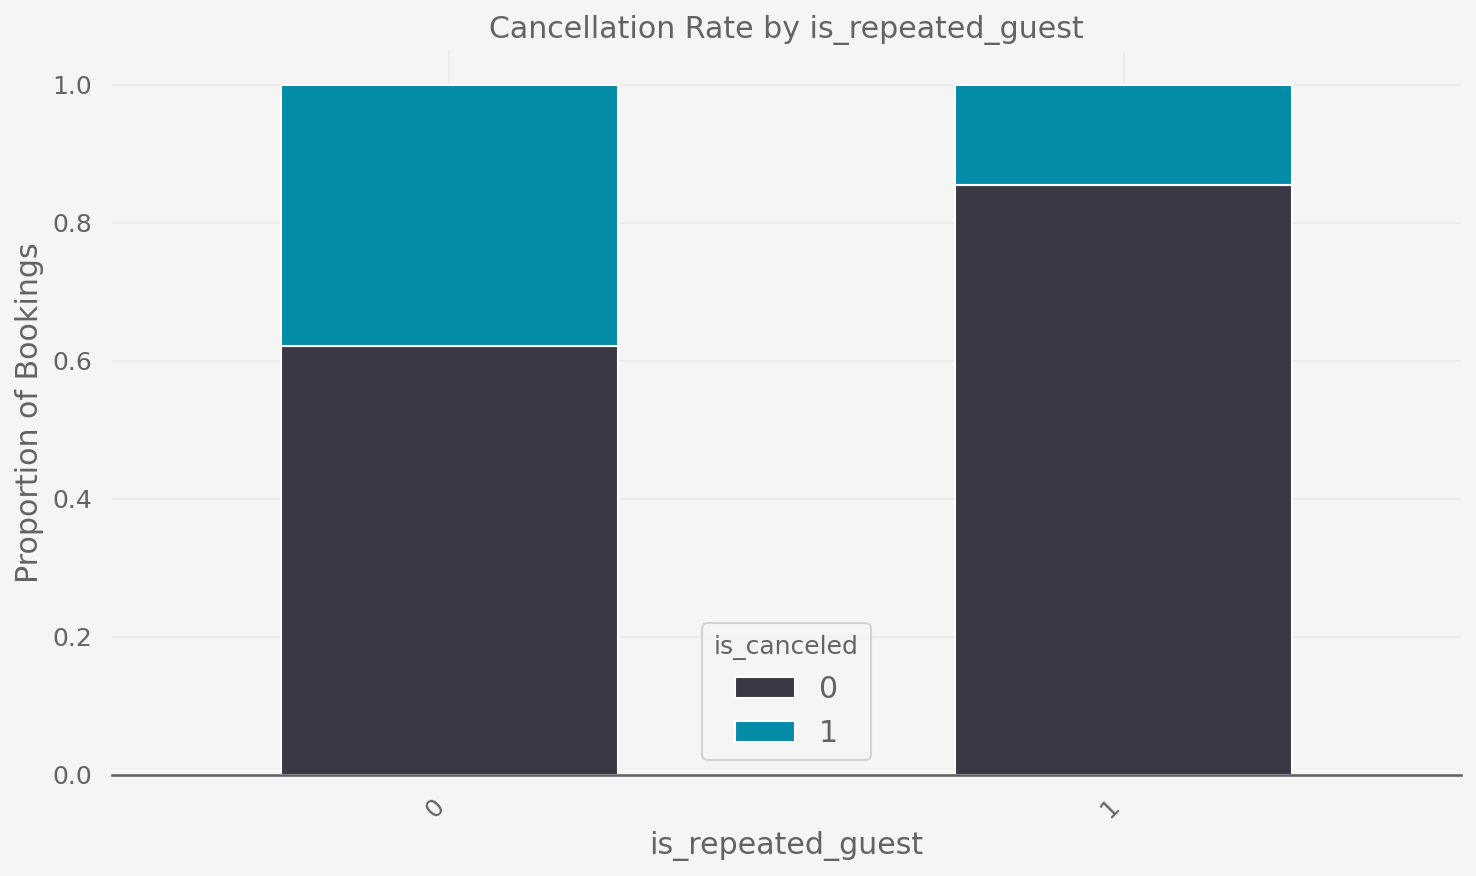


Testing 'reserved_room_type' vs 'is_canceled':
Contingency Table:
is_canceled             0      1
reserved_room_type              
A                   52364  33630
B                     750    368
C                     624    308
D                   13099   6102
E                    4621   1914
F                    2017    880
G                    1331    763
H                     356    245
L                       4      2
P                       0     12
Chi-squared: 647.8351, P-value: 0.0000, Degrees of Freedom: 9
  -> Significant association found between 'reserved_room_type' and 'is_canceled'.


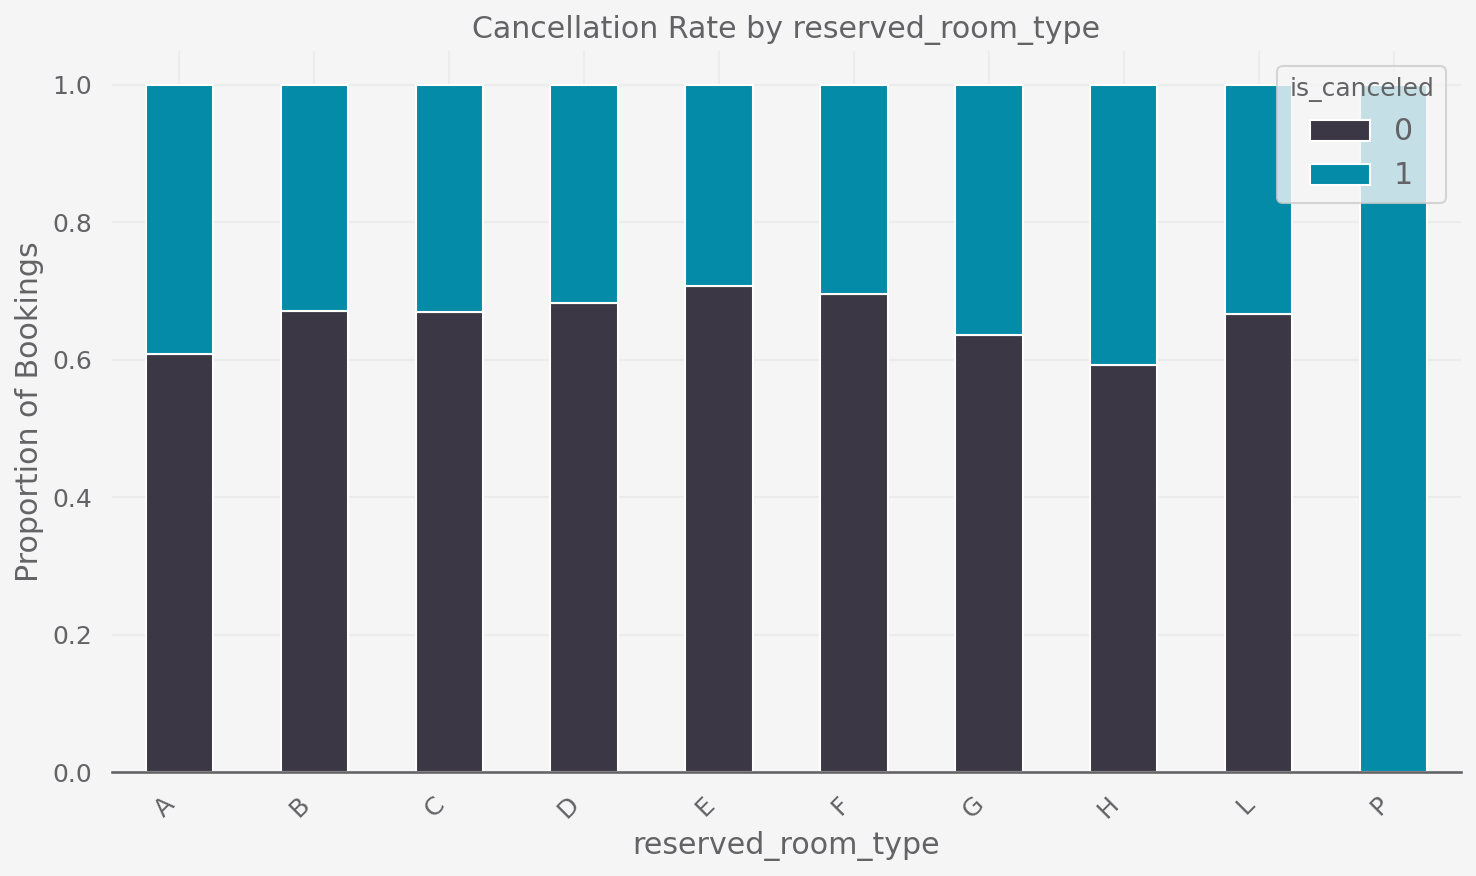


Testing 'deposit_type' vs 'is_canceled':
Contingency Table:
is_canceled       0      1
deposit_type              
No Deposit    74947  29694
Non Refund       93  14494
Refundable      126     36
Chi-squared: 27677.3292, P-value: 0.0000, Degrees of Freedom: 2
  -> Significant association found between 'deposit_type' and 'is_canceled'.


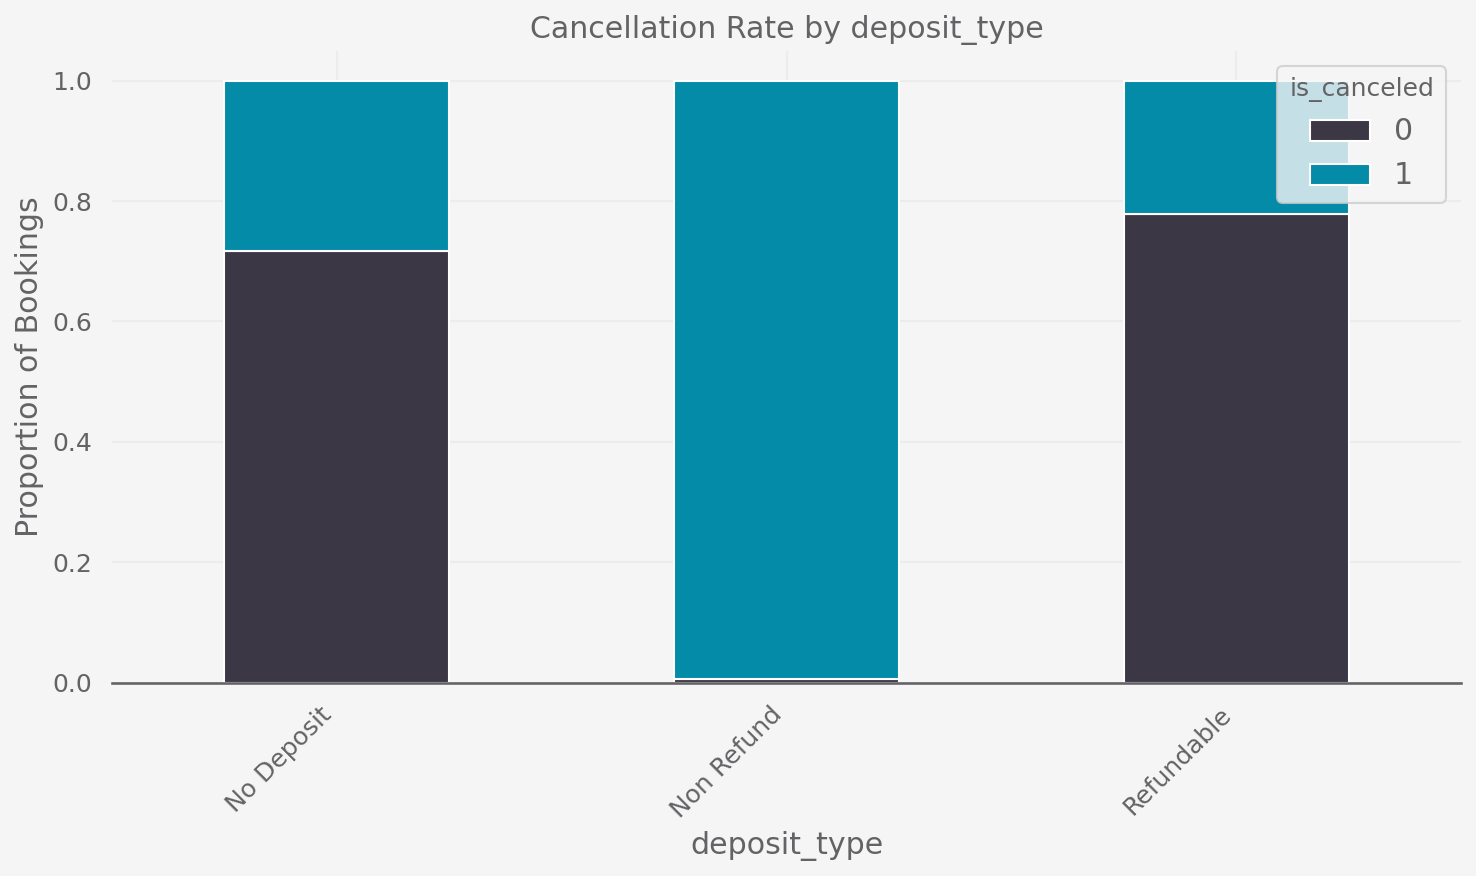


Testing 'customer_type' vs 'is_canceled':
Contingency Table:
is_canceled          0      1
customer_type                
Contract          2814   1262
Group              518     59
Transient        53099  36514
Transient-Party  18735   6389
Chi-squared: 2222.5042, P-value: 0.0000, Degrees of Freedom: 3
  -> Significant association found between 'customer_type' and 'is_canceled'.


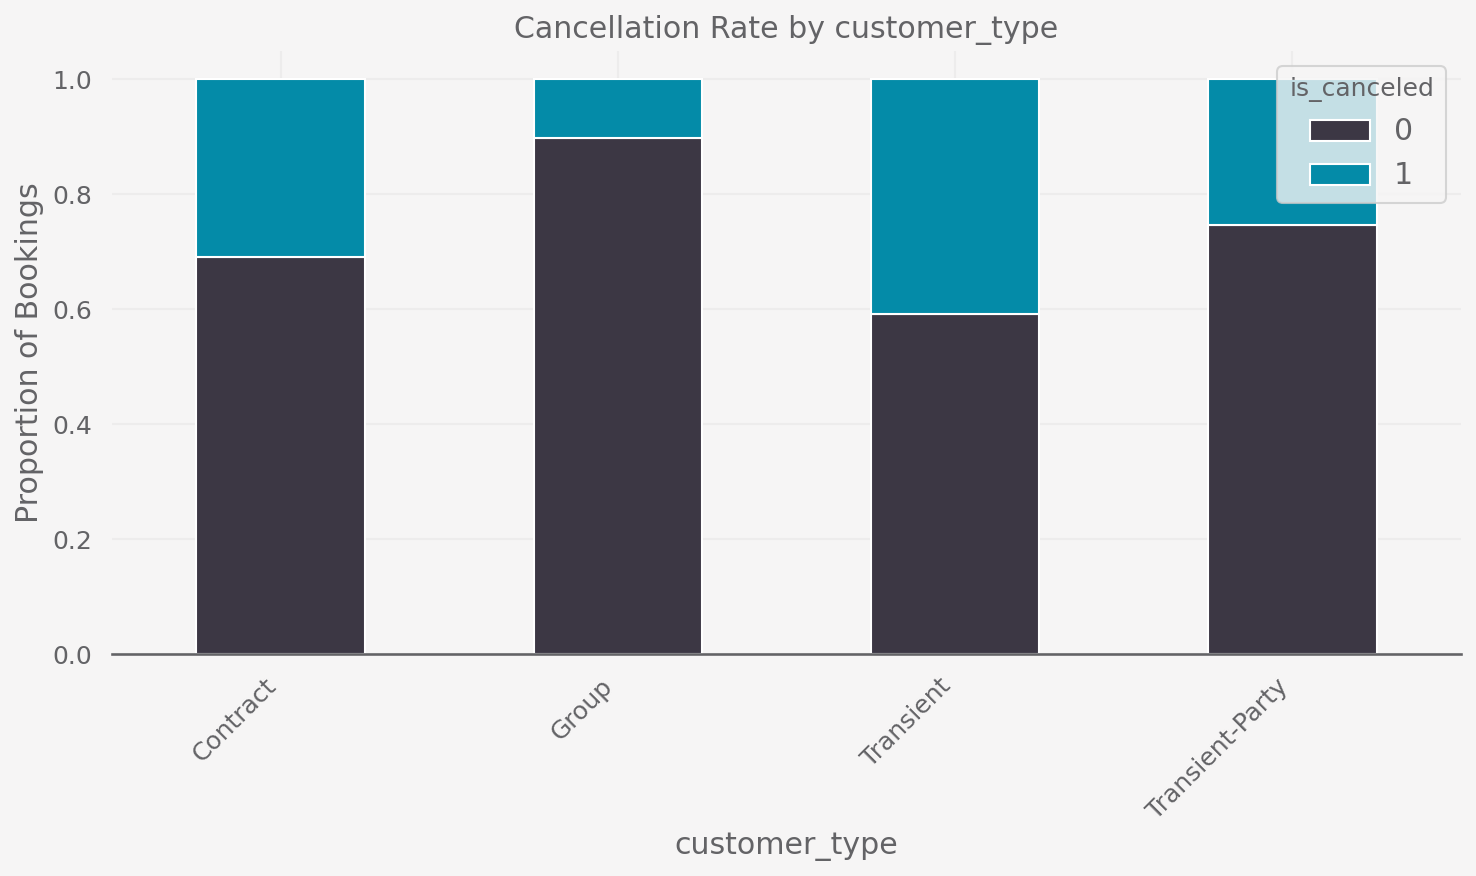

In [22]:
from scipy.stats import chi2_contingency

categorical_features_for_chi2 = ['hotel', 'meal', 'market_segment', 'distribution_channel',
                                 'is_repeated_guest', 'reserved_room_type',
                                 'deposit_type', 'customer_type'] # 'assigned_room_type' could also be interesting

if 'is_canceled' in df.columns:
    print("\n--- Chi-Squared Tests (Categorical vs. is_canceled) ---")
    for cat_col in categorical_features_for_chi2:
        if cat_col in df.columns:
            print(f"\nTesting '{cat_col}' vs 'is_canceled':")
            contingency_table = pd.crosstab(df[cat_col], df['is_canceled'])
            print("Contingency Table:")
            print(contingency_table)

            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Chi-squared: {chi2:.4f}, P-value: {p:.4f}, Degrees of Freedom: {dof}")

            if p < 0.05:
                print(f"  -> Significant association found between '{cat_col}' and 'is_canceled'.")
                # Visualize with a stacked or grouped bar chart
                pd.crosstab(df[cat_col], df['is_canceled'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
                plt.title(f'Cancellation Rate by {cat_col}')
                plt.ylabel('Proportion of Bookings')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
            else:
                print(f"  -> No significant association found between '{cat_col}' and 'is_canceled'.")
        else:
            print(f"Column {cat_col} not found in DataFrame.")
else:
    print("'is_canceled' column not found for Chi-squared tests.")

# Outlier Analysis

## Using Box Plots

--- Outlier Detection using Box Plots ---


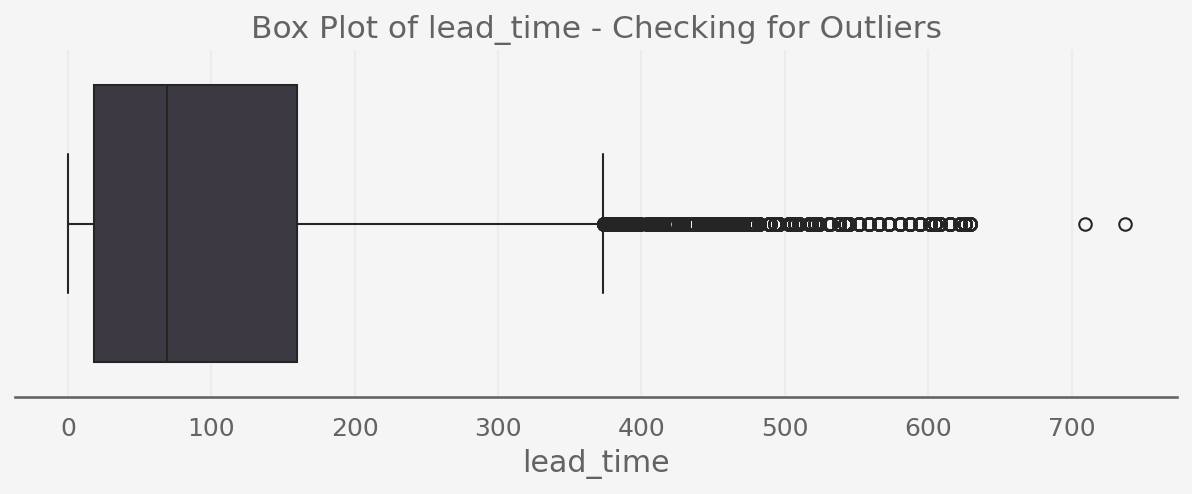


Quantiles for lead_time:
0.01      0.0
0.05      0.0
0.25     18.0
0.50     69.0
0.75    160.0
0.95    320.0
0.99    444.0
Name: lead_time, dtype: float64
------------------------------


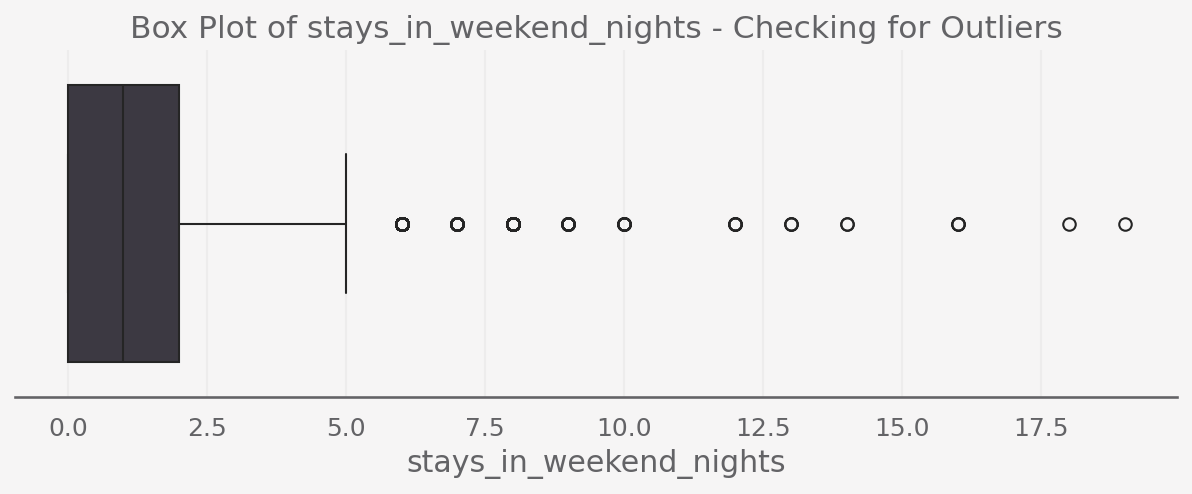


Quantiles for stays_in_weekend_nights:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    1.0
0.75    2.0
0.95    2.0
0.99    4.0
Name: stays_in_weekend_nights, dtype: float64
------------------------------


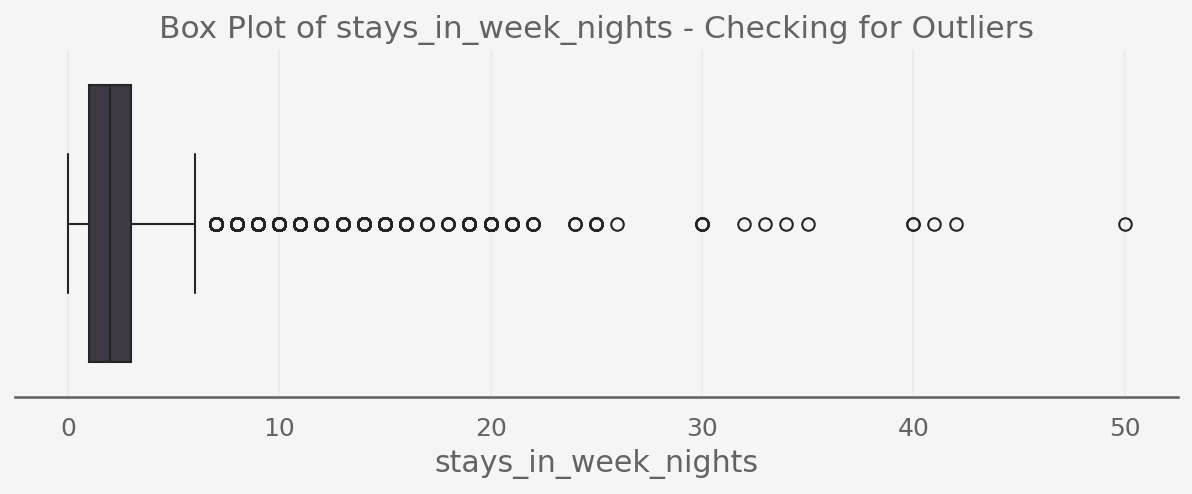


Quantiles for stays_in_week_nights:
0.01     0.0
0.05     0.0
0.25     1.0
0.50     2.0
0.75     3.0
0.95     5.0
0.99    10.0
Name: stays_in_week_nights, dtype: float64
------------------------------


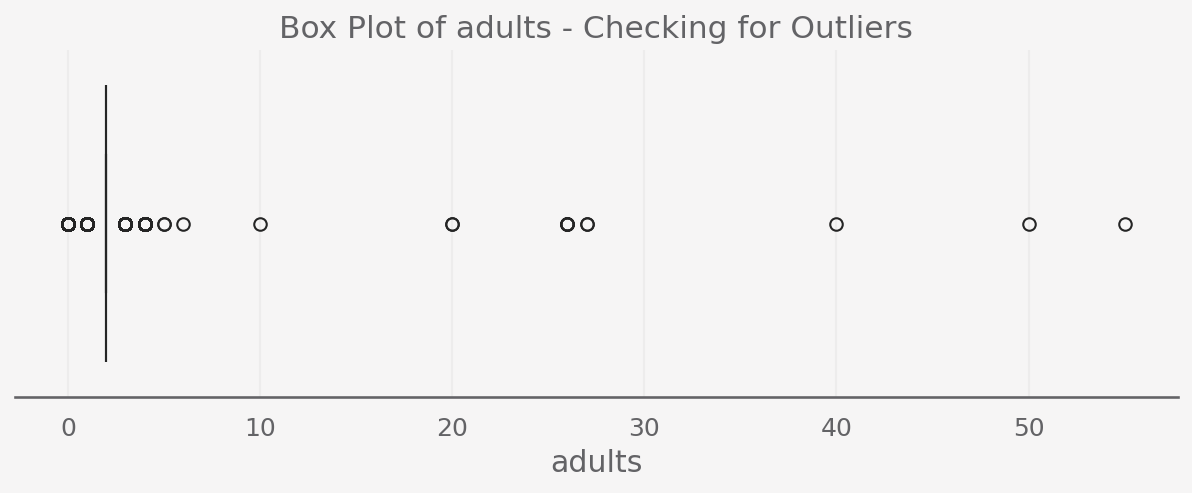


Quantiles for adults:
0.01    1.0
0.05    1.0
0.25    2.0
0.50    2.0
0.75    2.0
0.95    3.0
0.99    3.0
Name: adults, dtype: float64
------------------------------


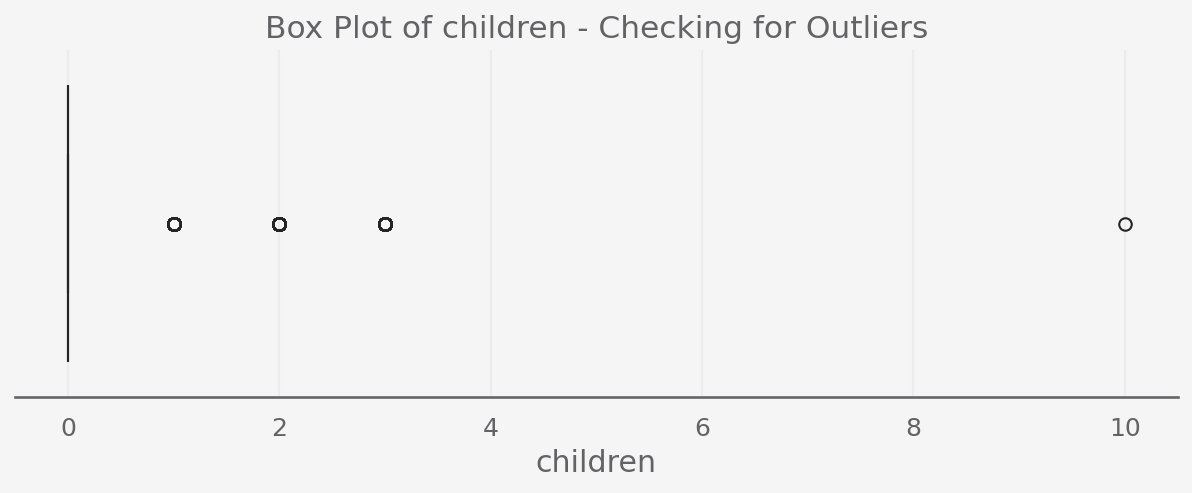


Quantiles for children:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
0.99    2.0
Name: children, dtype: float64
------------------------------


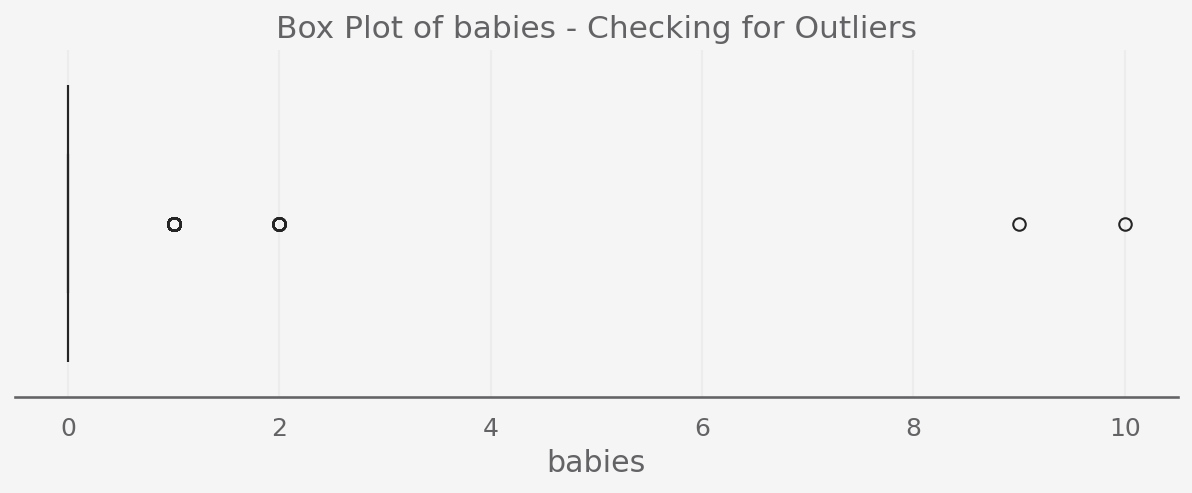


Quantiles for babies:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    0.0
0.99    0.0
Name: babies, dtype: float64
------------------------------


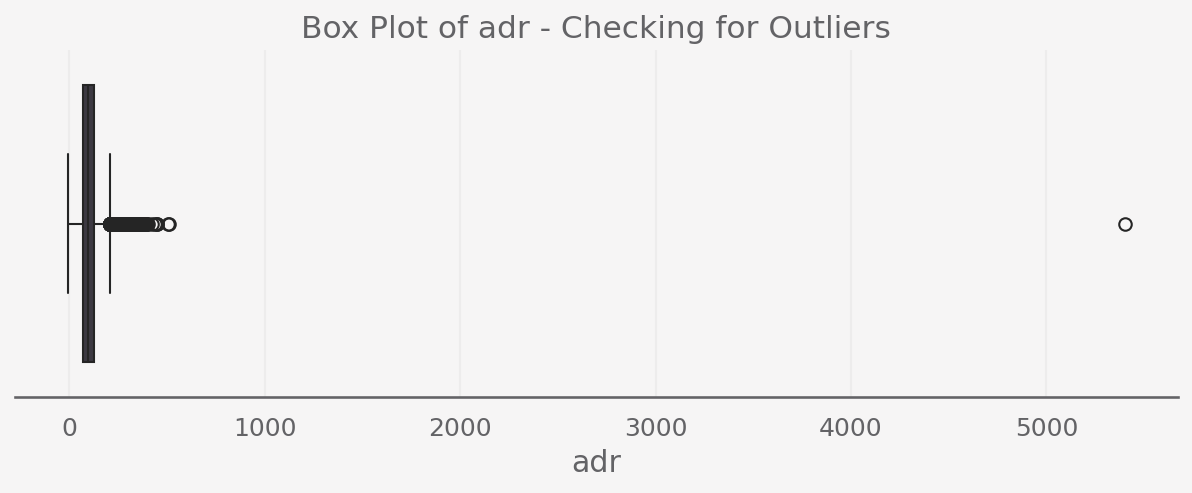


Quantiles for adr:
0.01      0.000
0.05     38.400
0.25     69.290
0.50     94.575
0.75    126.000
0.95    193.500
0.99    252.000
Name: adr, dtype: float64
------------------------------


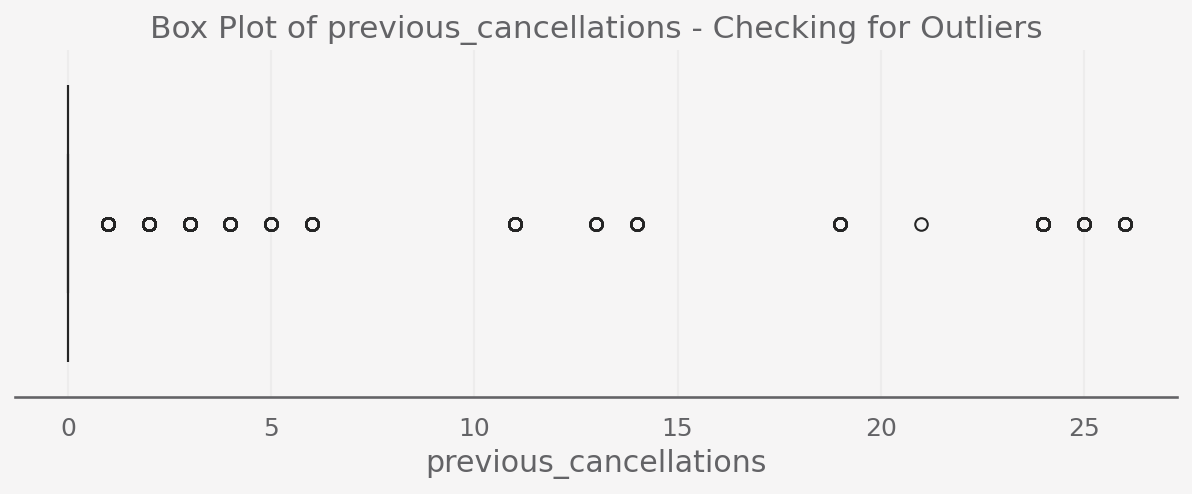


Quantiles for previous_cancellations:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
0.99    1.0
Name: previous_cancellations, dtype: float64
------------------------------


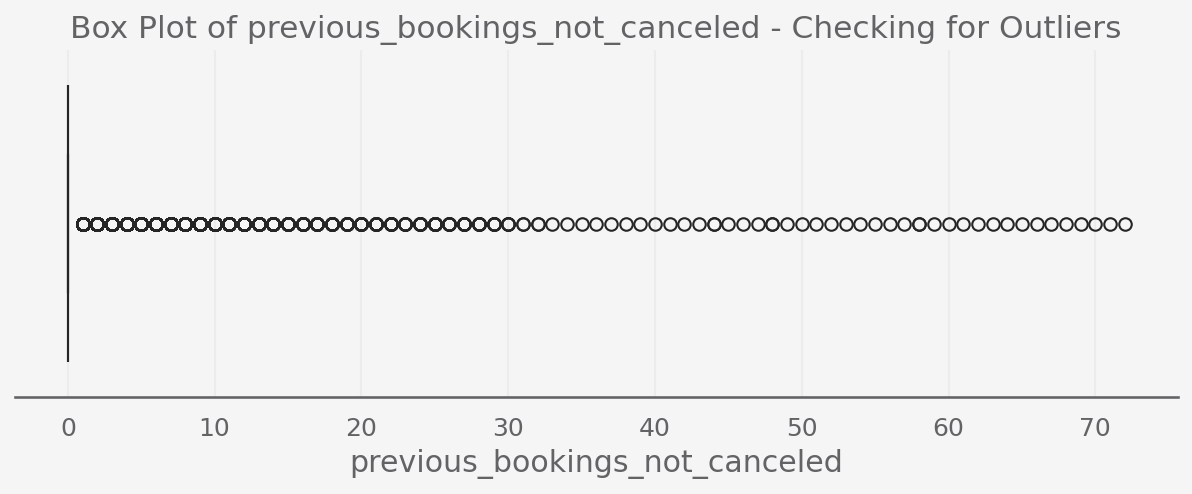


Quantiles for previous_bookings_not_canceled:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    0.0
0.99    3.0
Name: previous_bookings_not_canceled, dtype: float64
------------------------------


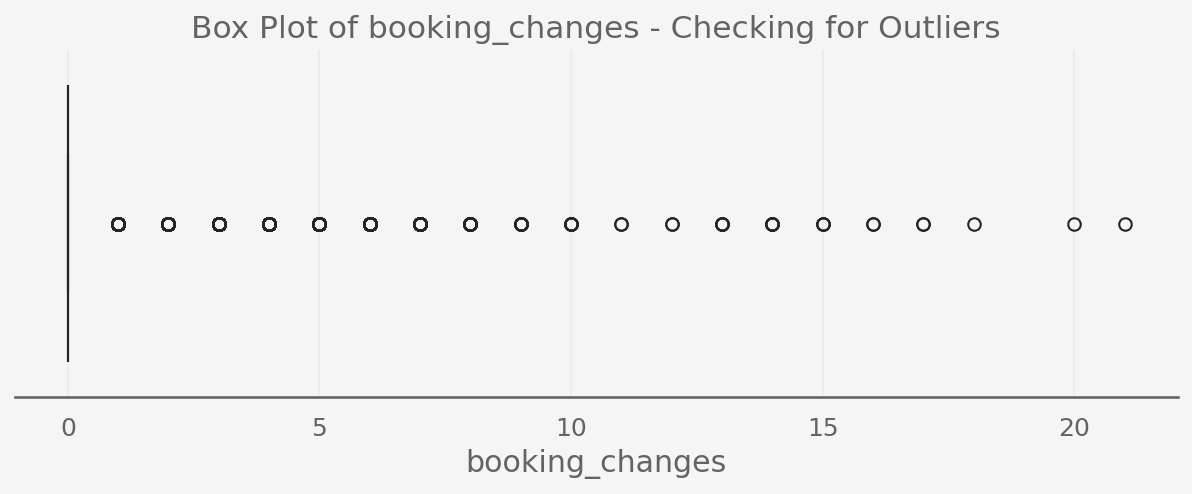


Quantiles for booking_changes:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
0.99    3.0
Name: booking_changes, dtype: float64
------------------------------


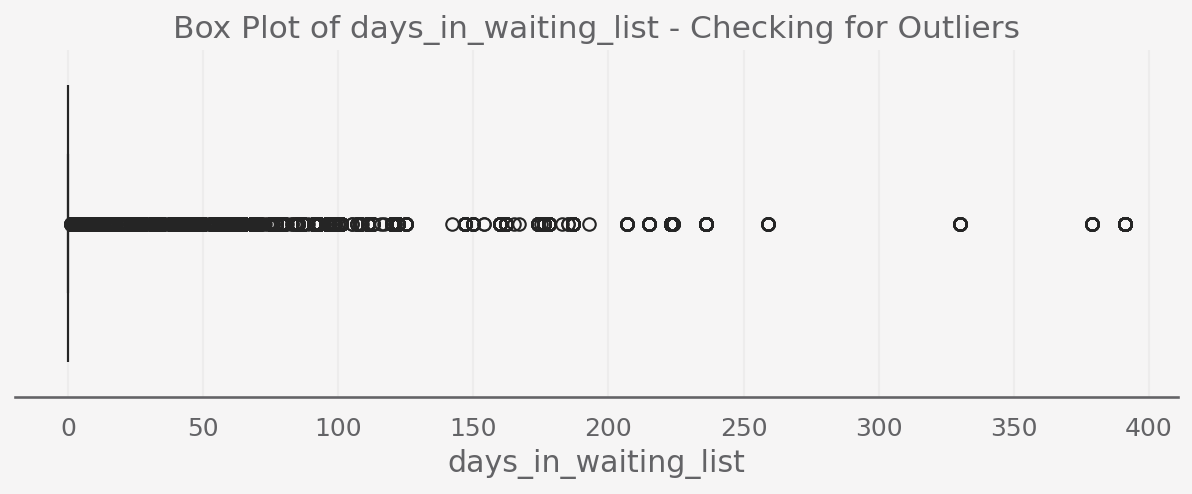


Quantiles for days_in_waiting_list:
0.01     0.0
0.05     0.0
0.25     0.0
0.50     0.0
0.75     0.0
0.95     0.0
0.99    75.0
Name: days_in_waiting_list, dtype: float64
------------------------------


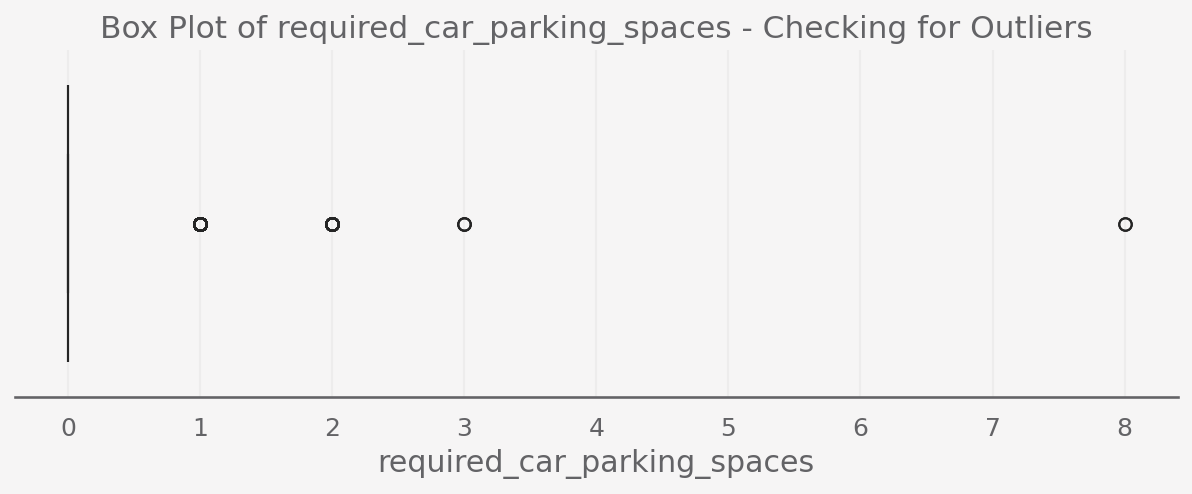


Quantiles for required_car_parking_spaces:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.95    1.0
0.99    1.0
Name: required_car_parking_spaces, dtype: float64
------------------------------


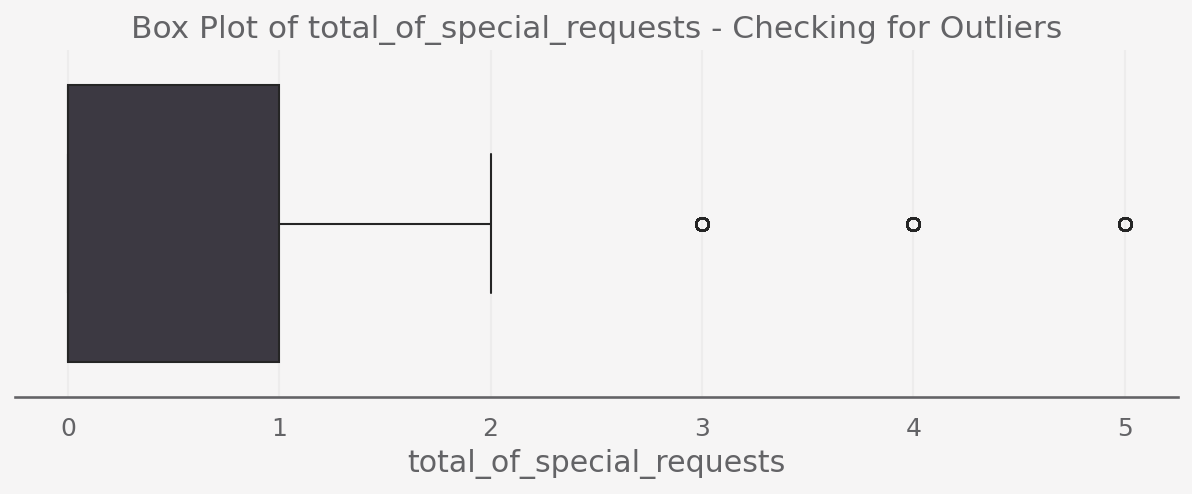


Quantiles for total_of_special_requests:
0.01    0.0
0.05    0.0
0.25    0.0
0.50    0.0
0.75    1.0
0.95    2.0
0.99    3.0
Name: total_of_special_requests, dtype: float64
------------------------------


In [23]:
print("--- Outlier Detection using Box Plots ---")
for col in numerical_cols_for_eda: # Using the list from your univariate section
    if col in df.columns:
        plt.figure(figsize=(10, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} - Checking for Outliers', fontsize=15)
        plt.xlabel(col)
        plt.show()

        # Optional: Print some quantiles to understand the spread better
        print(f"\nQuantiles for {col}:")
        print(df[col].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))
        print("-" * 30)
    else:
        print(f"Column {col} not found in DataFrame.")

## Using IQR Method

In [24]:
print("\n--- Numerical Outlier Detection using IQR Method (Example for 'adr' and 'lead_time') ---")

cols_to_check_iqr = ['adr', 'lead_time'] # Add other columns as needed

for col in cols_to_check_iqr:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\nPotential outliers for '{col}':")
        print(f"  IQR: {IQR:.2f}, Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
        print(f"  Number of potential outliers: {len(outliers)}")
        if not outliers.empty and len(outliers) < 20: # Print some if not too many
             # Display some details of these outliers, including cancellation status
            print("  Sample Outliers (with is_canceled status):")
            print(outliers[[col, 'is_canceled', 'customer_type', 'deposit_type']].head())
        elif len(outliers) >= 20:
            print(f"  Too many outliers ({len(outliers)}) to print sample for {col}.")
    else:
        print(f"Column {col} not found for IQR check.")


--- Numerical Outlier Detection using IQR Method (Example for 'adr' and 'lead_time') ---

Potential outliers for 'adr':
  IQR: 56.71, Lower Bound: -15.77, Upper Bound: 211.06
  Number of potential outliers: 3793
  Too many outliers (3793) to print sample for adr.

Potential outliers for 'lead_time':
  IQR: 142.00, Lower Bound: -195.00, Upper Bound: 373.00
  Number of potential outliers: 3005
  Too many outliers (3005) to print sample for lead_time.


## Using Scatter Plot


--- Scatter Plots for Bivariate Outlier Detection (Example) ---


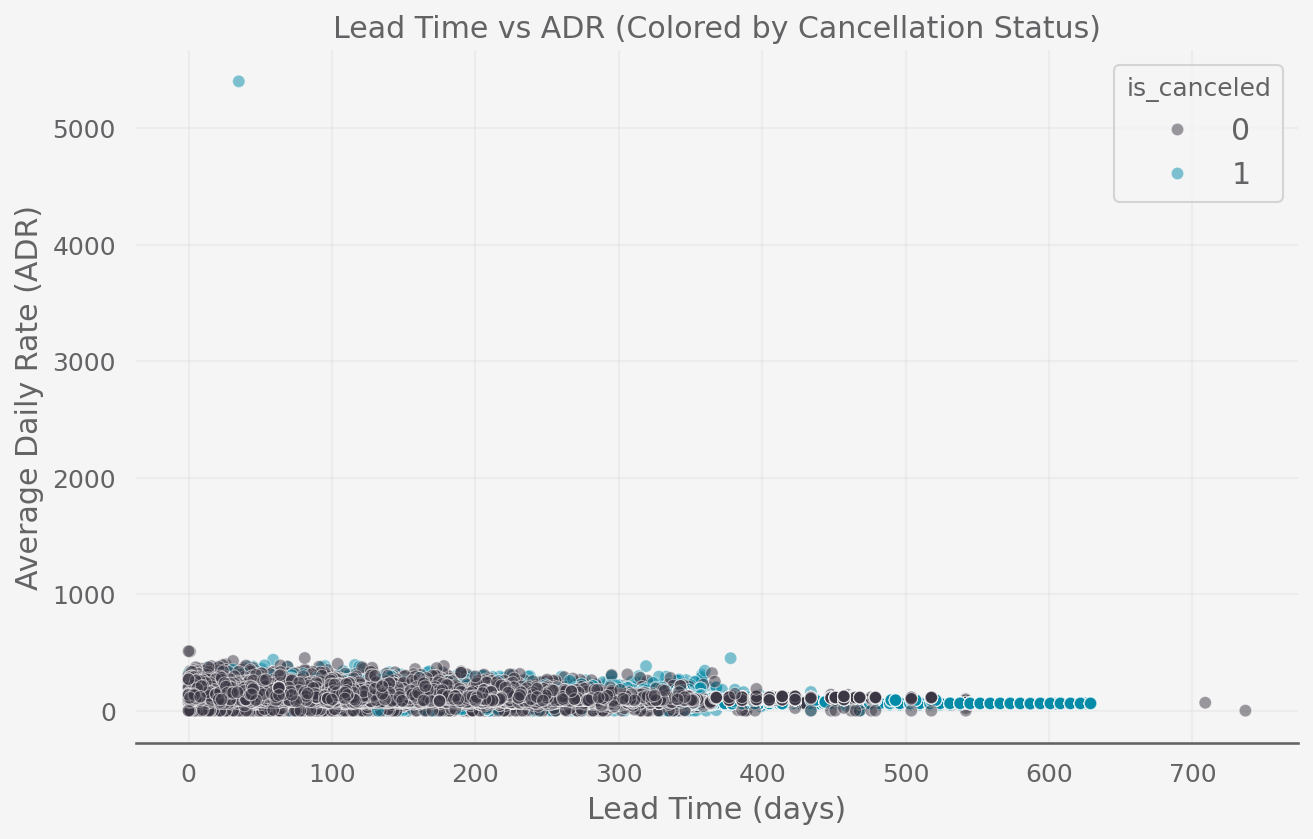

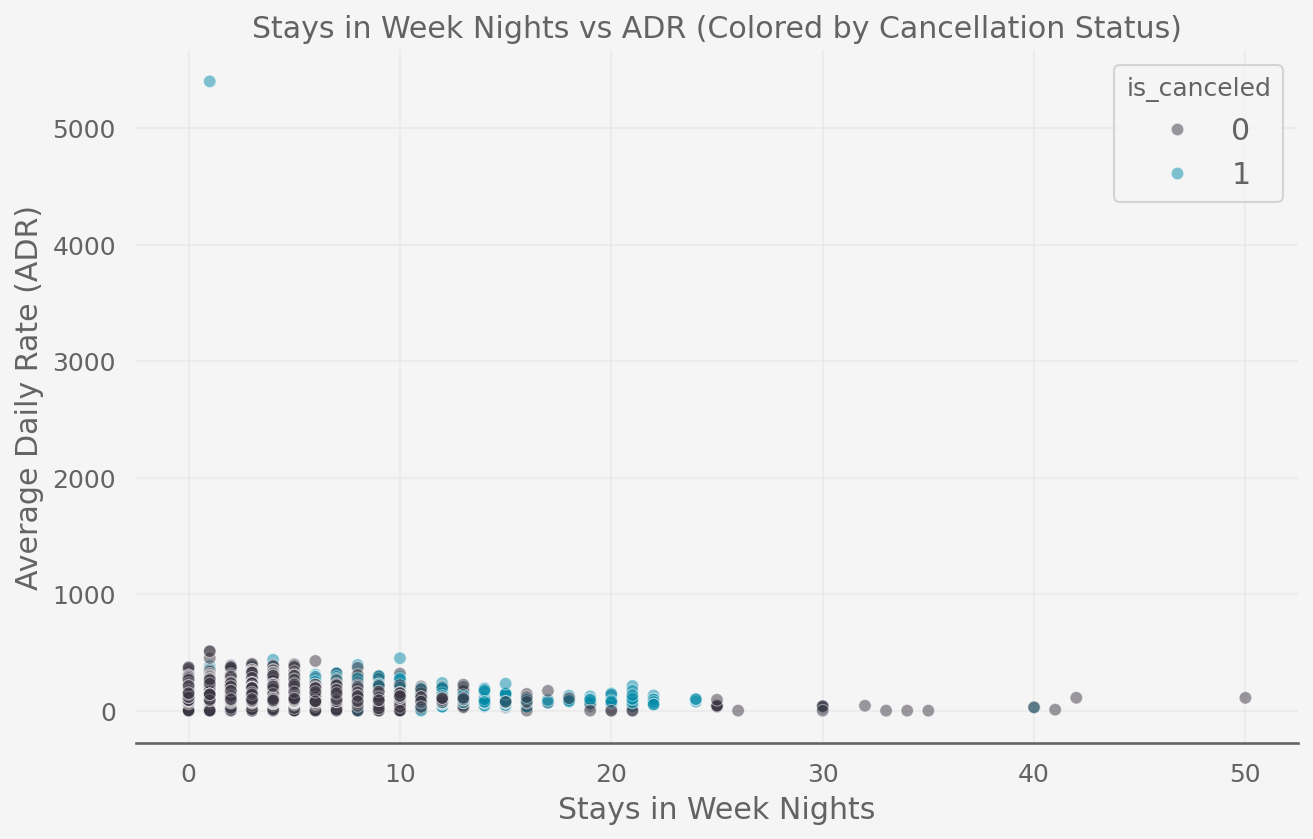

In [25]:
print("\n--- Scatter Plots for Bivariate Outlier Detection (Example) ---")

# Example 1: lead_time vs adr
if 'lead_time' in df.columns and 'adr' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='lead_time', y='adr', data=df, hue='is_canceled', alpha=0.5)
    plt.title('Lead Time vs ADR (Colored by Cancellation Status)')
    plt.xlabel('Lead Time (days)')
    plt.ylabel('Average Daily Rate (ADR)')
    plt.show()
else:
    print("Skipping lead_time vs adr scatter: one or both columns not found.")

# Example 2: Stays in Week Nights vs ADR
if 'stays_in_week_nights' in df.columns and 'adr' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='stays_in_week_nights', y='adr', data=df, hue='is_canceled', alpha=0.5)
    plt.title('Stays in Week Nights vs ADR (Colored by Cancellation Status)')
    plt.xlabel('Stays in Week Nights')
    plt.ylabel('Average Daily Rate (ADR)')
    plt.show()
else:
    print("Skipping stays_in_week_nights vs adr scatter: one or both columns not found.")